<a href="https://colab.research.google.com/github/FranciscoGlez25/CNN-TC/blob/main/GridSearch_InceptionV3_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuración del Entorno**


Este bloque de código establece el entorno de trabajo y realiza las importaciones necesarias de las bibliotecas de PyTorch y otras utilidades.

1. **Importación de Bibliotecas PyTorch:**
   Se importan las bibliotecas clave de PyTorch, como `torch`, `torchvision`, y `torch.nn`. También se importan submódulos específicos, como `transforms`, `optim`, `nn.init`, y `torch.utils.data`.

2. **Configuración de Dispositivo (CPU/GPU):**
   La disponibilidad de GPU se verifica mediante `torch.cuda.is_available()`, y se establece el dispositivo de entrenamiento (`device`) en "cuda:0" si hay GPU disponible, de lo contrario, se utiliza la CPU.

3. **Librerías y Utilidades Adicionales:**
   Se importan otras bibliotecas y utilidades, como `pandas` para manejar datos en formato tabular, `PIL` (Pillow) para trabajar con imágenes, `os` para operaciones del sistema operativo, `tqdm` para visualizar barras de progreso durante el entrenamiento, `matplotlib` y `seaborn` para visualizaciones, y `numpy` para operaciones matriciales.

4. **Inicialización del Entorno GPU:**
   Se evalúa la disponibilidad de la GPU (`torch.cuda.is_available()`) y se utiliza `torch.device` para asignar el dispositivo de entrenamiento, ya sea una GPU o la CPU.

Este bloque de código establece las bases del entorno de trabajo y prepara el dispositivo de entrenamiento para ejecutar tareas de aprendizaje profundo utilizando PyTorch.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
import os
from tqdm.notebook import tqdm
import matplotlib.image as img
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Mover modelo a dispositivo de entrenamient


/opt/conda/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

# **Configuración de Transformaciones de Imágenes**

En este bloque de código, se utilizan las funciones y clases proporcionadas por la biblioteca `torchvision` para definir las transformaciones que se aplicarán a las imágenes.

1. **Importación de Módulos `torchvision`:**
   Se importan los módulos relevantes de `torchvision`, incluyendo `datasets`, `transforms`, y `models`.

2. **Definición de Transformaciones para Conjuntos de Datos de Entrenamiento y Prueba:**
   Se definen dos conjuntos de transformaciones, uno para el conjunto de datos de entrenamiento (`transform_train`) y otro para el conjunto de datos de prueba (`transform_test`). Ambos conjuntos de transformaciones incluyen las siguientes operaciones:
   - `v2.ToTensor()`: Convierte la imagen a un tensor de PyTorch.
   - `v2.CenterCrop(size=(850, 850))`: Realiza un recorte centrado en la imagen con dimensiones específicas.
   - `v2.Resize(size=(299, 299))`: Cambia el tamaño de la imagen a las dimensiones especificadas.
   - `v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`: Normaliza los valores de píxeles de la imagen según la media y la desviación estándar proporcionadas.

Estas transformaciones son comunes en tareas de visión por computadora y son esenciales para preparar adecuadamente las imágenes antes de ingresarlas al modelo de aprendizaje profundo. El uso de estas transformaciones ayuda a mejorar el rendimiento y la generalización del modelo durante el entrenamiento y la evaluación.

In [ ]:
from torchvision import datasets, transforms, models

transform_train = v2.Compose([
                    v2.ToTensor(),
                    v2.CenterCrop(size = (850,850)),
                    v2.Resize(size = (299, 299)),
                    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                ])

transform_test = v2.Compose([v2.ToTensor(),
                    v2.CenterCrop(size = (850,850)),
                    v2.Resize(size = (299, 299)),
                    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                ])

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


# **Definición de Dataset Personalizado para Clasificación de Imágenes**

En este bloque de código, se define una clase llamada `CustomDataset` que hereda de la clase base `Dataset` proporcionada por PyTorch.

1. **Inicialización del Dataset:**
   - `__init__(self, csv_file, root_dir, transform=None)`: En el método de inicialización, se carga un archivo CSV que contiene anotaciones, se especifica la carpeta raíz donde se encuentran las imágenes, y se proporciona una transformación opcional. También se calcula el número de clases presentes en el conjunto de datos.

2. **Método para Obtener la Longitud del Dataset:**
   - `__len__(self)`: Retorna la longitud del conjunto de datos, que es igual al número de muestras en el archivo CSV.

3. **Método para Obtener una Muestra del Dataset:**
   - `__getitem__(self, index)`: Retorna una muestra específica del conjunto de datos. En este caso, se carga una imagen desde la ruta especificada en el archivo CSV, se convierte a formato RGB, y se obtiene la etiqueta asociada. Si se proporciona una transformación, se aplica a la imagen.

4. **Número de Clases:**
   - Se obtiene el número de clases únicas presentes en el conjunto de datos utilizando la columna 'Egreso' del archivo CSV.

Esta clase `CustomDataset` es esencial para cargar y preparar los datos de imágenes y etiquetas para su uso en tareas de clasificación de imágenes. Se puede utilizar en combinación con el conjunto de transformaciones previamente definido para construir DataLoader y facilitar el entrenamiento de modelos de aprendizaje profundo.

In [ ]:
# Definir dataset personalizado para cargar imágenes y clases desde archivos CSV
class CustomDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

        # Obtener el número de clases desde el conjunto de datos
        self.num_classes = len(self.annotations['Egreso'].unique()) "Egreso es la columna que contiene las etiquetas de clasificación"

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = Image.open(img_path).convert('RGB')
        label = self.annotations.iloc[index, 3]

        if self.transform:
            image = self.transform(image)

        return image, label

# **Montar Google Drive**

In [ ]:
drive.mount('/content/drive')

# **Creación del Conjunto de Datos de Entrenamiento**

En este bloque de código, se define el conjunto de datos de entrenamiento utilizando la clase `CustomDataset` previamente creada.

1. **Importación de Módulos:**
   - Se importan los módulos necesarios, incluyendo `DataLoader` y `random_split` de `torch.utils.data`.

2. **Definición del Conjunto de Datos de Entrenamiento:**
   - `train_dataset = CustomDataset('ruta_archivo_csv', 'ruta_carpeta_imagenes', transform=transform_train)`: Se instancia un objeto `CustomDataset` con la ruta al archivo CSV que contiene las etiquetas y la carpeta que contiene las imágenes. Además, se aplica la transformación definida previamente (`transform_train`).

3. **Verificación de la Cantidad Total de Imágenes:**
   - `total_train = len(train_dataset)`: Se obtiene y muestra la cantidad total de imágenes en el conjunto de datos de entrenamiento. Este valor corresponde al número de muestras presentes en el archivo CSV.

Este bloque de código es esencial para preparar el conjunto de datos que se utilizará durante el entrenamiento del modelo. La ruta al archivo CSV y la carpeta de imágenes se proporcionan, y se aplica la transformación específica para el conjunto de entrenamiento.

In [ ]:
from torch.utils.data import DataLoader, random_split

# Define el conjunto de datos completo
# La primer ruta corresponde al archivo .csv que contiene las etiquetas de las imágenes.
# La segunda ruta corresponde a la carpeta que contiene las imágenes a utilizar.
train_dataset = CustomDataset('ruta_archivo_csv', 'ruta_carpeta_imagenes', transform=transform_train)

# Verificamos que las imágenes se carguen completamente
total_train = len(train_dataset)
print(f'Cantidad total de imágenes en Train Dataset: {total_train}')

Cantidad total de imágenes en Train Dataset: 963


# **División del Conjunto de Datos y Creación de DataLoaders**

En este bloque de código, se realizan varias operaciones relacionadas con la división del conjunto de datos de entrenamiento y la creación de DataLoaders para entrenamiento y validación.

1. **Obtención del Número Total de Muestras en el Conjunto de Entrenamiento:**
   - `total_samples = len(train_dataset)`: Se obtiene el número total de muestras en el conjunto de entrenamiento.

2. **Cálculo del Tamaño del Conjunto de Validación:**
   - `validation_split = 0.2`: Se especifica la proporción del conjunto de datos que se destinará al conjunto de validación (en este caso, el 20%).
   - `validation_size = int(validation_split * total_samples)`: Se calcula el número de muestras para el conjunto de validación.

3. **Cálculo del Tamaño del Conjunto de Entrenamiento:**
   - `train_size = total_samples - validation_size`: Se calcula el tamaño del conjunto de entrenamiento restando el tamaño del conjunto de validación al número total de muestras.

4. **División del Conjunto de Entrenamiento:**
   - `train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])`: Se utiliza la función `random_split` para dividir el conjunto de entrenamiento en un conjunto de entrenamiento y un conjunto de validación según los tamaños calculados anteriormente.

5. **Definición de DataLoaders:**
   - `train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)`: Se define un DataLoader para el conjunto de entrenamiento con un tamaño de lote de 32 y con el parámetro `shuffle` configurado como `True`.
   - `val_loader = DataLoader(validation_dataset, batch_size=32, shuffle=True)`: Se define un DataLoader para el conjunto de validación con un tamaño de lote de 32 y con el parámetro `shuffle` configurado como `True`.

Este bloque de código es crucial para la preparación de los conjuntos de entrenamiento y validación, así como para la creación de DataLoaders que permitirán el entrenamiento y la evaluación eficientes del modelo de aprendizaje profundo.

In [ ]:
# Obtén el número total de muestras en el conjunto de entrenamiento
total_samples = len(train_dataset)

# Calcula el número de muestras para el conjunto de validación (20%)
validation_split = 0.2
validation_size = int(validation_split * total_samples)

# Calcula el tamaño del conjunto de entrenamiento
train_size = total_samples - validation_size

# Divide el conjunto de entrenamiento en conjunto de entrenamiento y conjunto de validación
train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])

# Define los DataLoaders para entrenamiento y validación
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=32, shuffle=True)

# **Obtención de la Cantidad Total de Imágenes en DataLoaders**

En este bloque de código, se realiza la obtención de la cantidad total de imágenes presentes en los DataLoaders de entrenamiento (`train_loader`) y validación (`val_loader`).

1. **Obtención de la Cantidad Total de Imágenes en el DataLoader de Entrenamiento:**
   - `total_images_train = len(train_loader.dataset)`: Se obtiene la cantidad total de imágenes en el conjunto de entrenamiento utilizando el atributo `dataset` del DataLoader.

2. **Obtención de la Cantidad Total de Imágenes en el DataLoader de Validación:**
   - `total_images_validation = len(val_loader.dataset)`: Similar al paso anterior, se obtiene la cantidad total de imágenes en el conjunto de validación utilizando el atributo `dataset` del DataLoader.

3. **Impresión de la Cantidad Total de Imágenes:**
   - `print(f'Cantidad total de imágenes en Train Dataset después de realizar la división: {total_images_train}')`: Se imprime en la consola la cantidad total de imágenes en el conjunto de entrenamiento después de la división.
   - `print(f'Cantidad total de imágenes en Validation Dataset: {total_images_validation}')`: Se imprime en la consola la cantidad total de imágenes en el conjunto de validación.

Estas líneas de código proporcionan información útil sobre la distribución de datos después de la división en conjuntos de entrenamiento y validación. Este tipo de verificación es crucial para garantizar que los conjuntos estén equilibrados y que no haya problemas de muestreo durante el entrenamiento del modelo.

In [ ]:
# Obtén la cantidad total de imágenes en train_loader y validation_loader
total_images_train = len(train_loader.dataset)
total_images_validation = len(val_loader.dataset)

# Imprime la cantidad total de imágenes
print(f'Cantidad total de imágenes en Train Dataset despues de realizar split: {total_images_train}')
print(f'Cantidad total de imágenes en Validation Dataset: {total_images_validation}')

Cantidad total de imágenes en Train Dataset despues de realizar split: 771
Cantidad total de imágenes en Validation Dataset: 192


# **Obtención del Número de Clases en el Conjunto de Datos de Entrenamiento**

En este bloque de código, se obtiene el número de clases presente en el conjunto de datos de entrenamiento (`train_dataset`).

1. **Obtención del Número de Clases:**
   - `num_classes = train_dataset.num_classes`: Se utiliza el atributo `num_classes` del conjunto de datos de entrenamiento (`train_dataset`) para obtener el número de clases presentes en el conjunto.

2. **Impresión del Número de Clases:**
   - `print("Clases obtenidas en el conjunto de datos de entrenamiento:", num_classes)`: Se imprime en la consola el número de clases obtenido del conjunto de datos de entrenamiento.

Este bloque de código es fundamental para conocer la cantidad de clases en el conjunto de entrenamiento, información crucial para configurar correctamente la capa de salida del modelo y para realizar tareas de clasificación de manera efectiva. La impresión de este valor proporciona una verificación rápida de la información sobre las clases presentes en el conjunto de datos.

In [ ]:
num_classes = train_dataset.num_classes
print("Clases obtenidas en el conjunto Test Dataset:", num_classes)

Clases obtenidas en el conjunto Test Dataset: 2


# **Definición de Search Grid**

En este bloque de código, se define un grid de parámetros (`param_grid`) que se utilizará para realizar una búsqueda exhaustiva de hiperparámetros.

1. **Definición del Grid de Parámetros:**
   - `param_grid`: Se define un diccionario que contiene combinaciones de valores para los hiperparámetros que se desean ajustar. En este caso, se consideran dos hiperparámetros:
      - `learning_rate`: Una lista que contiene tres posibles valores para la tasa de aprendizaje.
      - `optimizer`: Una lista que contiene tres posibles opciones de optimizadores.

Este bloque de código es esencial para establecer las combinaciones de hiperparámetros que se evaluarán durante la búsqueda de ajuste de hiperparámetros. La variación de estos parámetros puede afectar significativamente el rendimiento del modelo, y una búsqueda exhaustiva ayuda a encontrar la combinación óptima.

In [ ]:
param_grid = {
    'learning_rate': [0.00001, 0.0001, 0.001],
    'optimizer': ['SGD', 'Adam', 'RMSprop']
}


# **Búsqueda de Hiperparámetros y Entrenamiento del Modelo InceptionV3**

Este bloque de código realiza la búsqueda exhaustiva de hiperparámetros y el entrenamiento del modelo con diferentes combinaciones.

1. **Inicialización y Definición de Hiperparámetros:**
   - Se establece el número de épocas (`epochs`).
   - Se inicializa la mejor pérdida de validación como infinito (`best_val_loss`).
   - Se inicializa un diccionario vacío para almacenar los mejores hiperparámetros (`best_hyperparameters`).
   - Se inicializa el modelo como `None`.

2. **Definición del Grid de Parámetros y Diccionario de Pérdida de Validación:**
   - Se utiliza la función `ParameterGrid` del módulo `sklearn.model_selection` para generar todas las combinaciones de hiperparámetros definidas en `param_grid`.
   - Se crea un diccionario `val_loss_dict` para almacenar los valores de pérdida de validación para cada combinación de hiperparámetros.

3. **Bucle Principal de Búsqueda de Hiperparámetros:**
   - Se itera a través de todas las combinaciones de hiperparámetros.
   - Se imprimen los valores de los hiperparámetros actuales.
   - Se define y entrena el modelo con la combinación actual de hiperparámetros.
   - Se almacena la mejor pérdida de validación y los hiperparámetros asociados.
   - Se crea una gráfica que muestra la pérdida y la precisión de entrenamiento y validación a lo largo de las épocas.
   - Se guardan los pesos del modelo entrenado.

4. **Selección de los Mejores Hiperparámetros:**
   - Después de completar todos los bucles, se determinan los mejores hiperparámetros en función de la mínima pérdida de validación.
   - Obteniendo el modelo con el mejor error en validación, se busca que el modelo se comporte mejor con datos no vistos.
   - Se imprime el resultado con los mejores hiperparámetros encontrados.

Este bloque de código facilita la búsqueda de la combinación óptima de hiperparámetros para el modelo y proporciona una visualización de la pérdida y la precisión durante el entrenamiento.


Entrenando con learning_rate=0.00001, epochs=100, optimizer=SGD


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 238MB/s] 


  0%|          | 0/25 [00:00<?, ?batch/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 Training Accuracy = 0.46433203631647213
Epoch 1 Training Loss = 6.3642708639845
Epoch 1 Validation Accuracy = 0.4791666666666667
Epoch 1 Validation Loss = 0.693504810333252
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 2 Training Accuracy = 0.4604409857328145
Epoch 2 Training Loss = 6.1643696326071495
Epoch 2 Validation Accuracy = 0.484375
Epoch 2 Validation Loss = 0.6937793592611948
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 3 Training Accuracy = 0.48638132295719844
Epoch 3 Training Loss = 5.934252315922006
Epoch 3 Validation Accuracy = 0.4895833333333333
Epoch 3 Validation Loss = 0.6939744849999746
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 4 Training Accuracy = 0.46303501945525294
Epoch 4 Training Loss = 5.735827796654014
Epoch 4 Validation Accuracy = 0.4895833333333333
Epoch 4 Validation Loss = 0.694093773762385
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 5 Training Accuracy = 0.47470817120622566
Epoch 5 Training Loss = 5.533528131888225
Epoch 5 Validation Accuracy = 0.4947916666666667
Epoch 5 Validation Loss = 0.6940492689609528
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 6 Training Accuracy = 0.46303501945525294
Epoch 6 Training Loss = 5.333099574275827
Epoch 6 Validation Accuracy = 0.4895833333333333
Epoch 6 Validation Loss = 0.6937927703062693
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 7 Training Accuracy = 0.4591439688715953
Epoch 7 Training Loss = 5.109590842720754
Epoch 7 Validation Accuracy = 0.4739583333333333
Epoch 7 Validation Loss = 0.6939396659533182
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 8 Training Accuracy = 0.46303501945525294
Epoch 8 Training Loss = 4.90660674037018
Epoch 8 Validation Accuracy = 0.484375
Epoch 8 Validation Loss = 0.6936582624912262
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 9 Training Accuracy = 0.45395590142671854
Epoch 9 Training Loss = 4.705823880998386
Epoch 9 Validation Accuracy = 0.4791666666666667
Epoch 9 Validation Loss = 0.6938456594944
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 10 Training Accuracy = 0.4604409857328145
Epoch 10 Training Loss = 4.492618491522842
Epoch 10 Validation Accuracy = 0.484375
Epoch 10 Validation Loss = 0.6940201123555502
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 11 Training Accuracy = 0.46433203631647213
Epoch 11 Training Loss = 4.301246587404481
Epoch 11 Validation Accuracy = 0.46875
Epoch 11 Validation Loss = 0.6940538585186005
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 12 Training Accuracy = 0.48638132295719844
Epoch 12 Training Loss = 4.095232538675984
Epoch 12 Validation Accuracy = 0.4583333333333333
Epoch 12 Validation Loss = 0.6940395931402842
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 13 Training Accuracy = 0.4682230869001297
Epoch 13 Training Loss = 3.913568823254062
Epoch 13 Validation Accuracy = 0.4895833333333333
Epoch 13 Validation Loss = 0.6938373645146688
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 14 Training Accuracy = 0.4915693904020752
Epoch 14 Training Loss = 3.7251368688392885
Epoch 14 Validation Accuracy = 0.5
Epoch 14 Validation Loss = 0.6939793427785238
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 15 Training Accuracy = 0.47470817120622566
Epoch 15 Training Loss = 3.5544502444458996
Epoch 15 Validation Accuracy = 0.4791666666666667
Epoch 15 Validation Loss = 0.693685919046402
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 16 Training Accuracy = 0.4721141374837873
Epoch 16 Training Loss = 3.379313686942312
Epoch 16 Validation Accuracy = 0.46875
Epoch 16 Validation Loss = 0.693950225909551
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 17 Training Accuracy = 0.46303501945525294
Epoch 17 Training Loss = 3.2415742592743553
Epoch 17 Validation Accuracy = 0.5052083333333334
Epoch 17 Validation Loss = 0.6939680874347687
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 18 Training Accuracy = 0.5045395590142672
Epoch 18 Training Loss = 3.069476289971793
Epoch 18 Validation Accuracy = 0.5
Epoch 18 Validation Loss = 0.6938331325848898
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 19 Training Accuracy = 0.47341115434500647
Epoch 19 Training Loss = 2.921763445152847
Epoch 19 Validation Accuracy = 0.4635416666666667
Epoch 19 Validation Loss = 0.6938682198524475
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 20 Training Accuracy = 0.4565499351491569
Epoch 20 Training Loss = 2.781689499757324
Epoch 20 Validation Accuracy = 0.46875
Epoch 20 Validation Loss = 0.693680336078008
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 21 Training Accuracy = 0.5045395590142672
Epoch 21 Training Loss = 2.643929308026681
Epoch 21 Validation Accuracy = 0.4635416666666667
Epoch 21 Validation Loss = 0.6936492721239725
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 22 Training Accuracy = 0.4708171206225681
Epoch 22 Training Loss = 2.556633561501707
Epoch 22 Validation Accuracy = 0.453125
Epoch 22 Validation Loss = 0.6937492986520132
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 23 Training Accuracy = 0.4980544747081712
Epoch 23 Training Loss = 2.4292051455080896
Epoch 23 Validation Accuracy = 0.46875
Epoch 23 Validation Loss = 0.6935977836449941
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 24 Training Accuracy = 0.49546044098573283
Epoch 24 Training Loss = 2.3197126707059708
Epoch 24 Validation Accuracy = 0.4739583333333333
Epoch 24 Validation Loss = 0.6936364869276682
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 25 Training Accuracy = 0.4669260700389105
Epoch 25 Training Loss = 2.219880585540593
Epoch 25 Validation Accuracy = 0.4791666666666667
Epoch 25 Validation Loss = 0.6936020851135254
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 26 Training Accuracy = 0.5071335927367056
Epoch 26 Training Loss = 2.128617509020596
Epoch 26 Validation Accuracy = 0.4270833333333333
Epoch 26 Validation Loss = 0.6937072376410166
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 27 Training Accuracy = 0.5006485084306096
Epoch 27 Training Loss = 2.024598698362457
Epoch 27 Validation Accuracy = 0.4322916666666667
Epoch 27 Validation Loss = 0.693597674369812
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 28 Training Accuracy = 0.5201037613488976
Epoch 28 Training Loss = 1.9484548523886813
Epoch 28 Validation Accuracy = 0.484375
Epoch 28 Validation Loss = 0.6935246586799622
La mejor precisión de Validation Loss (0.693504810333252) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 29 Training Accuracy = 0.5123216601815823
Epoch 29 Training Loss = 1.8660297044365632
Epoch 29 Validation Accuracy = 0.4583333333333333
Epoch 29 Validation Loss = 0.6933665970961252
La mejor precisión de Validation Loss (0.6933665970961252) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 30 Training Accuracy = 0.4915693904020752
Epoch 30 Training Loss = 1.7967707742822154
Epoch 30 Validation Accuracy = 0.453125
Epoch 30 Validation Loss = 0.6936611930529276
La mejor precisión de Validation Loss (0.6933665970961252) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 31 Training Accuracy = 0.496757457846952
Epoch 31 Training Loss = 1.729942847473303
Epoch 31 Validation Accuracy = 0.4739583333333333
Epoch 31 Validation Loss = 0.6935283541679382
La mejor precisión de Validation Loss (0.6933665970961252) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 32 Training Accuracy = 0.5343709468223087
Epoch 32 Training Loss = 1.6617930872431061
Epoch 32 Validation Accuracy = 0.4270833333333333
Epoch 32 Validation Loss = 0.693645566701889
La mejor precisión de Validation Loss (0.6933665970961252) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 33 Training Accuracy = 0.5006485084306096
Epoch 33 Training Loss = 1.6321811385346447
Epoch 33 Validation Accuracy = 0.484375
Epoch 33 Validation Loss = 0.6933659811814626
La mejor precisión de Validation Loss (0.6933659811814626) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 34 Training Accuracy = 0.5239948119325551
Epoch 34 Training Loss = 1.5782344489709876
Epoch 34 Validation Accuracy = 0.4739583333333333
Epoch 34 Validation Loss = 0.6934075057506561
La mejor precisión de Validation Loss (0.6933659811814626) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 35 Training Accuracy = 0.522697795071336
Epoch 35 Training Loss = 1.5161915301658146
Epoch 35 Validation Accuracy = 0.453125
Epoch 35 Validation Loss = 0.693671335776647
La mejor precisión de Validation Loss (0.6933659811814626) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 36 Training Accuracy = 0.5278858625162127
Epoch 36 Training Loss = 1.47124305773338
Epoch 36 Validation Accuracy = 0.4479166666666667
Epoch 36 Validation Loss = 0.6934748888015747
La mejor precisión de Validation Loss (0.6933659811814626) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 37 Training Accuracy = 0.5239948119325551
Epoch 37 Training Loss = 1.4373911818641634
Epoch 37 Validation Accuracy = 0.4583333333333333
Epoch 37 Validation Loss = 0.6937020421028137
La mejor precisión de Validation Loss (0.6933659811814626) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 38 Training Accuracy = 0.5006485084306096
Epoch 38 Training Loss = 1.4070612796704283
Epoch 38 Validation Accuracy = 0.4739583333333333
Epoch 38 Validation Loss = 0.6932756900787354
La mejor precisión de Validation Loss (0.6932756900787354) se alcanzó en la época 38


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 39 Training Accuracy = 0.51621271076524
Epoch 39 Training Loss = 1.3755364683970095
Epoch 39 Validation Accuracy = 0.5
Epoch 39 Validation Loss = 0.6932711799939474
La mejor precisión de Validation Loss (0.6932711799939474) se alcanzó en la época 39


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 40 Training Accuracy = 0.5317769130998703
Epoch 40 Training Loss = 1.3366636647015384
Epoch 40 Validation Accuracy = 0.4427083333333333
Epoch 40 Validation Loss = 0.6935749252637228
La mejor precisión de Validation Loss (0.6932711799939474) se alcanzó en la época 39


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 41 Training Accuracy = 0.5175097276264592
Epoch 41 Training Loss = 1.3192349894965205
Epoch 41 Validation Accuracy = 0.4739583333333333
Epoch 41 Validation Loss = 0.6934567987918854
La mejor precisión de Validation Loss (0.6932711799939474) se alcanzó en la época 39


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 42 Training Accuracy = 0.5317769130998703
Epoch 42 Training Loss = 1.273442477413034
Epoch 42 Validation Accuracy = 0.4322916666666667
Epoch 42 Validation Loss = 0.6933457652727762
La mejor precisión de Validation Loss (0.6932711799939474) se alcanzó en la época 39


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 43 Training Accuracy = 0.5149156939040207
Epoch 43 Training Loss = 1.2718908273447038
Epoch 43 Validation Accuracy = 0.484375
Epoch 43 Validation Loss = 0.6933041711648306
La mejor precisión de Validation Loss (0.6932711799939474) se alcanzó en la época 39


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 44 Training Accuracy = 0.4993514915693904
Epoch 44 Training Loss = 1.2386807668688387
Epoch 44 Validation Accuracy = 0.4583333333333333
Epoch 44 Validation Loss = 0.6933971146742502
La mejor precisión de Validation Loss (0.6932711799939474) se alcanzó en la época 39


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 45 Training Accuracy = 0.5084306095979247
Epoch 45 Training Loss = 1.225364355416304
Epoch 45 Validation Accuracy = 0.4739583333333333
Epoch 45 Validation Loss = 0.6932092308998108
La mejor precisión de Validation Loss (0.6932092308998108) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 46 Training Accuracy = 0.5486381322957199
Epoch 46 Training Loss = 1.1970792793887444
Epoch 46 Validation Accuracy = 0.4375
Epoch 46 Validation Loss = 0.6934200127919515
La mejor precisión de Validation Loss (0.6932092308998108) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 47 Training Accuracy = 0.5291828793774319
Epoch 47 Training Loss = 1.1997604673165447
Epoch 47 Validation Accuracy = 0.484375
Epoch 47 Validation Loss = 0.6933131217956543
La mejor precisión de Validation Loss (0.6932092308998108) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 48 Training Accuracy = 0.5525291828793775
Epoch 48 Training Loss = 1.1606639338374602
Epoch 48 Validation Accuracy = 0.484375
Epoch 48 Validation Loss = 0.6931472718715668
La mejor precisión de Validation Loss (0.6931472718715668) se alcanzó en la época 48


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 49 Training Accuracy = 0.522697795071336
Epoch 49 Training Loss = 1.1424770913390025
Epoch 49 Validation Accuracy = 0.4635416666666667
Epoch 49 Validation Loss = 0.6933804750442505
La mejor precisión de Validation Loss (0.6931472718715668) se alcanzó en la época 48


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 50 Training Accuracy = 0.5603112840466926
Epoch 50 Training Loss = 1.1360898416793763
Epoch 50 Validation Accuracy = 0.4791666666666667
Epoch 50 Validation Loss = 0.6931916177272797
La mejor precisión de Validation Loss (0.6931472718715668) se alcanzó en la época 48


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 51 Training Accuracy = 0.5408560311284046
Epoch 51 Training Loss = 1.1218972088607213
Epoch 51 Validation Accuracy = 0.5
Epoch 51 Validation Loss = 0.6933464010556539
La mejor precisión de Validation Loss (0.6931472718715668) se alcanzó en la época 48


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 52 Training Accuracy = 0.5382619974059663
Epoch 52 Training Loss = 1.1195334163621242
Epoch 52 Validation Accuracy = 0.5
Epoch 52 Validation Loss = 0.6932084063688914
La mejor precisión de Validation Loss (0.6931472718715668) se alcanzó en la época 48


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 53 Training Accuracy = 0.5330739299610895
Epoch 53 Training Loss = 1.0826518994824896
Epoch 53 Validation Accuracy = 0.4635416666666667
Epoch 53 Validation Loss = 0.6931839386622111
La mejor precisión de Validation Loss (0.6931472718715668) se alcanzó en la época 48


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 54 Training Accuracy = 0.5538261997405967
Epoch 54 Training Loss = 1.0823839332343075
Epoch 54 Validation Accuracy = 0.5
Epoch 54 Validation Loss = 0.6933016876379648
La mejor precisión de Validation Loss (0.6931472718715668) se alcanzó en la época 48


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 55 Training Accuracy = 0.5771725032425421
Epoch 55 Training Loss = 1.068064827399495
Epoch 55 Validation Accuracy = 0.4895833333333333
Epoch 55 Validation Loss = 0.6931194762388865
La mejor precisión de Validation Loss (0.6931194762388865) se alcanzó en la época 55


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 56 Training Accuracy = 0.5577172503242542
Epoch 56 Training Loss = 1.047604977698023
Epoch 56 Validation Accuracy = 0.5
Epoch 56 Validation Loss = 0.6931326786677042
La mejor precisión de Validation Loss (0.6931194762388865) se alcanzó en la época 55


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 57 Training Accuracy = 0.5616083009079118
Epoch 57 Training Loss = 1.0363378757478043
Epoch 57 Validation Accuracy = 0.4895833333333333
Epoch 57 Validation Loss = 0.6931216319402059
La mejor precisión de Validation Loss (0.6931194762388865) se alcanzó en la época 55


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 58 Training Accuracy = 0.5551232166018158
Epoch 58 Training Loss = 1.0337466916840055
Epoch 58 Validation Accuracy = 0.4947916666666667
Epoch 58 Validation Loss = 0.6931808094183604
La mejor precisión de Validation Loss (0.6931194762388865) se alcanzó en la época 55


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 59 Training Accuracy = 0.5551232166018158
Epoch 59 Training Loss = 1.0248221823832095
Epoch 59 Validation Accuracy = 0.5
Epoch 59 Validation Loss = 0.6930903693040212
La mejor precisión de Validation Loss (0.6930903693040212) se alcanzó en la época 59


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 60 Training Accuracy = 0.5486381322957199
Epoch 60 Training Loss = 1.021789087859573
Epoch 60 Validation Accuracy = 0.4947916666666667
Epoch 60 Validation Loss = 0.6931028167406718
La mejor precisión de Validation Loss (0.6930903693040212) se alcanzó en la época 59


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 61 Training Accuracy = 0.5551232166018158
Epoch 61 Training Loss = 1.0047759471700348
Epoch 61 Validation Accuracy = 0.4791666666666667
Epoch 61 Validation Loss = 0.6932848989963531
La mejor precisión de Validation Loss (0.6930903693040212) se alcanzó en la época 59


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 62 Training Accuracy = 0.5499351491569391
Epoch 62 Training Loss = 0.9938927304420025
Epoch 62 Validation Accuracy = 0.5104166666666666
Epoch 62 Validation Loss = 0.6930516163508097
La mejor precisión de Validation Loss (0.6930516163508097) se alcanzó en la época 62


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 63 Training Accuracy = 0.5551232166018158
Epoch 63 Training Loss = 0.9819995911668711
Epoch 63 Validation Accuracy = 0.5208333333333334
Epoch 63 Validation Loss = 0.6929432253042856
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 64 Training Accuracy = 0.5642023346303502
Epoch 64 Training Loss = 0.9857187130417187
Epoch 64 Validation Accuracy = 0.5052083333333334
Epoch 64 Validation Loss = 0.6930560568968455
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 65 Training Accuracy = 0.5304798962386511
Epoch 65 Training Loss = 0.9738071665998872
Epoch 65 Validation Accuracy = 0.5104166666666666
Epoch 65 Validation Loss = 0.6932887534300486
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 66 Training Accuracy = 0.5577172503242542
Epoch 66 Training Loss = 0.9670087743825949
Epoch 66 Validation Accuracy = 0.5208333333333334
Epoch 66 Validation Loss = 0.6930317481358846
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 67 Training Accuracy = 0.562905317769131
Epoch 67 Training Loss = 0.9650504091215814
Epoch 67 Validation Accuracy = 0.515625
Epoch 67 Validation Loss = 0.6930349369843801
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 68 Training Accuracy = 0.5499351491569391
Epoch 68 Training Loss = 0.9580333349615064
Epoch 68 Validation Accuracy = 0.5
Epoch 68 Validation Loss = 0.6930428743362427
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 69 Training Accuracy = 0.5486381322957199
Epoch 69 Training Loss = 0.9542105708913889
Epoch 69 Validation Accuracy = 0.5208333333333334
Epoch 69 Validation Loss = 0.6930355032285055
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 70 Training Accuracy = 0.5590142671854734
Epoch 70 Training Loss = 0.9449885726438886
Epoch 70 Validation Accuracy = 0.5208333333333334
Epoch 70 Validation Loss = 0.6931027074654897
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 71 Training Accuracy = 0.5525291828793775
Epoch 71 Training Loss = 0.9290489978827391
Epoch 71 Validation Accuracy = 0.5260416666666666
Epoch 71 Validation Loss = 0.6929784615834554
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 72 Training Accuracy = 0.569390402075227
Epoch 72 Training Loss = 0.9292500755047829
Epoch 72 Validation Accuracy = 0.5208333333333334
Epoch 72 Validation Loss = 0.6930135587851206
La mejor precisión de Validation Loss (0.6929432253042856) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 73 Training Accuracy = 0.5590142671854734
Epoch 73 Training Loss = 0.9267738111288167
Epoch 73 Validation Accuracy = 0.53125
Epoch 73 Validation Loss = 0.6928894321123759
La mejor precisión de Validation Loss (0.6928894321123759) se alcanzó en la época 73


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 74 Training Accuracy = 0.556420233463035
Epoch 74 Training Loss = 0.922825208743104
Epoch 74 Validation Accuracy = 0.5208333333333334
Epoch 74 Validation Loss = 0.6928283969561259
La mejor precisión de Validation Loss (0.6928283969561259) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 75 Training Accuracy = 0.5771725032425421
Epoch 75 Training Loss = 0.9230987261859978
Epoch 75 Validation Accuracy = 0.53125
Epoch 75 Validation Loss = 0.6928404867649078
La mejor precisión de Validation Loss (0.6928283969561259) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 76 Training Accuracy = 0.5538261997405967
Epoch 76 Training Loss = 0.9089529375931014
Epoch 76 Validation Accuracy = 0.5260416666666666
Epoch 76 Validation Loss = 0.6928374171257019
La mejor precisión de Validation Loss (0.6928283969561259) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 77 Training Accuracy = 0.5577172503242542
Epoch 77 Training Loss = 0.9202785807360935
Epoch 77 Validation Accuracy = 0.5260416666666666
Epoch 77 Validation Loss = 0.6929093996683756
La mejor precisión de Validation Loss (0.6928283969561259) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 78 Training Accuracy = 0.562905317769131
Epoch 78 Training Loss = 0.9057745420979155
Epoch 78 Validation Accuracy = 0.5260416666666666
Epoch 78 Validation Loss = 0.6929757793744405
La mejor precisión de Validation Loss (0.6928283969561259) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 79 Training Accuracy = 0.5486381322957199
Epoch 79 Training Loss = 0.8915389362630832
Epoch 79 Validation Accuracy = 0.5260416666666666
Epoch 79 Validation Loss = 0.6928757826487223
La mejor precisión de Validation Loss (0.6928283969561259) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 80 Training Accuracy = 0.5616083009079118
Epoch 80 Training Loss = 0.8916083989440236
Epoch 80 Validation Accuracy = 0.5208333333333334
Epoch 80 Validation Loss = 0.6929169595241547
La mejor precisión de Validation Loss (0.6928283969561259) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 81 Training Accuracy = 0.5642023346303502
Epoch 81 Training Loss = 0.8916264158587821
Epoch 81 Validation Accuracy = 0.5260416666666666
Epoch 81 Validation Loss = 0.6927926540374756
La mejor precisión de Validation Loss (0.6927926540374756) se alcanzó en la época 81


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 82 Training Accuracy = 0.5525291828793775
Epoch 82 Training Loss = 0.8904351549544378
Epoch 82 Validation Accuracy = 0.5208333333333334
Epoch 82 Validation Loss = 0.6928678353627523
La mejor precisión de Validation Loss (0.6927926540374756) se alcanzó en la época 81


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 83 Training Accuracy = 0.5590142671854734
Epoch 83 Training Loss = 0.8707824918391949
Epoch 83 Validation Accuracy = 0.5260416666666666
Epoch 83 Validation Loss = 0.6928135951360067
La mejor precisión de Validation Loss (0.6927926540374756) se alcanzó en la época 81


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 84 Training Accuracy = 0.5577172503242542
Epoch 84 Training Loss = 0.8842286125849812
Epoch 84 Validation Accuracy = 0.5208333333333334
Epoch 84 Validation Loss = 0.6927462915579478
La mejor precisión de Validation Loss (0.6927462915579478) se alcanzó en la época 84


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 85 Training Accuracy = 0.5525291828793775
Epoch 85 Training Loss = 0.8657890943237779
Epoch 85 Validation Accuracy = 0.5208333333333334
Epoch 85 Validation Loss = 0.692802369594574
La mejor precisión de Validation Loss (0.6927462915579478) se alcanzó en la época 84


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 86 Training Accuracy = 0.5551232166018158
Epoch 86 Training Loss = 0.8649987787124248
Epoch 86 Validation Accuracy = 0.5208333333333334
Epoch 86 Validation Loss = 0.692698339621226
La mejor precisión de Validation Loss (0.692698339621226) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 87 Training Accuracy = 0.5473411154345007
Epoch 87 Training Loss = 0.8659755221136813
Epoch 87 Validation Accuracy = 0.5260416666666666
Epoch 87 Validation Loss = 0.6925800939400991
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 88 Training Accuracy = 0.562905317769131
Epoch 88 Training Loss = 0.8701161546620568
Epoch 88 Validation Accuracy = 0.5208333333333334
Epoch 88 Validation Loss = 0.6928025186061859
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 89 Training Accuracy = 0.5538261997405967
Epoch 89 Training Loss = 0.8645739066770878
Epoch 89 Validation Accuracy = 0.5260416666666666
Epoch 89 Validation Loss = 0.6927551428476969
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 90 Training Accuracy = 0.5525291828793775
Epoch 90 Training Loss = 0.8561285681607039
Epoch 90 Validation Accuracy = 0.5208333333333334
Epoch 90 Validation Loss = 0.6927542289098104
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 91 Training Accuracy = 0.5642023346303502
Epoch 91 Training Loss = 0.8455599118144905
Epoch 91 Validation Accuracy = 0.5208333333333334
Epoch 91 Validation Loss = 0.6927444736162821
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 92 Training Accuracy = 0.5603112840466926
Epoch 92 Training Loss = 0.8471130066190093
Epoch 92 Validation Accuracy = 0.5208333333333334
Epoch 92 Validation Loss = 0.6928741931915283
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 93 Training Accuracy = 0.5577172503242542
Epoch 93 Training Loss = 0.8462301180365793
Epoch 93 Validation Accuracy = 0.5208333333333334
Epoch 93 Validation Loss = 0.6927468677361807
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 94 Training Accuracy = 0.5603112840466926
Epoch 94 Training Loss = 0.8451791160610709
Epoch 94 Validation Accuracy = 0.5208333333333334
Epoch 94 Validation Loss = 0.6926264067490896
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 95 Training Accuracy = 0.5590142671854734
Epoch 95 Training Loss = 0.8478136207961542
Epoch 95 Validation Accuracy = 0.5208333333333334
Epoch 95 Validation Loss = 0.6928027669588724
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 96 Training Accuracy = 0.5577172503242542
Epoch 96 Training Loss = 0.8348080377479781
Epoch 96 Validation Accuracy = 0.5208333333333334
Epoch 96 Validation Loss = 0.6925867398579916
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 97 Training Accuracy = 0.5590142671854734
Epoch 97 Training Loss = 0.824038507177672
Epoch 97 Validation Accuracy = 0.5208333333333334
Epoch 97 Validation Loss = 0.6926470895608267
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 98 Training Accuracy = 0.5551232166018158
Epoch 98 Training Loss = 0.8295909241325042
Epoch 98 Validation Accuracy = 0.5208333333333334
Epoch 98 Validation Loss = 0.6930516362190247
La mejor precisión de Validation Loss (0.6925800939400991) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 99 Training Accuracy = 0.5616083009079118
Epoch 99 Training Loss = 0.8387748077221882
Epoch 99 Validation Accuracy = 0.5208333333333334
Epoch 99 Validation Loss = 0.6925430695215861
La mejor precisión de Validation Loss (0.6925430695215861) se alcanzó en la época 99


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 100 Training Accuracy = 0.5590142671854734
Epoch 100 Training Loss = 0.8281613195607325
Epoch 100 Validation Accuracy = 0.5208333333333334
Epoch 100 Validation Loss = 0.6928486128648123
La mejor precisión de Validation Loss (0.6925430695215861) se alcanzó en la época 99


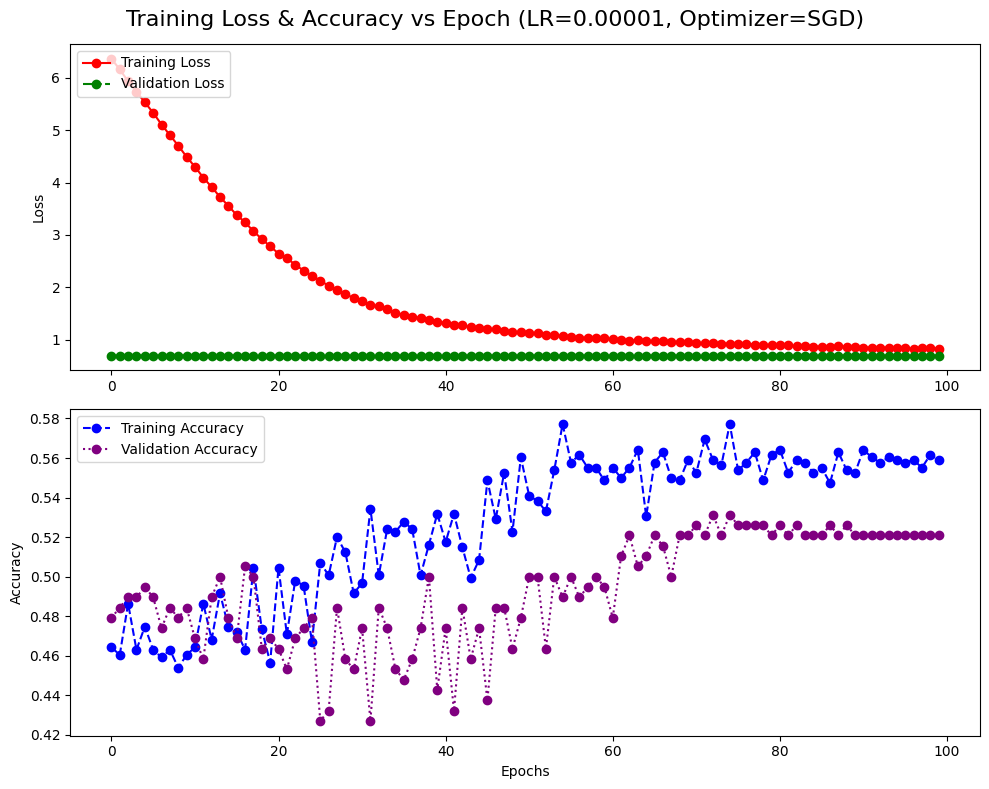

Entrenando con learning_rate=0.00001, epochs=100, optimizer=Adam


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/25 [00:00<?, ?batch/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 Training Accuracy = 0.5551232166018158
Epoch 1 Training Loss = 6.140761783614697
Epoch 1 Validation Accuracy = 0.5208333333333334
Epoch 1 Validation Loss = 0.6908861895402273
La mejor precisión de Validation Loss (0.6908861895402273) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 2 Training Accuracy = 0.5551232166018158
Epoch 2 Training Loss = 5.370082934388236
Epoch 2 Validation Accuracy = 0.5208333333333334
Epoch 2 Validation Loss = 0.6878095070521036
La mejor precisión de Validation Loss (0.6878095070521036) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 3 Training Accuracy = 0.5551232166018158
Epoch 3 Training Loss = 4.739747613939021
Epoch 3 Validation Accuracy = 0.5208333333333334
Epoch 3 Validation Loss = 0.6723187069098154
La mejor precisión de Validation Loss (0.6723187069098154) se alcanzó en la época 3


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 4 Training Accuracy = 0.5551232166018158
Epoch 4 Training Loss = 4.052977085422758
Epoch 4 Validation Accuracy = 0.5208333333333334
Epoch 4 Validation Loss = 0.637200285991033
La mejor precisión de Validation Loss (0.637200285991033) se alcanzó en la época 4


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 5 Training Accuracy = 0.5551232166018158
Epoch 5 Training Loss = 3.328910585198112
Epoch 5 Validation Accuracy = 0.5208333333333334
Epoch 5 Validation Loss = 0.5998758773008982
La mejor precisión de Validation Loss (0.5998758773008982) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 6 Training Accuracy = 0.5680933852140078
Epoch 6 Training Loss = 2.599417912820898
Epoch 6 Validation Accuracy = 0.6666666666666666
Epoch 6 Validation Loss = 0.5674888590971628
La mejor precisión de Validation Loss (0.5674888590971628) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 7 Training Accuracy = 0.7496757457846952
Epoch 7 Training Loss = 2.0602833182585996
Epoch 7 Validation Accuracy = 0.7291666666666666
Epoch 7 Validation Loss = 0.5303167849779129
La mejor precisión de Validation Loss (0.5303167849779129) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 8 Training Accuracy = 0.874189364461738
Epoch 8 Training Loss = 1.3848142283745157
Epoch 8 Validation Accuracy = 0.7604166666666666
Epoch 8 Validation Loss = 0.5057215392589569
La mejor precisión de Validation Loss (0.5057215392589569) se alcanzó en la época 8


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 9 Training Accuracy = 0.933852140077821
Epoch 9 Training Loss = 0.9503547226872425
Epoch 9 Validation Accuracy = 0.8177083333333334
Epoch 9 Validation Loss = 0.48340653379758197
La mejor precisión de Validation Loss (0.48340653379758197) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 10 Training Accuracy = 0.9701686121919585
Epoch 10 Training Loss = 0.6531715988339771
Epoch 10 Validation Accuracy = 0.8125
Epoch 10 Validation Loss = 0.45920437077681225
La mejor precisión de Validation Loss (0.45920437077681225) se alcanzó en la época 10


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 11 Training Accuracy = 0.9896238651102465
Epoch 11 Training Loss = 0.38893760503034186
Epoch 11 Validation Accuracy = 0.84375
Epoch 11 Validation Loss = 0.398700217405955
La mejor precisión de Validation Loss (0.398700217405955) se alcanzó en la época 11


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 12 Training Accuracy = 0.9961089494163424
Epoch 12 Training Loss = 0.2368522427309348
Epoch 12 Validation Accuracy = 0.8333333333333334
Epoch 12 Validation Loss = 0.3796681414047877
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 13 Training Accuracy = 0.9896238651102465
Epoch 13 Training Loss = 0.21637913472612236
Epoch 13 Validation Accuracy = 0.8385416666666666
Epoch 13 Validation Loss = 0.4153061931331952
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 14 Training Accuracy = 0.9987029831387808
Epoch 14 Training Loss = 0.1154978406336521
Epoch 14 Validation Accuracy = 0.8489583333333334
Epoch 14 Validation Loss = 0.4171142131090164
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 15 Training Accuracy = 1.0
Epoch 15 Training Loss = 0.08924100515172949
Epoch 15 Validation Accuracy = 0.8541666666666666
Epoch 15 Validation Loss = 0.4224256674448649
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 16 Training Accuracy = 1.0
Epoch 16 Training Loss = 0.05855294563427046
Epoch 16 Validation Accuracy = 0.8333333333333334
Epoch 16 Validation Loss = 0.4433920606970787
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 17 Training Accuracy = 0.9779507133592736
Epoch 17 Training Loss = 0.26154160716035796
Epoch 17 Validation Accuracy = 0.8333333333333334
Epoch 17 Validation Loss = 0.5081702470779419
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 18 Training Accuracy = 0.993514915693904
Epoch 18 Training Loss = 0.1285980415715318
Epoch 18 Validation Accuracy = 0.8333333333333334
Epoch 18 Validation Loss = 0.4347194383541743
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 19 Training Accuracy = 0.9961089494163424
Epoch 19 Training Loss = 0.13618472206917254
Epoch 19 Validation Accuracy = 0.84375
Epoch 19 Validation Loss = 0.4414870540301005
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 20 Training Accuracy = 0.9987029831387808
Epoch 20 Training Loss = 0.07639612048748402
Epoch 20 Validation Accuracy = 0.84375
Epoch 20 Validation Loss = 0.4108951811989148
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 21 Training Accuracy = 0.9974059662775616
Epoch 21 Training Loss = 0.056606413093522365
Epoch 21 Validation Accuracy = 0.8385416666666666
Epoch 21 Validation Loss = 0.444273645679156
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 22 Training Accuracy = 0.9948119325551232
Epoch 22 Training Loss = 0.0712056026616449
Epoch 22 Validation Accuracy = 0.8385416666666666
Epoch 22 Validation Loss = 0.4402165462573369
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 23 Training Accuracy = 0.9948119325551232
Epoch 23 Training Loss = 0.06115066390557048
Epoch 23 Validation Accuracy = 0.8541666666666666
Epoch 23 Validation Loss = 0.4657474036018054
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 24 Training Accuracy = 0.9974059662775616
Epoch 24 Training Loss = 0.06187274360161966
Epoch 24 Validation Accuracy = 0.828125
Epoch 24 Validation Loss = 0.48371267567078274
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 25 Training Accuracy = 0.9974059662775616
Epoch 25 Training Loss = 0.04961976719157705
Epoch 25 Validation Accuracy = 0.8489583333333334
Epoch 25 Validation Loss = 0.5293190951148669
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 26 Training Accuracy = 0.9987029831387808
Epoch 26 Training Loss = 0.05359612194635215
Epoch 26 Validation Accuracy = 0.84375
Epoch 26 Validation Loss = 0.5134163051843643
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 27 Training Accuracy = 0.9974059662775616
Epoch 27 Training Loss = 0.050686348075030224
Epoch 27 Validation Accuracy = 0.8333333333333334
Epoch 27 Validation Loss = 0.5122320751349131
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 28 Training Accuracy = 0.9987029831387808
Epoch 28 Training Loss = 0.06886855602728253
Epoch 28 Validation Accuracy = 0.84375
Epoch 28 Validation Loss = 0.5083724235494932
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 29 Training Accuracy = 0.9909208819714657
Epoch 29 Training Loss = 0.11380102909647227
Epoch 29 Validation Accuracy = 0.8489583333333334
Epoch 29 Validation Loss = 0.6201642453670502
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 30 Training Accuracy = 0.9896238651102465
Epoch 30 Training Loss = 0.12895717439948354
Epoch 30 Validation Accuracy = 0.8489583333333334
Epoch 30 Validation Loss = 0.4522978862126668
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 31 Training Accuracy = 0.9974059662775616
Epoch 31 Training Loss = 0.05059253611395331
Epoch 31 Validation Accuracy = 0.84375
Epoch 31 Validation Loss = 0.4542160965502262
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 32 Training Accuracy = 0.9961089494163424
Epoch 32 Training Loss = 0.06890065293522352
Epoch 32 Validation Accuracy = 0.8489583333333334
Epoch 32 Validation Loss = 0.42950918277104694
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 33 Training Accuracy = 0.9948119325551232
Epoch 33 Training Loss = 0.05806663663799352
Epoch 33 Validation Accuracy = 0.8385416666666666
Epoch 33 Validation Loss = 0.45910817943513393
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 34 Training Accuracy = 0.9948119325551232
Epoch 34 Training Loss = 0.07301520033414571
Epoch 34 Validation Accuracy = 0.8489583333333334
Epoch 34 Validation Loss = 0.4257693390051524
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 35 Training Accuracy = 1.0
Epoch 35 Training Loss = 0.027494955463661062
Epoch 35 Validation Accuracy = 0.8489583333333334
Epoch 35 Validation Loss = 0.4188268408179283
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 36 Training Accuracy = 0.9974059662775616
Epoch 36 Training Loss = 0.06333841369928243
Epoch 36 Validation Accuracy = 0.84375
Epoch 36 Validation Loss = 0.42149677375952405
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 37 Training Accuracy = 1.0
Epoch 37 Training Loss = 0.055170623747445885
Epoch 37 Validation Accuracy = 0.8333333333333334
Epoch 37 Validation Loss = 0.4525201618671417
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 38 Training Accuracy = 0.9987029831387808
Epoch 38 Training Loss = 0.09294163546828135
Epoch 38 Validation Accuracy = 0.8385416666666666
Epoch 38 Validation Loss = 0.4189294104774793
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 39 Training Accuracy = 1.0
Epoch 39 Training Loss = 0.03133069439978374
Epoch 39 Validation Accuracy = 0.8541666666666666
Epoch 39 Validation Loss = 0.39586952328681946
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 40 Training Accuracy = 1.0
Epoch 40 Training Loss = 0.027578774718845556
Epoch 40 Validation Accuracy = 0.84375
Epoch 40 Validation Loss = 0.40936190634965897
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 41 Training Accuracy = 0.9974059662775616
Epoch 41 Training Loss = 0.04745936084504876
Epoch 41 Validation Accuracy = 0.8333333333333334
Epoch 41 Validation Loss = 0.45983779430389404
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 42 Training Accuracy = 0.9922178988326849
Epoch 42 Training Loss = 0.07477907958197687
Epoch 42 Validation Accuracy = 0.8645833333333334
Epoch 42 Validation Loss = 0.42169207458694774
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 43 Training Accuracy = 0.9948119325551232
Epoch 43 Training Loss = 0.06804233000900031
Epoch 43 Validation Accuracy = 0.8645833333333334
Epoch 43 Validation Loss = 0.44431127856175107
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 44 Training Accuracy = 0.9948119325551232
Epoch 44 Training Loss = 0.06329248953808761
Epoch 44 Validation Accuracy = 0.8541666666666666
Epoch 44 Validation Loss = 0.44709939261277515
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 45 Training Accuracy = 1.0
Epoch 45 Training Loss = 0.024552066309133546
Epoch 45 Validation Accuracy = 0.84375
Epoch 45 Validation Loss = 0.4228217139219244
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 46 Training Accuracy = 1.0
Epoch 46 Training Loss = 0.022834279735109996
Epoch 46 Validation Accuracy = 0.84375
Epoch 46 Validation Loss = 0.4460791200399399
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 47 Training Accuracy = 1.0
Epoch 47 Training Loss = 0.018679869352766203
Epoch 47 Validation Accuracy = 0.84375
Epoch 47 Validation Loss = 0.43661001945535344
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 48 Training Accuracy = 0.9948119325551232
Epoch 48 Training Loss = 0.04608588981721188
Epoch 48 Validation Accuracy = 0.84375
Epoch 48 Validation Loss = 0.46555038789908093
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 49 Training Accuracy = 1.0
Epoch 49 Training Loss = 0.018424509578757714
Epoch 49 Validation Accuracy = 0.8333333333333334
Epoch 49 Validation Loss = 0.4674999564886093
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 50 Training Accuracy = 1.0
Epoch 50 Training Loss = 0.01511810475238025
Epoch 50 Validation Accuracy = 0.8385416666666666
Epoch 50 Validation Loss = 0.46165013313293457
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 51 Training Accuracy = 0.9974059662775616
Epoch 51 Training Loss = 0.043803926301218966
Epoch 51 Validation Accuracy = 0.8385416666666666
Epoch 51 Validation Loss = 0.46424000958601636
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 52 Training Accuracy = 0.993514915693904
Epoch 52 Training Loss = 0.09000479757553873
Epoch 52 Validation Accuracy = 0.8333333333333334
Epoch 52 Validation Loss = 0.5460068136453629
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 53 Training Accuracy = 0.9987029831387808
Epoch 53 Training Loss = 0.052967592155809685
Epoch 53 Validation Accuracy = 0.8541666666666666
Epoch 53 Validation Loss = 0.38029689093430835
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 54 Training Accuracy = 0.9987029831387808
Epoch 54 Training Loss = 0.035822147757162845
Epoch 54 Validation Accuracy = 0.84375
Epoch 54 Validation Loss = 0.3804263025522232
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 55 Training Accuracy = 0.9974059662775616
Epoch 55 Training Loss = 0.04369014891978213
Epoch 55 Validation Accuracy = 0.8489583333333334
Epoch 55 Validation Loss = 0.4124303435285886
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 56 Training Accuracy = 1.0
Epoch 56 Training Loss = 0.03631963493875028
Epoch 56 Validation Accuracy = 0.8489583333333334
Epoch 56 Validation Loss = 0.421965591609478
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 57 Training Accuracy = 1.0
Epoch 57 Training Loss = 0.0270270104538142
Epoch 57 Validation Accuracy = 0.8541666666666666
Epoch 57 Validation Loss = 0.4187890887260437
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 58 Training Accuracy = 0.9987029831387808
Epoch 58 Training Loss = 0.032171033429109944
Epoch 58 Validation Accuracy = 0.859375
Epoch 58 Validation Loss = 0.4192145864168803
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 59 Training Accuracy = 0.9987029831387808
Epoch 59 Training Loss = 0.024415466050229647
Epoch 59 Validation Accuracy = 0.8645833333333334
Epoch 59 Validation Loss = 0.41406158606211346
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 60 Training Accuracy = 0.9987029831387808
Epoch 60 Training Loss = 0.03167242347111807
Epoch 60 Validation Accuracy = 0.8541666666666666
Epoch 60 Validation Loss = 0.4703799933195114
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 61 Training Accuracy = 0.993514915693904
Epoch 61 Training Loss = 0.05251284647157993
Epoch 61 Validation Accuracy = 0.8854166666666666
Epoch 61 Validation Loss = 0.4551983177661896
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 62 Training Accuracy = 1.0
Epoch 62 Training Loss = 0.020165620219498758
Epoch 62 Validation Accuracy = 0.8697916666666666
Epoch 62 Validation Loss = 0.4345059394836426
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 63 Training Accuracy = 0.9974059662775616
Epoch 63 Training Loss = 0.04441865188602344
Epoch 63 Validation Accuracy = 0.8489583333333334
Epoch 63 Validation Loss = 0.4590138792991638
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 64 Training Accuracy = 0.9974059662775616
Epoch 64 Training Loss = 0.02224504425831806
Epoch 64 Validation Accuracy = 0.8489583333333334
Epoch 64 Validation Loss = 0.5279689282178879
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 65 Training Accuracy = 0.9961089494163424
Epoch 65 Training Loss = 0.03781241437495141
Epoch 65 Validation Accuracy = 0.828125
Epoch 65 Validation Loss = 0.5380267302195231
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 66 Training Accuracy = 0.9948119325551232
Epoch 66 Training Loss = 0.052594556612108774
Epoch 66 Validation Accuracy = 0.8385416666666666
Epoch 66 Validation Loss = 0.48321495453516644
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 67 Training Accuracy = 0.9961089494163424
Epoch 67 Training Loss = 0.058492174331006994
Epoch 67 Validation Accuracy = 0.8229166666666666
Epoch 67 Validation Loss = 0.5489876046776772
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 68 Training Accuracy = 0.993514915693904
Epoch 68 Training Loss = 0.06617761825618422
Epoch 68 Validation Accuracy = 0.8385416666666666
Epoch 68 Validation Loss = 0.512855256597201
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 69 Training Accuracy = 0.9987029831387808
Epoch 69 Training Loss = 0.02900440675893801
Epoch 69 Validation Accuracy = 0.859375
Epoch 69 Validation Loss = 0.44049768646558124
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 70 Training Accuracy = 0.9987029831387808
Epoch 70 Training Loss = 0.036343811782881444
Epoch 70 Validation Accuracy = 0.84375
Epoch 70 Validation Loss = 0.4670309287806352
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 71 Training Accuracy = 0.9922178988326849
Epoch 71 Training Loss = 0.08495931165478882
Epoch 71 Validation Accuracy = 0.8489583333333334
Epoch 71 Validation Loss = 0.48460395137468976
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 72 Training Accuracy = 1.0
Epoch 72 Training Loss = 0.019032510705340542
Epoch 72 Validation Accuracy = 0.84375
Epoch 72 Validation Loss = 0.49265702565511066
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 73 Training Accuracy = 1.0
Epoch 73 Training Loss = 0.014533335089335646
Epoch 73 Validation Accuracy = 0.8333333333333334
Epoch 73 Validation Loss = 0.48010236273209256
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 74 Training Accuracy = 1.0
Epoch 74 Training Loss = 0.011087903061980712
Epoch 74 Validation Accuracy = 0.8489583333333334
Epoch 74 Validation Loss = 0.47086956600348157
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 75 Training Accuracy = 0.9974059662775616
Epoch 75 Training Loss = 0.04547301848961376
Epoch 75 Validation Accuracy = 0.8489583333333334
Epoch 75 Validation Loss = 0.49400098621845245
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 76 Training Accuracy = 0.9974059662775616
Epoch 76 Training Loss = 0.04037728340602957
Epoch 76 Validation Accuracy = 0.8541666666666666
Epoch 76 Validation Loss = 0.47812199716766673
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 77 Training Accuracy = 0.9974059662775616
Epoch 77 Training Loss = 0.05964529781026135
Epoch 77 Validation Accuracy = 0.8489583333333334
Epoch 77 Validation Loss = 0.47523842255274457
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 78 Training Accuracy = 0.9974059662775616
Epoch 78 Training Loss = 0.036510175091592566
Epoch 78 Validation Accuracy = 0.859375
Epoch 78 Validation Loss = 0.4408995409806569
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 79 Training Accuracy = 0.9987029831387808
Epoch 79 Training Loss = 0.020683955531639812
Epoch 79 Validation Accuracy = 0.8645833333333334
Epoch 79 Validation Loss = 0.4245891223351161
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 80 Training Accuracy = 1.0
Epoch 80 Training Loss = 0.024298679535355704
Epoch 80 Validation Accuracy = 0.8645833333333334
Epoch 80 Validation Loss = 0.440956970055898
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 81 Training Accuracy = 0.9961089494163424
Epoch 81 Training Loss = 0.04491938057267403
Epoch 81 Validation Accuracy = 0.8385416666666666
Epoch 81 Validation Loss = 0.45876580973466236
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 82 Training Accuracy = 1.0
Epoch 82 Training Loss = 0.015776776132474614
Epoch 82 Validation Accuracy = 0.8489583333333334
Epoch 82 Validation Loss = 0.430679552257061
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 83 Training Accuracy = 0.9948119325551232
Epoch 83 Training Loss = 0.057869730833748745
Epoch 83 Validation Accuracy = 0.8541666666666666
Epoch 83 Validation Loss = 0.4391430194179217
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 84 Training Accuracy = 0.9948119325551232
Epoch 84 Training Loss = 0.0592861824153153
Epoch 84 Validation Accuracy = 0.828125
Epoch 84 Validation Loss = 0.4737518255909284
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 85 Training Accuracy = 0.9987029831387808
Epoch 85 Training Loss = 0.02778347376275001
Epoch 85 Validation Accuracy = 0.859375
Epoch 85 Validation Loss = 0.38726576417684555
La mejor precisión de Validation Loss (0.3796681414047877) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 86 Training Accuracy = 0.9987029831387808
Epoch 86 Training Loss = 0.03669752901475563
Epoch 86 Validation Accuracy = 0.859375
Epoch 86 Validation Loss = 0.3794231576224168
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 87 Training Accuracy = 0.9961089494163424
Epoch 87 Training Loss = 0.04969258871214554
Epoch 87 Validation Accuracy = 0.859375
Epoch 87 Validation Loss = 0.46913111458222073
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 88 Training Accuracy = 0.9961089494163424
Epoch 88 Training Loss = 0.043652626327039666
Epoch 88 Validation Accuracy = 0.875
Epoch 88 Validation Loss = 0.3966108709573746
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 89 Training Accuracy = 1.0
Epoch 89 Training Loss = 0.013912655306851972
Epoch 89 Validation Accuracy = 0.859375
Epoch 89 Validation Loss = 0.4055829594532649
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 90 Training Accuracy = 0.9974059662775616
Epoch 90 Training Loss = 0.032213969646570126
Epoch 90 Validation Accuracy = 0.8489583333333334
Epoch 90 Validation Loss = 0.4292219194273154
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 91 Training Accuracy = 0.993514915693904
Epoch 91 Training Loss = 0.05238661459911658
Epoch 91 Validation Accuracy = 0.8333333333333334
Epoch 91 Validation Loss = 0.49759597579638165
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 92 Training Accuracy = 0.9896238651102465
Epoch 92 Training Loss = 0.08033738558780977
Epoch 92 Validation Accuracy = 0.8489583333333334
Epoch 92 Validation Loss = 0.46258573482433957
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 93 Training Accuracy = 1.0
Epoch 93 Training Loss = 0.020106706130481416
Epoch 93 Validation Accuracy = 0.8541666666666666
Epoch 93 Validation Loss = 0.4543225293358167
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 94 Training Accuracy = 0.9987029831387808
Epoch 94 Training Loss = 0.018319356456959448
Epoch 94 Validation Accuracy = 0.8541666666666666
Epoch 94 Validation Loss = 0.46388237178325653
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 95 Training Accuracy = 0.9961089494163424
Epoch 95 Training Loss = 0.034256400494569315
Epoch 95 Validation Accuracy = 0.8697916666666666
Epoch 95 Validation Loss = 0.48655006537834805
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 96 Training Accuracy = 0.9987029831387808
Epoch 96 Training Loss = 0.029347317955238036
Epoch 96 Validation Accuracy = 0.84375
Epoch 96 Validation Loss = 0.4317411656181018
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 97 Training Accuracy = 0.993514915693904
Epoch 97 Training Loss = 0.046977203353833596
Epoch 97 Validation Accuracy = 0.8489583333333334
Epoch 97 Validation Loss = 0.44394685079654056
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 98 Training Accuracy = 0.9974059662775616
Epoch 98 Training Loss = 0.056711654351533775
Epoch 98 Validation Accuracy = 0.8333333333333334
Epoch 98 Validation Loss = 0.518022820353508
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 99 Training Accuracy = 0.9974059662775616
Epoch 99 Training Loss = 0.04283691556150657
Epoch 99 Validation Accuracy = 0.8489583333333334
Epoch 99 Validation Loss = 0.454403900851806
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 100 Training Accuracy = 1.0
Epoch 100 Training Loss = 0.013417139330494729
Epoch 100 Validation Accuracy = 0.859375
Epoch 100 Validation Loss = 0.4596160128712654
La mejor precisión de Validation Loss (0.3794231576224168) se alcanzó en la época 86


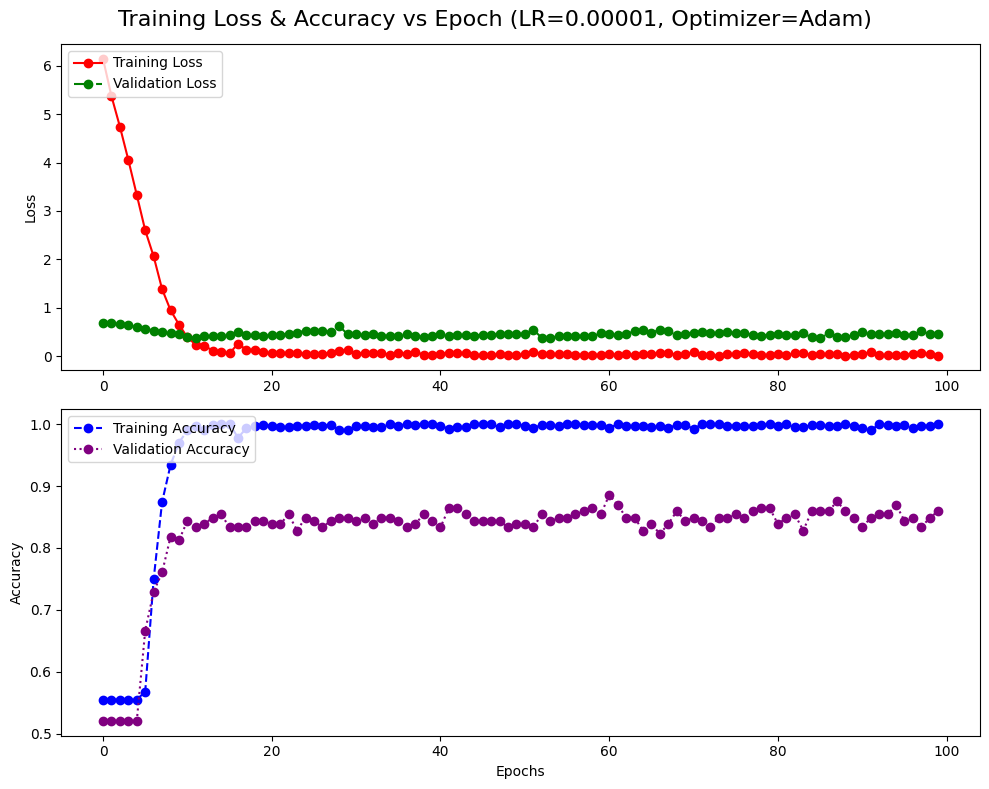

Entrenando con learning_rate=0.00001, epochs=100, optimizer=RMSprop


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/25 [00:00<?, ?batch/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 Training Accuracy = 0.5654993514915694
Epoch 1 Training Loss = 5.093081086526121
Epoch 1 Validation Accuracy = 0.5208333333333334
Epoch 1 Validation Loss = 0.6714300513267517
La mejor precisión de Validation Loss (0.6714300513267517) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 2 Training Accuracy = 0.6653696498054474
Epoch 2 Training Loss = 3.1660817931134413
Epoch 2 Validation Accuracy = 0.6510416666666666
Epoch 2 Validation Loss = 0.5930360654989878
La mejor precisión de Validation Loss (0.5930360654989878) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 3 Training Accuracy = 0.8184176394293126
Epoch 3 Training Loss = 2.0586883887242715
Epoch 3 Validation Accuracy = 0.78125
Epoch 3 Validation Loss = 0.5186312943696976
La mejor precisión de Validation Loss (0.5186312943696976) se alcanzó en la época 3


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 4 Training Accuracy = 0.9053177691309987
Epoch 4 Training Loss = 1.2893095273142814
Epoch 4 Validation Accuracy = 0.796875
Epoch 4 Validation Loss = 0.4649699926376343
La mejor precisión de Validation Loss (0.4649699926376343) se alcanzó en la época 4


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 5 Training Accuracy = 0.9649805447470817
Epoch 5 Training Loss = 0.7301273134122718
Epoch 5 Validation Accuracy = 0.8177083333333334
Epoch 5 Validation Loss = 0.40412572026252747
La mejor precisión de Validation Loss (0.40412572026252747) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 6 Training Accuracy = 0.9688715953307393
Epoch 6 Training Loss = 0.5064451332686012
Epoch 6 Validation Accuracy = 0.84375
Epoch 6 Validation Loss = 0.3917594949404399
La mejor precisión de Validation Loss (0.3917594949404399) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 7 Training Accuracy = 0.9857328145265889
Epoch 7 Training Loss = 0.2908193826984648
Epoch 7 Validation Accuracy = 0.828125
Epoch 7 Validation Loss = 0.3928593248128891
La mejor precisión de Validation Loss (0.3917594949404399) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 8 Training Accuracy = 0.9948119325551232
Epoch 8 Training Loss = 0.20319094353303527
Epoch 8 Validation Accuracy = 0.8489583333333334
Epoch 8 Validation Loss = 0.3677794262766838
La mejor precisión de Validation Loss (0.3677794262766838) se alcanzó en la época 8


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 9 Training Accuracy = 0.9909208819714657
Epoch 9 Training Loss = 0.14891096808489812
Epoch 9 Validation Accuracy = 0.8489583333333334
Epoch 9 Validation Loss = 0.3642891397078832
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 10 Training Accuracy = 0.9922178988326849
Epoch 10 Training Loss = 0.1089954138111357
Epoch 10 Validation Accuracy = 0.8541666666666666
Epoch 10 Validation Loss = 0.3701045165459315
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 11 Training Accuracy = 0.9961089494163424
Epoch 11 Training Loss = 0.07101068277535272
Epoch 11 Validation Accuracy = 0.84375
Epoch 11 Validation Loss = 0.40112367024024326
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 12 Training Accuracy = 0.9974059662775616
Epoch 12 Training Loss = 0.08114274122526365
Epoch 12 Validation Accuracy = 0.8385416666666666
Epoch 12 Validation Loss = 0.4478972405195236
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 13 Training Accuracy = 0.9987029831387808
Epoch 13 Training Loss = 0.08541915350232453
Epoch 13 Validation Accuracy = 0.8489583333333334
Epoch 13 Validation Loss = 0.4481683721144994
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 14 Training Accuracy = 1.0
Epoch 14 Training Loss = 0.044447593806473354
Epoch 14 Validation Accuracy = 0.8541666666666666
Epoch 14 Validation Loss = 0.40356580043832463
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 15 Training Accuracy = 0.9974059662775616
Epoch 15 Training Loss = 0.0845739681433147
Epoch 15 Validation Accuracy = 0.8489583333333334
Epoch 15 Validation Loss = 0.5103770742813746
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 16 Training Accuracy = 0.9974059662775616
Epoch 16 Training Loss = 0.07900667530707967
Epoch 16 Validation Accuracy = 0.875
Epoch 16 Validation Loss = 0.40857649842898053
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 17 Training Accuracy = 0.9974059662775616
Epoch 17 Training Loss = 0.07647790851605386
Epoch 17 Validation Accuracy = 0.8385416666666666
Epoch 17 Validation Loss = 0.48085107654333115
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 18 Training Accuracy = 0.9987029831387808
Epoch 18 Training Loss = 0.04245383615681633
Epoch 18 Validation Accuracy = 0.8541666666666666
Epoch 18 Validation Loss = 0.4004693900545438
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 19 Training Accuracy = 1.0
Epoch 19 Training Loss = 0.03829551365434273
Epoch 19 Validation Accuracy = 0.8697916666666666
Epoch 19 Validation Loss = 0.4504299859205882
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 20 Training Accuracy = 1.0
Epoch 20 Training Loss = 0.021893939266679506
Epoch 20 Validation Accuracy = 0.859375
Epoch 20 Validation Loss = 0.41355666518211365
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 21 Training Accuracy = 0.9948119325551232
Epoch 21 Training Loss = 0.06756003148824788
Epoch 21 Validation Accuracy = 0.8125
Epoch 21 Validation Loss = 0.560501533250014
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 22 Training Accuracy = 0.9883268482490273
Epoch 22 Training Loss = 0.08344057441994683
Epoch 22 Validation Accuracy = 0.6875
Epoch 22 Validation Loss = 1.4979826907316844
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 23 Training Accuracy = 0.9974059662775616
Epoch 23 Training Loss = 0.06422110251724797
Epoch 23 Validation Accuracy = 0.8697916666666666
Epoch 23 Validation Loss = 0.46961330622434616
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 24 Training Accuracy = 0.9948119325551232
Epoch 24 Training Loss = 0.036724124393690424
Epoch 24 Validation Accuracy = 0.8385416666666666
Epoch 24 Validation Loss = 0.4343315064907074
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 25 Training Accuracy = 0.9987029831387808
Epoch 25 Training Loss = 0.031505108498104506
Epoch 25 Validation Accuracy = 0.875
Epoch 25 Validation Loss = 0.4219306881229083
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 26 Training Accuracy = 0.9948119325551232
Epoch 26 Training Loss = 0.0649143804140128
Epoch 26 Validation Accuracy = 0.796875
Epoch 26 Validation Loss = 0.7229915161927541
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 27 Training Accuracy = 0.9974059662775616
Epoch 27 Training Loss = 0.04977470323269469
Epoch 27 Validation Accuracy = 0.8802083333333334
Epoch 27 Validation Loss = 0.4007548491160075
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 28 Training Accuracy = 0.9987029831387808
Epoch 28 Training Loss = 0.022218455291134528
Epoch 28 Validation Accuracy = 0.8541666666666666
Epoch 28 Validation Loss = 0.38541929920514423
La mejor precisión de Validation Loss (0.3642891397078832) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 29 Training Accuracy = 1.0
Epoch 29 Training Loss = 0.018803133036163378
Epoch 29 Validation Accuracy = 0.8541666666666666
Epoch 29 Validation Loss = 0.3618573347727458
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 30 Training Accuracy = 1.0
Epoch 30 Training Loss = 0.013073869537557301
Epoch 30 Validation Accuracy = 0.859375
Epoch 30 Validation Loss = 0.3823130701979001
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 31 Training Accuracy = 1.0
Epoch 31 Training Loss = 0.011610143843327978
Epoch 31 Validation Accuracy = 0.8645833333333334
Epoch 31 Validation Loss = 0.3889149675766627
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 32 Training Accuracy = 0.9987029831387808
Epoch 32 Training Loss = 0.016177802533877652
Epoch 32 Validation Accuracy = 0.8489583333333334
Epoch 32 Validation Loss = 0.4262355665365855
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 33 Training Accuracy = 1.0
Epoch 33 Training Loss = 0.01787812882205701
Epoch 33 Validation Accuracy = 0.8645833333333334
Epoch 33 Validation Loss = 0.43724767367045086
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 34 Training Accuracy = 0.9987029831387808
Epoch 34 Training Loss = 0.03491216550077446
Epoch 34 Validation Accuracy = 0.8072916666666666
Epoch 34 Validation Loss = 0.8676027854283651
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 35 Training Accuracy = 0.9987029831387808
Epoch 35 Training Loss = 0.01661257658893032
Epoch 35 Validation Accuracy = 0.8333333333333334
Epoch 35 Validation Loss = 0.5612911134958267
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 36 Training Accuracy = 0.9987029831387808
Epoch 36 Training Loss = 0.01629374696161651
Epoch 36 Validation Accuracy = 0.8489583333333334
Epoch 36 Validation Loss = 0.5122830172379812
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 37 Training Accuracy = 0.9987029831387808
Epoch 37 Training Loss = 0.01887179889876864
Epoch 37 Validation Accuracy = 0.828125
Epoch 37 Validation Loss = 0.7080828994512558
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 38 Training Accuracy = 0.9987029831387808
Epoch 38 Training Loss = 0.021364389497173127
Epoch 38 Validation Accuracy = 0.859375
Epoch 38 Validation Loss = 0.4183622673153877
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 39 Training Accuracy = 0.9987029831387808
Epoch 39 Training Loss = 0.011211545294786088
Epoch 39 Validation Accuracy = 0.8541666666666666
Epoch 39 Validation Loss = 0.4276977653304736
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 40 Training Accuracy = 1.0
Epoch 40 Training Loss = 0.010937952133313536
Epoch 40 Validation Accuracy = 0.84375
Epoch 40 Validation Loss = 0.5376245155930519
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 41 Training Accuracy = 0.9948119325551232
Epoch 41 Training Loss = 0.02875150436711837
Epoch 41 Validation Accuracy = 0.8802083333333334
Epoch 41 Validation Loss = 0.49768706659475964
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 42 Training Accuracy = 0.9948119325551232
Epoch 42 Training Loss = 0.02243213962410829
Epoch 42 Validation Accuracy = 0.859375
Epoch 42 Validation Loss = 0.6146487959971031
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 43 Training Accuracy = 0.9974059662775616
Epoch 43 Training Loss = 0.03273455340363298
Epoch 43 Validation Accuracy = 0.859375
Epoch 43 Validation Loss = 0.49445341279109317
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 44 Training Accuracy = 0.9987029831387808
Epoch 44 Training Loss = 0.01167666633769232
Epoch 44 Validation Accuracy = 0.8385416666666666
Epoch 44 Validation Loss = 0.5984445015589396
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 45 Training Accuracy = 1.0
Epoch 45 Training Loss = 0.01564409825727392
Epoch 45 Validation Accuracy = 0.8541666666666666
Epoch 45 Validation Loss = 0.5679824848969778
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 46 Training Accuracy = 0.9961089494163424
Epoch 46 Training Loss = 0.027145366956287786
Epoch 46 Validation Accuracy = 0.8489583333333334
Epoch 46 Validation Loss = 0.5276184976100922
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 47 Training Accuracy = 0.9948119325551232
Epoch 47 Training Loss = 0.04031609180449821
Epoch 47 Validation Accuracy = 0.8541666666666666
Epoch 47 Validation Loss = 0.6282120905816555
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 48 Training Accuracy = 0.993514915693904
Epoch 48 Training Loss = 0.05118571389249095
Epoch 48 Validation Accuracy = 0.859375
Epoch 48 Validation Loss = 0.5242892503738403
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 49 Training Accuracy = 0.9974059662775616
Epoch 49 Training Loss = 0.02955648931161284
Epoch 49 Validation Accuracy = 0.8645833333333334
Epoch 49 Validation Loss = 0.4895578945676486
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 50 Training Accuracy = 0.9974059662775616
Epoch 50 Training Loss = 0.02681533711323401
Epoch 50 Validation Accuracy = 0.859375
Epoch 50 Validation Loss = 0.4574962817132473
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 51 Training Accuracy = 1.0
Epoch 51 Training Loss = 0.010714095467568682
Epoch 51 Validation Accuracy = 0.8229166666666666
Epoch 51 Validation Loss = 0.7380247116088867
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 52 Training Accuracy = 1.0
Epoch 52 Training Loss = 0.008553141875412368
Epoch 52 Validation Accuracy = 0.8645833333333334
Epoch 52 Validation Loss = 0.48421791940927505
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 53 Training Accuracy = 0.9974059662775616
Epoch 53 Training Loss = 0.02005347942488918
Epoch 53 Validation Accuracy = 0.8541666666666666
Epoch 53 Validation Loss = 0.4423140709598859
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 54 Training Accuracy = 1.0
Epoch 54 Training Loss = 0.005340342321125102
Epoch 54 Validation Accuracy = 0.8489583333333334
Epoch 54 Validation Loss = 0.4476122347017129
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 55 Training Accuracy = 1.0
Epoch 55 Training Loss = 0.006318690600755459
Epoch 55 Validation Accuracy = 0.8541666666666666
Epoch 55 Validation Loss = 0.45893553147713345
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 56 Training Accuracy = 1.0
Epoch 56 Training Loss = 0.024113176305972803
Epoch 56 Validation Accuracy = 0.8333333333333334
Epoch 56 Validation Loss = 0.4916077231367429
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 57 Training Accuracy = 0.9987029831387808
Epoch 57 Training Loss = 0.006669492245773783
Epoch 57 Validation Accuracy = 0.8541666666666666
Epoch 57 Validation Loss = 0.5655510375897089
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 58 Training Accuracy = 0.9987029831387808
Epoch 58 Training Loss = 0.0077004844634449435
Epoch 58 Validation Accuracy = 0.8385416666666666
Epoch 58 Validation Loss = 0.5730952074130377
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 59 Training Accuracy = 1.0
Epoch 59 Training Loss = 0.00356082419892616
Epoch 59 Validation Accuracy = 0.859375
Epoch 59 Validation Loss = 0.48407454788684845
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 60 Training Accuracy = 0.9974059662775616
Epoch 60 Training Loss = 0.04592607801854997
Epoch 60 Validation Accuracy = 0.8125
Epoch 60 Validation Loss = 0.6730861365795135
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 61 Training Accuracy = 0.9974059662775616
Epoch 61 Training Loss = 0.04143754264820565
Epoch 61 Validation Accuracy = 0.8489583333333334
Epoch 61 Validation Loss = 0.5189212908347448
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 62 Training Accuracy = 0.9948119325551232
Epoch 62 Training Loss = 0.016382825112721645
Epoch 62 Validation Accuracy = 0.8489583333333334
Epoch 62 Validation Loss = 0.5148973862330118
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 63 Training Accuracy = 0.9974059662775616
Epoch 63 Training Loss = 0.04640653827523598
Epoch 63 Validation Accuracy = 0.8020833333333334
Epoch 63 Validation Loss = 0.7536683479944865
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 64 Training Accuracy = 0.9987029831387808
Epoch 64 Training Loss = 0.01711983691892513
Epoch 64 Validation Accuracy = 0.8541666666666666
Epoch 64 Validation Loss = 0.4582338184118271
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 65 Training Accuracy = 0.9974059662775616
Epoch 65 Training Loss = 0.030876076866023425
Epoch 65 Validation Accuracy = 0.8020833333333334
Epoch 65 Validation Loss = 0.6515067170063654
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 66 Training Accuracy = 0.993514915693904
Epoch 66 Training Loss = 0.04394060285005781
Epoch 66 Validation Accuracy = 0.8645833333333334
Epoch 66 Validation Loss = 0.4792262365420659
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 67 Training Accuracy = 1.0
Epoch 67 Training Loss = 0.004202329987314579
Epoch 67 Validation Accuracy = 0.8385416666666666
Epoch 67 Validation Loss = 0.5198127354184786
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 68 Training Accuracy = 0.9961089494163424
Epoch 68 Training Loss = 0.019006205353059656
Epoch 68 Validation Accuracy = 0.84375
Epoch 68 Validation Loss = 0.5697393864393234
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 69 Training Accuracy = 0.9987029831387808
Epoch 69 Training Loss = 0.017876904718722816
Epoch 69 Validation Accuracy = 0.84375
Epoch 69 Validation Loss = 0.5168805668751398
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 70 Training Accuracy = 0.9987029831387808
Epoch 70 Training Loss = 0.018787070683622793
Epoch 70 Validation Accuracy = 0.8697916666666666
Epoch 70 Validation Loss = 0.49194097022215527
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 71 Training Accuracy = 0.9987029831387808
Epoch 71 Training Loss = 0.014766444274539613
Epoch 71 Validation Accuracy = 0.828125
Epoch 71 Validation Loss = 0.5477464397748312
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 72 Training Accuracy = 0.9961089494163424
Epoch 72 Training Loss = 0.020139639035118537
Epoch 72 Validation Accuracy = 0.875
Epoch 72 Validation Loss = 0.48513031254212063
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 73 Training Accuracy = 1.0
Epoch 73 Training Loss = 0.004380323276667821
Epoch 73 Validation Accuracy = 0.84375
Epoch 73 Validation Loss = 0.46262019375960034
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 74 Training Accuracy = 0.9987029831387808
Epoch 74 Training Loss = 0.03406317534961589
Epoch 74 Validation Accuracy = 0.828125
Epoch 74 Validation Loss = 0.5460967992742857
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 75 Training Accuracy = 0.9948119325551232
Epoch 75 Training Loss = 0.03422312101593239
Epoch 75 Validation Accuracy = 0.8541666666666666
Epoch 75 Validation Loss = 0.5139416307210922
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 76 Training Accuracy = 0.9974059662775616
Epoch 76 Training Loss = 0.04340101608429128
Epoch 76 Validation Accuracy = 0.8385416666666666
Epoch 76 Validation Loss = 0.6242151707410812
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 77 Training Accuracy = 0.9909208819714657
Epoch 77 Training Loss = 0.030336557870885374
Epoch 77 Validation Accuracy = 0.8489583333333334
Epoch 77 Validation Loss = 0.49655988564093906
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 78 Training Accuracy = 1.0
Epoch 78 Training Loss = 0.005909928126712408
Epoch 78 Validation Accuracy = 0.8385416666666666
Epoch 78 Validation Loss = 0.47324297328790027
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 79 Training Accuracy = 0.9961089494163424
Epoch 79 Training Loss = 0.03798221018353789
Epoch 79 Validation Accuracy = 0.7916666666666666
Epoch 79 Validation Loss = 0.6931338012218475
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 80 Training Accuracy = 0.9870298313878081
Epoch 80 Training Loss = 0.10082099722980989
Epoch 80 Validation Accuracy = 0.8072916666666666
Epoch 80 Validation Loss = 0.5767395769556364
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 81 Training Accuracy = 0.9961089494163424
Epoch 81 Training Loss = 0.025610604848599137
Epoch 81 Validation Accuracy = 0.8385416666666666
Epoch 81 Validation Loss = 0.4689903644224008
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 82 Training Accuracy = 1.0
Epoch 82 Training Loss = 0.0066603215776103635
Epoch 82 Validation Accuracy = 0.8489583333333334
Epoch 82 Validation Loss = 0.4738295264542103
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 83 Training Accuracy = 0.9974059662775616
Epoch 83 Training Loss = 0.016939480732232524
Epoch 83 Validation Accuracy = 0.8229166666666666
Epoch 83 Validation Loss = 0.6537858893473943
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 84 Training Accuracy = 0.9948119325551232
Epoch 84 Training Loss = 0.0415615482900857
Epoch 84 Validation Accuracy = 0.8385416666666666
Epoch 84 Validation Loss = 0.5996585885683695
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 85 Training Accuracy = 0.9961089494163424
Epoch 85 Training Loss = 0.0298500410685782
Epoch 85 Validation Accuracy = 0.828125
Epoch 85 Validation Loss = 0.4919986352324486
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 86 Training Accuracy = 1.0
Epoch 86 Training Loss = 0.005459650143033954
Epoch 86 Validation Accuracy = 0.8489583333333334
Epoch 86 Validation Loss = 0.5166961625218391
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 87 Training Accuracy = 0.9987029831387808
Epoch 87 Training Loss = 0.015144784555525245
Epoch 87 Validation Accuracy = 0.8385416666666666
Epoch 87 Validation Loss = 0.48969144622484845
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 88 Training Accuracy = 1.0
Epoch 88 Training Loss = 0.008376483294518542
Epoch 88 Validation Accuracy = 0.84375
Epoch 88 Validation Loss = 0.5274750938018163
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 89 Training Accuracy = 1.0
Epoch 89 Training Loss = 0.004026101737243308
Epoch 89 Validation Accuracy = 0.8489583333333334
Epoch 89 Validation Loss = 0.5113167862097422
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 90 Training Accuracy = 1.0
Epoch 90 Training Loss = 0.003973195123958525
Epoch 90 Validation Accuracy = 0.8489583333333334
Epoch 90 Validation Loss = 0.5252417673667272
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 91 Training Accuracy = 1.0
Epoch 91 Training Loss = 0.0038860947057972003
Epoch 91 Validation Accuracy = 0.8541666666666666
Epoch 91 Validation Loss = 0.5490332941214243
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 92 Training Accuracy = 1.0
Epoch 92 Training Loss = 0.00355580114263041
Epoch 92 Validation Accuracy = 0.8333333333333334
Epoch 92 Validation Loss = 0.5327453960975012
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 93 Training Accuracy = 1.0
Epoch 93 Training Loss = 0.0030066562289838353
Epoch 93 Validation Accuracy = 0.8385416666666666
Epoch 93 Validation Loss = 0.5637187212705612
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 94 Training Accuracy = 0.9974059662775616
Epoch 94 Training Loss = 0.01842248240720128
Epoch 94 Validation Accuracy = 0.7708333333333334
Epoch 94 Validation Loss = 0.9655486742655436
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 95 Training Accuracy = 0.9948119325551232
Epoch 95 Training Loss = 0.03615695090503003
Epoch 95 Validation Accuracy = 0.8697916666666666
Epoch 95 Validation Loss = 0.5353709111611048
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 96 Training Accuracy = 1.0
Epoch 96 Training Loss = 0.003085339137796317
Epoch 96 Validation Accuracy = 0.875
Epoch 96 Validation Loss = 0.5178476348519325
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 97 Training Accuracy = 1.0
Epoch 97 Training Loss = 0.0181699181229224
Epoch 97 Validation Accuracy = 0.8489583333333334
Epoch 97 Validation Loss = 0.6164650519688925
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 98 Training Accuracy = 0.9974059662775616
Epoch 98 Training Loss = 0.0327602967228221
Epoch 98 Validation Accuracy = 0.8385416666666666
Epoch 98 Validation Loss = 0.6551168113946915
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 99 Training Accuracy = 1.0
Epoch 99 Training Loss = 0.00457180267013851
Epoch 99 Validation Accuracy = 0.8541666666666666
Epoch 99 Validation Loss = 0.5947338653107485
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 100 Training Accuracy = 1.0
Epoch 100 Training Loss = 0.002847375862793236
Epoch 100 Validation Accuracy = 0.8697916666666666
Epoch 100 Validation Loss = 0.5931500320633253
La mejor precisión de Validation Loss (0.3618573347727458) se alcanzó en la época 29


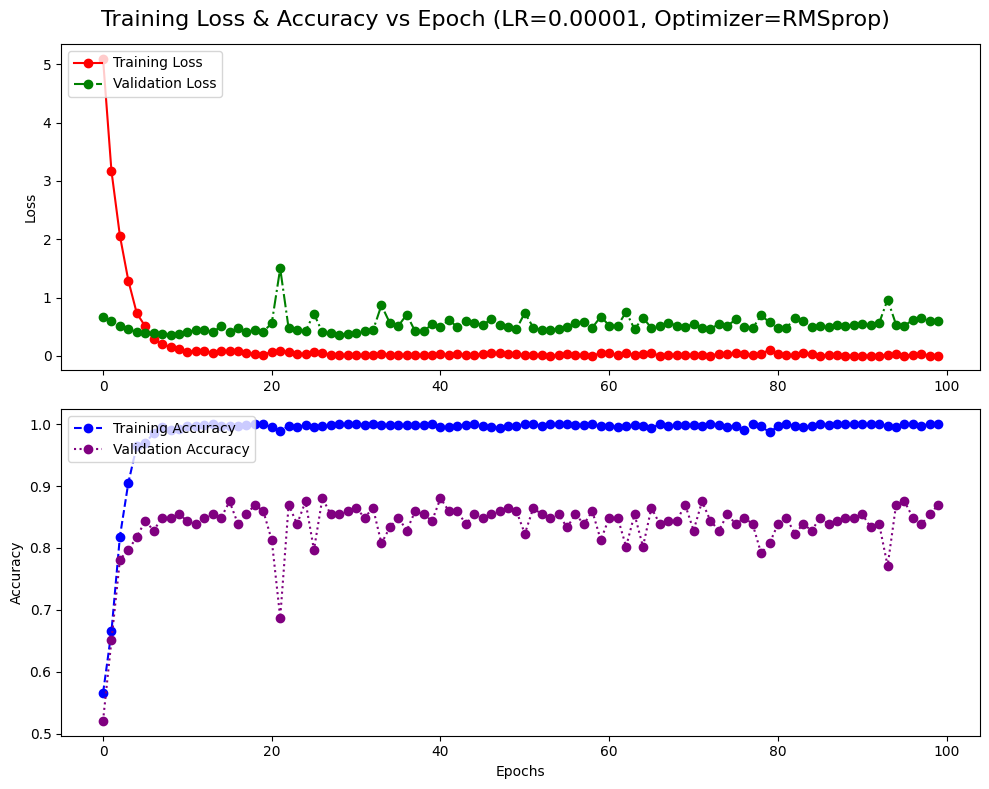

Entrenando con learning_rate=0.00010, epochs=100, optimizer=SGD


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/25 [00:00<?, ?batch/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 Training Accuracy = 0.5551232166018158
Epoch 1 Training Loss = 5.91716605247072
Epoch 1 Validation Accuracy = 0.5208333333333334
Epoch 1 Validation Loss = 0.6916197240352631
La mejor precisión de Validation Loss (0.6916197240352631) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 2 Training Accuracy = 0.5538261997405967
Epoch 2 Training Loss = 4.1701784467882685
Epoch 2 Validation Accuracy = 0.5208333333333334
Epoch 2 Validation Loss = 0.6919814646244049
La mejor precisión de Validation Loss (0.6916197240352631) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 3 Training Accuracy = 0.556420233463035
Epoch 3 Training Loss = 2.6453901400980473
Epoch 3 Validation Accuracy = 0.5208333333333334
Epoch 3 Validation Loss = 0.6914606889088949
La mejor precisión de Validation Loss (0.6914606889088949) se alcanzó en la época 3


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 4 Training Accuracy = 0.5551232166018158
Epoch 4 Training Loss = 1.730330516082922
Epoch 4 Validation Accuracy = 0.5208333333333334
Epoch 4 Validation Loss = 0.6917227705319723
La mejor precisión de Validation Loss (0.6914606889088949) se alcanzó en la época 3


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 5 Training Accuracy = 0.5551232166018158
Epoch 5 Training Loss = 1.2830223006651713
Epoch 5 Validation Accuracy = 0.5208333333333334
Epoch 5 Validation Loss = 0.691846509774526
La mejor precisión de Validation Loss (0.6914606889088949) se alcanzó en la época 3


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 6 Training Accuracy = 0.5551232166018158
Epoch 6 Training Loss = 1.0873282264951911
Epoch 6 Validation Accuracy = 0.5208333333333334
Epoch 6 Validation Loss = 0.6912626028060913
La mejor precisión de Validation Loss (0.6912626028060913) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 7 Training Accuracy = 0.5551232166018158
Epoch 7 Training Loss = 0.9842385310297965
Epoch 7 Validation Accuracy = 0.5208333333333334
Epoch 7 Validation Loss = 0.6913323501745859
La mejor precisión de Validation Loss (0.6912626028060913) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 8 Training Accuracy = 0.5551232166018158
Epoch 8 Training Loss = 0.937368950645902
Epoch 8 Validation Accuracy = 0.5208333333333334
Epoch 8 Validation Loss = 0.6910132865111033
La mejor precisión de Validation Loss (0.6910132865111033) se alcanzó en la época 8


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 9 Training Accuracy = 0.5551232166018158
Epoch 9 Training Loss = 0.8976711274430291
Epoch 9 Validation Accuracy = 0.5208333333333334
Epoch 9 Validation Loss = 0.6912385026613871
La mejor precisión de Validation Loss (0.6910132865111033) se alcanzó en la época 8


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 10 Training Accuracy = 0.5551232166018158
Epoch 10 Training Loss = 0.8666415366062704
Epoch 10 Validation Accuracy = 0.5208333333333334
Epoch 10 Validation Loss = 0.6911596655845642
La mejor precisión de Validation Loss (0.6910132865111033) se alcanzó en la época 8


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 11 Training Accuracy = 0.5551232166018158
Epoch 11 Training Loss = 0.8387094303173159
Epoch 11 Validation Accuracy = 0.5208333333333334
Epoch 11 Validation Loss = 0.6911175747712454
La mejor precisión de Validation Loss (0.6910132865111033) se alcanzó en la época 8


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 12 Training Accuracy = 0.5551232166018158
Epoch 12 Training Loss = 0.8110796718745844
Epoch 12 Validation Accuracy = 0.5208333333333334
Epoch 12 Validation Loss = 0.6910078326861063
La mejor precisión de Validation Loss (0.6910078326861063) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 13 Training Accuracy = 0.5551232166018158
Epoch 13 Training Loss = 0.8141995990013489
Epoch 13 Validation Accuracy = 0.5208333333333334
Epoch 13 Validation Loss = 0.6907976865768433
La mejor precisión de Validation Loss (0.6907976865768433) se alcanzó en la época 13


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 14 Training Accuracy = 0.5551232166018158
Epoch 14 Training Loss = 0.783340339994616
Epoch 14 Validation Accuracy = 0.5208333333333334
Epoch 14 Validation Loss = 0.6906950175762177
La mejor precisión de Validation Loss (0.6906950175762177) se alcanzó en la época 14


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 15 Training Accuracy = 0.5551232166018158
Epoch 15 Training Loss = 0.7863468285819126
Epoch 15 Validation Accuracy = 0.5208333333333334
Epoch 15 Validation Loss = 0.6908805270989736
La mejor precisión de Validation Loss (0.6906950175762177) se alcanzó en la época 14


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 16 Training Accuracy = 0.5551232166018158
Epoch 16 Training Loss = 0.7706625047979343
Epoch 16 Validation Accuracy = 0.5208333333333334
Epoch 16 Validation Loss = 0.6906919876734415
La mejor precisión de Validation Loss (0.6906919876734415) se alcanzó en la época 16


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 17 Training Accuracy = 0.5551232166018158
Epoch 17 Training Loss = 0.760920777472386
Epoch 17 Validation Accuracy = 0.5208333333333334
Epoch 17 Validation Loss = 0.6905521353085836
La mejor precisión de Validation Loss (0.6905521353085836) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 18 Training Accuracy = 0.5551232166018158
Epoch 18 Training Loss = 0.7518038443554236
Epoch 18 Validation Accuracy = 0.5208333333333334
Epoch 18 Validation Loss = 0.6905727485815684
La mejor precisión de Validation Loss (0.6905521353085836) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 19 Training Accuracy = 0.5551232166018158
Epoch 19 Training Loss = 0.7456972687160922
Epoch 19 Validation Accuracy = 0.5208333333333334
Epoch 19 Validation Loss = 0.6904645760854086
La mejor precisión de Validation Loss (0.6904645760854086) se alcanzó en la época 19


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 20 Training Accuracy = 0.5551232166018158
Epoch 20 Training Loss = 0.7406670097865637
Epoch 20 Validation Accuracy = 0.5208333333333334
Epoch 20 Validation Loss = 0.690330425898234
La mejor precisión de Validation Loss (0.690330425898234) se alcanzó en la época 20


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 21 Training Accuracy = 0.5551232166018158
Epoch 21 Training Loss = 0.7351772463584534
Epoch 21 Validation Accuracy = 0.5208333333333334
Epoch 21 Validation Loss = 0.6903921465078989
La mejor precisión de Validation Loss (0.690330425898234) se alcanzó en la época 20


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 22 Training Accuracy = 0.5551232166018158
Epoch 22 Training Loss = 0.738801599476588
Epoch 22 Validation Accuracy = 0.5208333333333334
Epoch 22 Validation Loss = 0.6903428932030996
La mejor precisión de Validation Loss (0.690330425898234) se alcanzó en la época 20


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 23 Training Accuracy = 0.5551232166018158
Epoch 23 Training Loss = 0.7259936854533184
Epoch 23 Validation Accuracy = 0.5208333333333334
Epoch 23 Validation Loss = 0.6902504364649454
La mejor precisión de Validation Loss (0.6902504364649454) se alcanzó en la época 23


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 24 Training Accuracy = 0.5551232166018158
Epoch 24 Training Loss = 0.7301573201376177
Epoch 24 Validation Accuracy = 0.5208333333333334
Epoch 24 Validation Loss = 0.6899186968803406
La mejor precisión de Validation Loss (0.6899186968803406) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 25 Training Accuracy = 0.5551232166018158
Epoch 25 Training Loss = 0.7285668221429165
Epoch 25 Validation Accuracy = 0.5208333333333334
Epoch 25 Validation Loss = 0.6898676852385203
La mejor precisión de Validation Loss (0.6898676852385203) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 26 Training Accuracy = 0.5551232166018158
Epoch 26 Training Loss = 0.7267350419176847
Epoch 26 Validation Accuracy = 0.5208333333333334
Epoch 26 Validation Loss = 0.6899983187516531
La mejor precisión de Validation Loss (0.6898676852385203) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 27 Training Accuracy = 0.5551232166018158
Epoch 27 Training Loss = 0.7290061873066132
Epoch 27 Validation Accuracy = 0.5208333333333334
Epoch 27 Validation Loss = 0.6899310648441315
La mejor precisión de Validation Loss (0.6898676852385203) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 28 Training Accuracy = 0.5551232166018158
Epoch 28 Training Loss = 0.7193491209187242
Epoch 28 Validation Accuracy = 0.5208333333333334
Epoch 28 Validation Loss = 0.689771036307017
La mejor precisión de Validation Loss (0.689771036307017) se alcanzó en la época 28


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 29 Training Accuracy = 0.5551232166018158
Epoch 29 Training Loss = 0.7153272881582089
Epoch 29 Validation Accuracy = 0.5208333333333334
Epoch 29 Validation Loss = 0.6894967158635458
La mejor precisión de Validation Loss (0.6894967158635458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 30 Training Accuracy = 0.5551232166018158
Epoch 30 Training Loss = 0.7137957676839272
Epoch 30 Validation Accuracy = 0.5208333333333334
Epoch 30 Validation Loss = 0.6895485619703928
La mejor precisión de Validation Loss (0.6894967158635458) se alcanzó en la época 29


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 31 Training Accuracy = 0.5551232166018158
Epoch 31 Training Loss = 0.7098982848236688
Epoch 31 Validation Accuracy = 0.5208333333333334
Epoch 31 Validation Loss = 0.6894418398539225
La mejor precisión de Validation Loss (0.6894418398539225) se alcanzó en la época 31


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 32 Training Accuracy = 0.5551232166018158
Epoch 32 Training Loss = 0.7096307979638166
Epoch 32 Validation Accuracy = 0.5208333333333334
Epoch 32 Validation Loss = 0.6896077295144399
La mejor precisión de Validation Loss (0.6894418398539225) se alcanzó en la época 31


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 33 Training Accuracy = 0.5551232166018158
Epoch 33 Training Loss = 0.7140902146291176
Epoch 33 Validation Accuracy = 0.5208333333333334
Epoch 33 Validation Loss = 0.6897628406683604
La mejor precisión de Validation Loss (0.6894418398539225) se alcanzó en la época 31


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 34 Training Accuracy = 0.5551232166018158
Epoch 34 Training Loss = 0.7196487415625428
Epoch 34 Validation Accuracy = 0.5208333333333334
Epoch 34 Validation Loss = 0.689240425825119
La mejor precisión de Validation Loss (0.689240425825119) se alcanzó en la época 34


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 35 Training Accuracy = 0.5551232166018158
Epoch 35 Training Loss = 0.7130193486906365
Epoch 35 Validation Accuracy = 0.5208333333333334
Epoch 35 Validation Loss = 0.6892992655436198
La mejor precisión de Validation Loss (0.689240425825119) se alcanzó en la época 34


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 36 Training Accuracy = 0.5551232166018158
Epoch 36 Training Loss = 0.7064502614172207
Epoch 36 Validation Accuracy = 0.5208333333333334
Epoch 36 Validation Loss = 0.689267486333847
La mejor precisión de Validation Loss (0.689240425825119) se alcanzó en la época 34


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 37 Training Accuracy = 0.5551232166018158
Epoch 37 Training Loss = 0.7101616418779129
Epoch 37 Validation Accuracy = 0.5208333333333334
Epoch 37 Validation Loss = 0.6890346904595693
La mejor precisión de Validation Loss (0.6890346904595693) se alcanzó en la época 37


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 38 Training Accuracy = 0.5551232166018158
Epoch 38 Training Loss = 0.7107226097166306
Epoch 38 Validation Accuracy = 0.5208333333333334
Epoch 38 Validation Loss = 0.68902388215065
La mejor precisión de Validation Loss (0.68902388215065) se alcanzó en la época 38


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 39 Training Accuracy = 0.5551232166018158
Epoch 39 Training Loss = 0.7116733184893617
Epoch 39 Validation Accuracy = 0.5208333333333334
Epoch 39 Validation Loss = 0.6887242197990417
La mejor precisión de Validation Loss (0.6887242197990417) se alcanzó en la época 39


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 40 Training Accuracy = 0.5551232166018158
Epoch 40 Training Loss = 0.7067961953338792
Epoch 40 Validation Accuracy = 0.5208333333333334
Epoch 40 Validation Loss = 0.6886599461237589
La mejor precisión de Validation Loss (0.6886599461237589) se alcanzó en la época 40


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 41 Training Accuracy = 0.5551232166018158
Epoch 41 Training Loss = 0.7052068162984885
Epoch 41 Validation Accuracy = 0.5208333333333334
Epoch 41 Validation Loss = 0.6885919769605001
La mejor precisión de Validation Loss (0.6885919769605001) se alcanzó en la época 41


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 42 Training Accuracy = 0.5551232166018158
Epoch 42 Training Loss = 0.710781014692304
Epoch 42 Validation Accuracy = 0.5208333333333334
Epoch 42 Validation Loss = 0.6886025071144104
La mejor precisión de Validation Loss (0.6885919769605001) se alcanzó en la época 41


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 43 Training Accuracy = 0.5551232166018158
Epoch 43 Training Loss = 0.7027352530359449
Epoch 43 Validation Accuracy = 0.5208333333333334
Epoch 43 Validation Loss = 0.6885574559370676
La mejor precisión de Validation Loss (0.6885574559370676) se alcanzó en la época 43


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 44 Training Accuracy = 0.5551232166018158
Epoch 44 Training Loss = 0.698932640592721
Epoch 44 Validation Accuracy = 0.5208333333333334
Epoch 44 Validation Loss = 0.6883268058300018
La mejor precisión de Validation Loss (0.6883268058300018) se alcanzó en la época 44


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 45 Training Accuracy = 0.5551232166018158
Epoch 45 Training Loss = 0.6969398057569016
Epoch 45 Validation Accuracy = 0.5208333333333334
Epoch 45 Validation Loss = 0.6881840427716573
La mejor precisión de Validation Loss (0.6881840427716573) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 46 Training Accuracy = 0.5551232166018158
Epoch 46 Training Loss = 0.6996107556012818
Epoch 46 Validation Accuracy = 0.5208333333333334
Epoch 46 Validation Loss = 0.6880811353524526
La mejor precisión de Validation Loss (0.6880811353524526) se alcanzó en la época 46


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 47 Training Accuracy = 0.5551232166018158
Epoch 47 Training Loss = 0.6972431732986688
Epoch 47 Validation Accuracy = 0.5208333333333334
Epoch 47 Validation Loss = 0.6878037949403127
La mejor precisión de Validation Loss (0.6878037949403127) se alcanzó en la época 47


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 48 Training Accuracy = 0.5551232166018158
Epoch 48 Training Loss = 0.7022593279602308
Epoch 48 Validation Accuracy = 0.5208333333333334
Epoch 48 Validation Loss = 0.687836358944575
La mejor precisión de Validation Loss (0.6878037949403127) se alcanzó en la época 47


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 49 Training Accuracy = 0.5551232166018158
Epoch 49 Training Loss = 0.7120715419915246
Epoch 49 Validation Accuracy = 0.5208333333333334
Epoch 49 Validation Loss = 0.6879505117734274
La mejor precisión de Validation Loss (0.6878037949403127) se alcanzó en la época 47


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 50 Training Accuracy = 0.5551232166018158
Epoch 50 Training Loss = 0.7064958915945466
Epoch 50 Validation Accuracy = 0.5208333333333334
Epoch 50 Validation Loss = 0.6878058513005575
La mejor precisión de Validation Loss (0.6878037949403127) se alcanzó en la época 47


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 51 Training Accuracy = 0.5551232166018158
Epoch 51 Training Loss = 0.7057904031335457
Epoch 51 Validation Accuracy = 0.5208333333333334
Epoch 51 Validation Loss = 0.6879604160785675
La mejor precisión de Validation Loss (0.6878037949403127) se alcanzó en la época 47


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 52 Training Accuracy = 0.5551232166018158
Epoch 52 Training Loss = 0.7111258768076717
Epoch 52 Validation Accuracy = 0.5208333333333334
Epoch 52 Validation Loss = 0.6878663897514343
La mejor precisión de Validation Loss (0.6878037949403127) se alcanzó en la época 47


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 53 Training Accuracy = 0.5551232166018158
Epoch 53 Training Loss = 0.7116939101546964
Epoch 53 Validation Accuracy = 0.5208333333333334
Epoch 53 Validation Loss = 0.6879488527774811
La mejor precisión de Validation Loss (0.6878037949403127) se alcanzó en la época 47


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 54 Training Accuracy = 0.5551232166018158
Epoch 54 Training Loss = 0.6996509009916649
Epoch 54 Validation Accuracy = 0.5208333333333334
Epoch 54 Validation Loss = 0.6875087916851044
La mejor precisión de Validation Loss (0.6875087916851044) se alcanzó en la época 54


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 55 Training Accuracy = 0.5551232166018158
Epoch 55 Training Loss = 0.700952233352859
Epoch 55 Validation Accuracy = 0.5208333333333334
Epoch 55 Validation Loss = 0.6871872842311859
La mejor precisión de Validation Loss (0.6871872842311859) se alcanzó en la época 55


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 56 Training Accuracy = 0.5551232166018158
Epoch 56 Training Loss = 0.6983887938983091
Epoch 56 Validation Accuracy = 0.5208333333333334
Epoch 56 Validation Loss = 0.6872143348058065
La mejor precisión de Validation Loss (0.6871872842311859) se alcanzó en la época 55


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 57 Training Accuracy = 0.5551232166018158
Epoch 57 Training Loss = 0.6971427917325852
Epoch 57 Validation Accuracy = 0.5208333333333334
Epoch 57 Validation Loss = 0.6872303187847137
La mejor precisión de Validation Loss (0.6871872842311859) se alcanzó en la época 55


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 58 Training Accuracy = 0.5551232166018158
Epoch 58 Training Loss = 0.6950833947432798
Epoch 58 Validation Accuracy = 0.5208333333333334
Epoch 58 Validation Loss = 0.6868206461270651
La mejor precisión de Validation Loss (0.6868206461270651) se alcanzó en la época 58


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 59 Training Accuracy = 0.5551232166018158
Epoch 59 Training Loss = 0.6955321150531101
Epoch 59 Validation Accuracy = 0.5208333333333334
Epoch 59 Validation Loss = 0.6864945987860361
La mejor precisión de Validation Loss (0.6864945987860361) se alcanzó en la época 59


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 60 Training Accuracy = 0.5551232166018158
Epoch 60 Training Loss = 0.6943236448730785
Epoch 60 Validation Accuracy = 0.5208333333333334
Epoch 60 Validation Loss = 0.68633833527565
La mejor precisión de Validation Loss (0.68633833527565) se alcanzó en la época 60


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 61 Training Accuracy = 0.5551232166018158
Epoch 61 Training Loss = 0.6876419847577463
Epoch 61 Validation Accuracy = 0.5208333333333334
Epoch 61 Validation Loss = 0.6858520011107127
La mejor precisión de Validation Loss (0.6858520011107127) se alcanzó en la época 61


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 62 Training Accuracy = 0.5551232166018158
Epoch 62 Training Loss = 0.6887454133862496
Epoch 62 Validation Accuracy = 0.5208333333333334
Epoch 62 Validation Loss = 0.6857524812221527
La mejor precisión de Validation Loss (0.6857524812221527) se alcanzó en la época 62


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 63 Training Accuracy = 0.5551232166018158
Epoch 63 Training Loss = 0.6921780554700918
Epoch 63 Validation Accuracy = 0.5208333333333334
Epoch 63 Validation Loss = 0.6856051286061605
La mejor precisión de Validation Loss (0.6856051286061605) se alcanzó en la época 63


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 64 Training Accuracy = 0.5551232166018158
Epoch 64 Training Loss = 0.6931459740596677
Epoch 64 Validation Accuracy = 0.5208333333333334
Epoch 64 Validation Loss = 0.6850227018197378
La mejor precisión de Validation Loss (0.6850227018197378) se alcanzó en la época 64


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 65 Training Accuracy = 0.5551232166018158
Epoch 65 Training Loss = 0.6931807976288554
Epoch 65 Validation Accuracy = 0.5208333333333334
Epoch 65 Validation Loss = 0.6847975552082062
La mejor precisión de Validation Loss (0.6847975552082062) se alcanzó en la época 65


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 66 Training Accuracy = 0.5551232166018158
Epoch 66 Training Loss = 0.6949923891965517
Epoch 66 Validation Accuracy = 0.5208333333333334
Epoch 66 Validation Loss = 0.6849655310312907
La mejor precisión de Validation Loss (0.6847975552082062) se alcanzó en la época 65


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 67 Training Accuracy = 0.5551232166018158
Epoch 67 Training Loss = 0.6963536945762338
Epoch 67 Validation Accuracy = 0.5208333333333334
Epoch 67 Validation Loss = 0.6850739518801371
La mejor precisión de Validation Loss (0.6847975552082062) se alcanzó en la época 65


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 68 Training Accuracy = 0.5551232166018158
Epoch 68 Training Loss = 0.6937652857232496
Epoch 68 Validation Accuracy = 0.5208333333333334
Epoch 68 Validation Loss = 0.6848036547501882
La mejor precisión de Validation Loss (0.6847975552082062) se alcanzó en la época 65


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 69 Training Accuracy = 0.5551232166018158
Epoch 69 Training Loss = 0.6863987495308566
Epoch 69 Validation Accuracy = 0.5208333333333334
Epoch 69 Validation Loss = 0.6840351323286692
La mejor precisión de Validation Loss (0.6840351323286692) se alcanzó en la época 69


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 70 Training Accuracy = 0.5551232166018158
Epoch 70 Training Loss = 0.6873166588184589
Epoch 70 Validation Accuracy = 0.5208333333333334
Epoch 70 Validation Loss = 0.6836169163386027
La mejor precisión de Validation Loss (0.6836169163386027) se alcanzó en la época 70


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 71 Training Accuracy = 0.5551232166018158
Epoch 71 Training Loss = 0.6850111845557019
Epoch 71 Validation Accuracy = 0.5208333333333334
Epoch 71 Validation Loss = 0.6837399005889893
La mejor precisión de Validation Loss (0.6836169163386027) se alcanzó en la época 70


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 72 Training Accuracy = 0.5551232166018158
Epoch 72 Training Loss = 0.6867378833383593
Epoch 72 Validation Accuracy = 0.5208333333333334
Epoch 72 Validation Loss = 0.6832120815912882
La mejor precisión de Validation Loss (0.6832120815912882) se alcanzó en la época 72


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 73 Training Accuracy = 0.5551232166018158
Epoch 73 Training Loss = 0.6830435474868259
Epoch 73 Validation Accuracy = 0.5208333333333334
Epoch 73 Validation Loss = 0.6827227572600046
La mejor precisión de Validation Loss (0.6827227572600046) se alcanzó en la época 73


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 74 Training Accuracy = 0.5551232166018158
Epoch 74 Training Loss = 0.6877292748709751
Epoch 74 Validation Accuracy = 0.5208333333333334
Epoch 74 Validation Loss = 0.6824889381726583
La mejor precisión de Validation Loss (0.6824889381726583) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 75 Training Accuracy = 0.5551232166018158
Epoch 75 Training Loss = 0.6859033855328146
Epoch 75 Validation Accuracy = 0.5208333333333334
Epoch 75 Validation Loss = 0.6830239792664846
La mejor precisión de Validation Loss (0.6824889381726583) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 76 Training Accuracy = 0.5551232166018158
Epoch 76 Training Loss = 0.6834093626061921
Epoch 76 Validation Accuracy = 0.5208333333333334
Epoch 76 Validation Loss = 0.6826382676760355
La mejor precisión de Validation Loss (0.6824889381726583) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 77 Training Accuracy = 0.5551232166018158
Epoch 77 Training Loss = 0.6852649621153311
Epoch 77 Validation Accuracy = 0.5208333333333334
Epoch 77 Validation Loss = 0.6826942265033722
La mejor precisión de Validation Loss (0.6824889381726583) se alcanzó en la época 74


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 78 Training Accuracy = 0.5551232166018158
Epoch 78 Training Loss = 0.6838458355917232
Epoch 78 Validation Accuracy = 0.5208333333333334
Epoch 78 Validation Loss = 0.6819117267926534
La mejor precisión de Validation Loss (0.6819117267926534) se alcanzó en la época 78


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 79 Training Accuracy = 0.5551232166018158
Epoch 79 Training Loss = 0.6823441434927023
Epoch 79 Validation Accuracy = 0.5208333333333334
Epoch 79 Validation Loss = 0.68108402689298
La mejor precisión de Validation Loss (0.68108402689298) se alcanzó en la época 79


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 80 Training Accuracy = 0.5551232166018158
Epoch 80 Training Loss = 0.6776346435961247
Epoch 80 Validation Accuracy = 0.5208333333333334
Epoch 80 Validation Loss = 0.6808664699395498
La mejor precisión de Validation Loss (0.6808664699395498) se alcanzó en la época 80


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 81 Training Accuracy = 0.5551232166018158
Epoch 81 Training Loss = 0.6756535285332478
Epoch 81 Validation Accuracy = 0.5208333333333334
Epoch 81 Validation Loss = 0.6800844768683115
La mejor precisión de Validation Loss (0.6800844768683115) se alcanzó en la época 81


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 82 Training Accuracy = 0.5551232166018158
Epoch 82 Training Loss = 0.6823445147268193
Epoch 82 Validation Accuracy = 0.5208333333333334
Epoch 82 Validation Loss = 0.6796369751294454
La mejor precisión de Validation Loss (0.6796369751294454) se alcanzó en la época 82


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 83 Training Accuracy = 0.5551232166018158
Epoch 83 Training Loss = 0.6771914787329588
Epoch 83 Validation Accuracy = 0.5208333333333334
Epoch 83 Validation Loss = 0.6800009707609812
La mejor precisión de Validation Loss (0.6796369751294454) se alcanzó en la época 82


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 84 Training Accuracy = 0.5551232166018158
Epoch 84 Training Loss = 0.6816186617320613
Epoch 84 Validation Accuracy = 0.5208333333333334
Epoch 84 Validation Loss = 0.6794191400210062
La mejor precisión de Validation Loss (0.6794191400210062) se alcanzó en la época 84


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 85 Training Accuracy = 0.5551232166018158
Epoch 85 Training Loss = 0.6738957224652925
Epoch 85 Validation Accuracy = 0.5208333333333334
Epoch 85 Validation Loss = 0.6791163583596548
La mejor precisión de Validation Loss (0.6791163583596548) se alcanzó en la época 85


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 86 Training Accuracy = 0.5551232166018158
Epoch 86 Training Loss = 0.6734426118984297
Epoch 86 Validation Accuracy = 0.5208333333333334
Epoch 86 Validation Loss = 0.6783334910869598
La mejor precisión de Validation Loss (0.6783334910869598) se alcanzó en la época 86


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 87 Training Accuracy = 0.5551232166018158
Epoch 87 Training Loss = 0.6778212354340906
Epoch 87 Validation Accuracy = 0.5208333333333334
Epoch 87 Validation Loss = 0.6774528821309408
La mejor precisión de Validation Loss (0.6774528821309408) se alcanzó en la época 87


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 88 Training Accuracy = 0.5551232166018158
Epoch 88 Training Loss = 0.6742945464977804
Epoch 88 Validation Accuracy = 0.5208333333333334
Epoch 88 Validation Loss = 0.6769771377245585
La mejor precisión de Validation Loss (0.6769771377245585) se alcanzó en la época 88


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 89 Training Accuracy = 0.5551232166018158
Epoch 89 Training Loss = 0.6765227816448137
Epoch 89 Validation Accuracy = 0.5208333333333334
Epoch 89 Validation Loss = 0.6759949028491974
La mejor precisión de Validation Loss (0.6759949028491974) se alcanzó en la época 89


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 90 Training Accuracy = 0.5551232166018158
Epoch 90 Training Loss = 0.6699680473399379
Epoch 90 Validation Accuracy = 0.5208333333333334
Epoch 90 Validation Loss = 0.6749868790308634
La mejor precisión de Validation Loss (0.6749868790308634) se alcanzó en la época 90


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 91 Training Accuracy = 0.5551232166018158
Epoch 91 Training Loss = 0.6702711119107545
Epoch 91 Validation Accuracy = 0.5208333333333334
Epoch 91 Validation Loss = 0.6744746466477712
La mejor precisión de Validation Loss (0.6744746466477712) se alcanzó en la época 91


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 92 Training Accuracy = 0.5551232166018158
Epoch 92 Training Loss = 0.6687936004343045
Epoch 92 Validation Accuracy = 0.5208333333333334
Epoch 92 Validation Loss = 0.6739668051401774
La mejor precisión de Validation Loss (0.6739668051401774) se alcanzó en la época 92


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 93 Training Accuracy = 0.5551232166018158
Epoch 93 Training Loss = 0.6708481815847751
Epoch 93 Validation Accuracy = 0.5208333333333334
Epoch 93 Validation Loss = 0.6730539898077647
La mejor precisión de Validation Loss (0.6730539898077647) se alcanzó en la época 93


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 94 Training Accuracy = 0.5551232166018158
Epoch 94 Training Loss = 0.6699054748322404
Epoch 94 Validation Accuracy = 0.5208333333333334
Epoch 94 Validation Loss = 0.6729732851187388
La mejor precisión de Validation Loss (0.6729732851187388) se alcanzó en la época 94


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 95 Training Accuracy = 0.5551232166018158
Epoch 95 Training Loss = 0.6703712917023595
Epoch 95 Validation Accuracy = 0.5208333333333334
Epoch 95 Validation Loss = 0.6719924708207449
La mejor precisión de Validation Loss (0.6719924708207449) se alcanzó en la época 95


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 96 Training Accuracy = 0.5551232166018158
Epoch 96 Training Loss = 0.6659079734453431
Epoch 96 Validation Accuracy = 0.5208333333333334
Epoch 96 Validation Loss = 0.6722544431686401
La mejor precisión de Validation Loss (0.6719924708207449) se alcanzó en la época 95


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 97 Training Accuracy = 0.5551232166018158
Epoch 97 Training Loss = 0.6696162693849952
Epoch 97 Validation Accuracy = 0.5208333333333334
Epoch 97 Validation Loss = 0.6712793906529745
La mejor precisión de Validation Loss (0.6712793906529745) se alcanzó en la época 97


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 98 Training Accuracy = 0.5551232166018158
Epoch 98 Training Loss = 0.6759631510065378
Epoch 98 Validation Accuracy = 0.5208333333333334
Epoch 98 Validation Loss = 0.6704665323098501
La mejor precisión de Validation Loss (0.6704665323098501) se alcanzó en la época 98


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 99 Training Accuracy = 0.5551232166018158
Epoch 99 Training Loss = 0.6739824592062162
Epoch 99 Validation Accuracy = 0.5208333333333334
Epoch 99 Validation Loss = 0.6689361333847046
La mejor precisión de Validation Loss (0.6689361333847046) se alcanzó en la época 99


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 100 Training Accuracy = 0.5551232166018158
Epoch 100 Training Loss = 0.6615798248391207
Epoch 100 Validation Accuracy = 0.5208333333333334
Epoch 100 Validation Loss = 0.6671029329299927
La mejor precisión de Validation Loss (0.6671029329299927) se alcanzó en la época 100


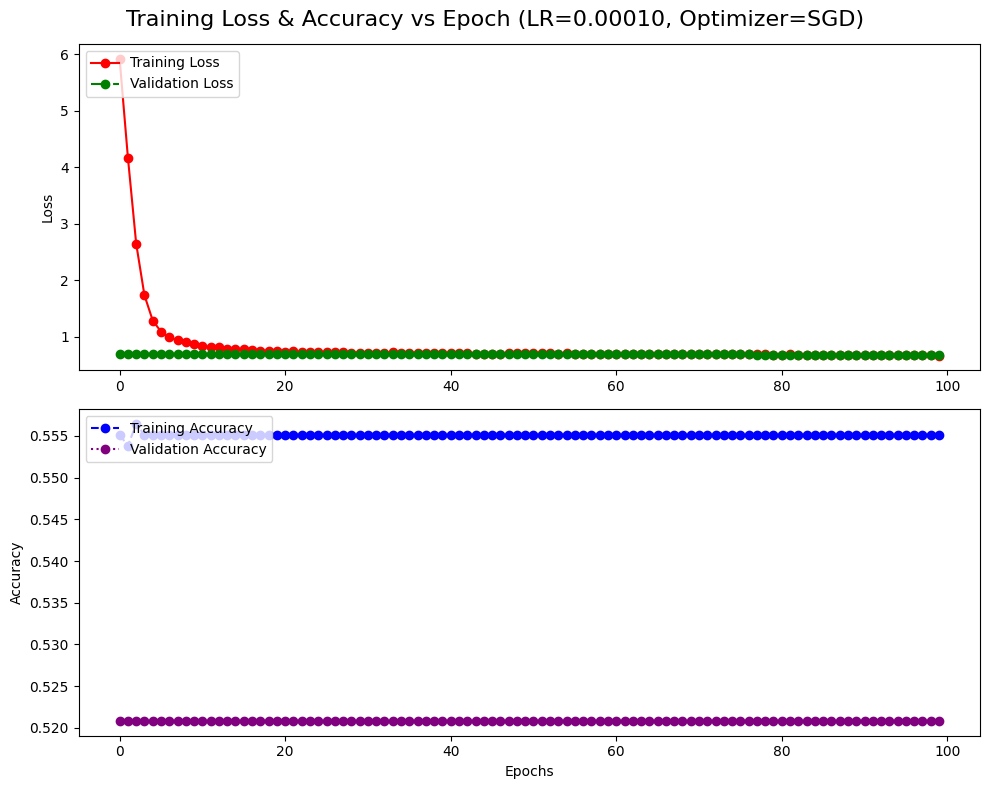

Entrenando con learning_rate=0.00010, epochs=100, optimizer=Adam


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/25 [00:00<?, ?batch/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 Training Accuracy = 0.6173800259403373
Epoch 1 Training Loss = 4.35905921722046
Epoch 1 Validation Accuracy = 0.671875
Epoch 1 Validation Loss = 0.5869840284188589
La mejor precisión de Validation Loss (0.5869840284188589) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 2 Training Accuracy = 0.8482490272373541
Epoch 2 Training Loss = 1.3280344116471312
Epoch 2 Validation Accuracy = 0.796875
Epoch 2 Validation Loss = 0.4746144513289134
La mejor precisión de Validation Loss (0.4746144513289134) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 3 Training Accuracy = 0.9507133592736705
Epoch 3 Training Loss = 0.29773793826616535
Epoch 3 Validation Accuracy = 0.859375
Epoch 3 Validation Loss = 0.6897460520267487
La mejor precisión de Validation Loss (0.4746144513289134) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 4 Training Accuracy = 0.953307392996109
Epoch 4 Training Loss = 0.23372151093356958
Epoch 4 Validation Accuracy = 0.8385416666666666
Epoch 4 Validation Loss = 0.39458270370960236
La mejor precisión de Validation Loss (0.39458270370960236) se alcanzó en la época 4


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 5 Training Accuracy = 0.9688715953307393
Epoch 5 Training Loss = 0.1429243544183053
Epoch 5 Validation Accuracy = 0.859375
Epoch 5 Validation Loss = 0.432598943511645
La mejor precisión de Validation Loss (0.39458270370960236) se alcanzó en la época 4


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 6 Training Accuracy = 0.9688715953307393
Epoch 6 Training Loss = 0.1613401260985552
Epoch 6 Validation Accuracy = 0.8854166666666666
Epoch 6 Validation Loss = 0.3493654007713
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 7 Training Accuracy = 0.9870298313878081
Epoch 7 Training Loss = 0.05741149128140488
Epoch 7 Validation Accuracy = 0.84375
Epoch 7 Validation Loss = 0.4820034975806872
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 8 Training Accuracy = 0.9922178988326849
Epoch 8 Training Loss = 0.05573610577311961
Epoch 8 Validation Accuracy = 0.8697916666666666
Epoch 8 Validation Loss = 0.5039801374077797
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 9 Training Accuracy = 1.0
Epoch 9 Training Loss = 0.020725027422043803
Epoch 9 Validation Accuracy = 0.8645833333333334
Epoch 9 Validation Loss = 0.5789664313197136
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 10 Training Accuracy = 0.9961089494163424
Epoch 10 Training Loss = 0.05111878339549099
Epoch 10 Validation Accuracy = 0.8802083333333334
Epoch 10 Validation Loss = 0.5030537123481432
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 11 Training Accuracy = 0.9961089494163424
Epoch 11 Training Loss = 0.022140926738232182
Epoch 11 Validation Accuracy = 0.8697916666666666
Epoch 11 Validation Loss = 0.4816106930375099
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 12 Training Accuracy = 0.9948119325551232
Epoch 12 Training Loss = 0.03574590203285836
Epoch 12 Validation Accuracy = 0.8229166666666666
Epoch 12 Validation Loss = 0.5893723120292028
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 13 Training Accuracy = 0.9286640726329443
Epoch 13 Training Loss = 0.5453469516025752
Epoch 13 Validation Accuracy = 0.7916666666666666
Epoch 13 Validation Loss = 0.512292688091596
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 14 Training Accuracy = 0.9714656290531777
Epoch 14 Training Loss = 0.13748661458284514
Epoch 14 Validation Accuracy = 0.859375
Epoch 14 Validation Loss = 0.4362331380446752
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 15 Training Accuracy = 0.9844357976653697
Epoch 15 Training Loss = 0.06912982290738713
Epoch 15 Validation Accuracy = 0.8697916666666666
Epoch 15 Validation Loss = 0.41123057280977565
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 16 Training Accuracy = 0.9896238651102465
Epoch 16 Training Loss = 0.06454415723981019
Epoch 16 Validation Accuracy = 0.8541666666666666
Epoch 16 Validation Loss = 0.5241638024648031
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 17 Training Accuracy = 0.9974059662775616
Epoch 17 Training Loss = 0.039719693546319906
Epoch 17 Validation Accuracy = 0.859375
Epoch 17 Validation Loss = 0.37439870834350586
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 18 Training Accuracy = 0.9740596627756161
Epoch 18 Training Loss = 0.18985561795059192
Epoch 18 Validation Accuracy = 0.8385416666666666
Epoch 18 Validation Loss = 0.5444730867942175
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 19 Training Accuracy = 0.9909208819714657
Epoch 19 Training Loss = 0.07240228986261285
Epoch 19 Validation Accuracy = 0.859375
Epoch 19 Validation Loss = 0.45479372640450794
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 20 Training Accuracy = 0.9948119325551232
Epoch 20 Training Loss = 0.05249043515896674
Epoch 20 Validation Accuracy = 0.8385416666666666
Epoch 20 Validation Loss = 0.5869714518388113
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 21 Training Accuracy = 0.9974059662775616
Epoch 21 Training Loss = 0.03860538573657801
Epoch 21 Validation Accuracy = 0.8333333333333334
Epoch 21 Validation Loss = 0.6706492205460867
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 22 Training Accuracy = 0.9636835278858625
Epoch 22 Training Loss = 0.2608714001651868
Epoch 22 Validation Accuracy = 0.828125
Epoch 22 Validation Loss = 0.35804178565740585
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 23 Training Accuracy = 0.9546044098573282
Epoch 23 Training Loss = 0.30869279156805013
Epoch 23 Validation Accuracy = 0.8645833333333334
Epoch 23 Validation Loss = 0.3735463892420133
La mejor precisión de Validation Loss (0.3493654007713) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 24 Training Accuracy = 0.9909208819714657
Epoch 24 Training Loss = 0.07451802495342767
Epoch 24 Validation Accuracy = 0.90625
Epoch 24 Validation Loss = 0.31812193679312867
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 25 Training Accuracy = 0.9974059662775616
Epoch 25 Training Loss = 0.019259869709433372
Epoch 25 Validation Accuracy = 0.8854166666666666
Epoch 25 Validation Loss = 0.40645874043305713
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 26 Training Accuracy = 0.9987029831387808
Epoch 26 Training Loss = 0.015272681375460556
Epoch 26 Validation Accuracy = 0.875
Epoch 26 Validation Loss = 0.47393982236584026
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 27 Training Accuracy = 0.9753566796368353
Epoch 27 Training Loss = 0.14321016405265774
Epoch 27 Validation Accuracy = 0.8489583333333334
Epoch 27 Validation Loss = 0.43596790730953217
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 28 Training Accuracy = 0.9883268482490273
Epoch 28 Training Loss = 0.07010259120404991
Epoch 28 Validation Accuracy = 0.84375
Epoch 28 Validation Loss = 0.47563882172107697
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 29 Training Accuracy = 0.9974059662775616
Epoch 29 Training Loss = 0.022646636224983578
Epoch 29 Validation Accuracy = 0.8385416666666666
Epoch 29 Validation Loss = 0.5799891004959742
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 30 Training Accuracy = 0.9961089494163424
Epoch 30 Training Loss = 0.015617973206204817
Epoch 30 Validation Accuracy = 0.8489583333333334
Epoch 30 Validation Loss = 0.5155444989601771
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 31 Training Accuracy = 0.9974059662775616
Epoch 31 Training Loss = 0.013246119162490551
Epoch 31 Validation Accuracy = 0.828125
Epoch 31 Validation Loss = 0.6952212750911713
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 32 Training Accuracy = 0.9662775616083009
Epoch 32 Training Loss = 0.15477421866722607
Epoch 32 Validation Accuracy = 0.8072916666666666
Epoch 32 Validation Loss = 0.567265880604585
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 33 Training Accuracy = 0.9857328145265889
Epoch 33 Training Loss = 0.07530933460063662
Epoch 33 Validation Accuracy = 0.84375
Epoch 33 Validation Loss = 0.584732343753179
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 34 Training Accuracy = 0.9792477302204928
Epoch 34 Training Loss = 0.1320684495993229
Epoch 34 Validation Accuracy = 0.8125
Epoch 34 Validation Loss = 0.730344315369924
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 35 Training Accuracy = 0.9883268482490273
Epoch 35 Training Loss = 0.06960871838028368
Epoch 35 Validation Accuracy = 0.875
Epoch 35 Validation Loss = 0.6962719534834226
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 36 Training Accuracy = 0.9948119325551232
Epoch 36 Training Loss = 0.0259893202934361
Epoch 36 Validation Accuracy = 0.84375
Epoch 36 Validation Loss = 0.6175318211317062
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 37 Training Accuracy = 0.9987029831387808
Epoch 37 Training Loss = 0.010214898472784109
Epoch 37 Validation Accuracy = 0.8802083333333334
Epoch 37 Validation Loss = 0.6272413780291876
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 38 Training Accuracy = 1.0
Epoch 38 Training Loss = 0.003943140054243615
Epoch 38 Validation Accuracy = 0.8645833333333334
Epoch 38 Validation Loss = 0.7186418886606892
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 39 Training Accuracy = 1.0
Epoch 39 Training Loss = 0.002456760893566184
Epoch 39 Validation Accuracy = 0.8645833333333334
Epoch 39 Validation Loss = 0.7311181450883547
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 40 Training Accuracy = 1.0
Epoch 40 Training Loss = 0.0016178451595500584
Epoch 40 Validation Accuracy = 0.8645833333333334
Epoch 40 Validation Loss = 0.7805708944797516
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 41 Training Accuracy = 1.0
Epoch 41 Training Loss = 0.0026090785784915033
Epoch 41 Validation Accuracy = 0.84375
Epoch 41 Validation Loss = 0.8348336964845657
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 42 Training Accuracy = 1.0
Epoch 42 Training Loss = 0.0014878802412780225
Epoch 42 Validation Accuracy = 0.828125
Epoch 42 Validation Loss = 0.9228538821140925
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 43 Training Accuracy = 1.0
Epoch 43 Training Loss = 0.0012634131261244194
Epoch 43 Validation Accuracy = 0.84375
Epoch 43 Validation Loss = 0.8296318103869756
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 44 Training Accuracy = 1.0
Epoch 44 Training Loss = 0.0011091703771288603
Epoch 44 Validation Accuracy = 0.8541666666666666
Epoch 44 Validation Loss = 0.8209179391463598
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 45 Training Accuracy = 1.0
Epoch 45 Training Loss = 0.0010439181234083597
Epoch 45 Validation Accuracy = 0.8802083333333334
Epoch 45 Validation Loss = 0.7582718084255854
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 46 Training Accuracy = 0.9974059662775616
Epoch 46 Training Loss = 0.01911397306937072
Epoch 46 Validation Accuracy = 0.8177083333333334
Epoch 46 Validation Loss = 1.278306484222412
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 47 Training Accuracy = 0.9896238651102465
Epoch 47 Training Loss = 0.04320170349850961
Epoch 47 Validation Accuracy = 0.8854166666666666
Epoch 47 Validation Loss = 0.5477780898412069
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 48 Training Accuracy = 0.9883268482490273
Epoch 48 Training Loss = 0.06945455357451692
Epoch 48 Validation Accuracy = 0.84375
Epoch 48 Validation Loss = 0.7924472639958063
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 49 Training Accuracy = 0.9896238651102465
Epoch 49 Training Loss = 0.06413152405144176
Epoch 49 Validation Accuracy = 0.8229166666666666
Epoch 49 Validation Loss = 0.6356397445003191
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 50 Training Accuracy = 0.9961089494163424
Epoch 50 Training Loss = 0.010421027537663594
Epoch 50 Validation Accuracy = 0.8333333333333334
Epoch 50 Validation Loss = 0.6183084398508072
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 51 Training Accuracy = 1.0
Epoch 51 Training Loss = 0.0042740997896697636
Epoch 51 Validation Accuracy = 0.84375
Epoch 51 Validation Loss = 0.5567892615993818
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 52 Training Accuracy = 1.0
Epoch 52 Training Loss = 0.002795393468785533
Epoch 52 Validation Accuracy = 0.8645833333333334
Epoch 52 Validation Loss = 0.5578380847970644
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 53 Training Accuracy = 1.0
Epoch 53 Training Loss = 0.001244693015882203
Epoch 53 Validation Accuracy = 0.8697916666666666
Epoch 53 Validation Loss = 0.6053415934244791
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 54 Training Accuracy = 0.9987029831387808
Epoch 54 Training Loss = 0.020353599615762285
Epoch 54 Validation Accuracy = 0.8541666666666666
Epoch 54 Validation Loss = 0.6203215221563975
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 55 Training Accuracy = 0.9442282749675746
Epoch 55 Training Loss = 0.3392109696097411
Epoch 55 Validation Accuracy = 0.7760416666666666
Epoch 55 Validation Loss = 0.5065750082333883
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 56 Training Accuracy = 0.980544747081712
Epoch 56 Training Loss = 0.12929856286646288
Epoch 56 Validation Accuracy = 0.84375
Epoch 56 Validation Loss = 0.5139405181010565
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 57 Training Accuracy = 0.9896238651102465
Epoch 57 Training Loss = 0.06212263986294372
Epoch 57 Validation Accuracy = 0.875
Epoch 57 Validation Loss = 0.501066709558169
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 58 Training Accuracy = 0.9390402075226978
Epoch 58 Training Loss = 0.3503556845349715
Epoch 58 Validation Accuracy = 0.8333333333333334
Epoch 58 Validation Loss = 0.5847055017948151
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 59 Training Accuracy = 0.9857328145265889
Epoch 59 Training Loss = 0.09474895451937823
Epoch 59 Validation Accuracy = 0.859375
Epoch 59 Validation Loss = 0.4891737376650174
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 60 Training Accuracy = 0.9844357976653697
Epoch 60 Training Loss = 0.09480008991121408
Epoch 60 Validation Accuracy = 0.8541666666666666
Epoch 60 Validation Loss = 0.5348295966784159
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 61 Training Accuracy = 0.9961089494163424
Epoch 61 Training Loss = 0.04101205891633621
Epoch 61 Validation Accuracy = 0.8802083333333334
Epoch 61 Validation Loss = 0.38714658468961716
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 62 Training Accuracy = 0.9987029831387808
Epoch 62 Training Loss = 0.010959349163166512
Epoch 62 Validation Accuracy = 0.875
Epoch 62 Validation Loss = 0.44061284015576047
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 63 Training Accuracy = 1.0
Epoch 63 Training Loss = 0.004317336761659608
Epoch 63 Validation Accuracy = 0.8958333333333334
Epoch 63 Validation Loss = 0.4743027662237485
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 64 Training Accuracy = 1.0
Epoch 64 Training Loss = 0.003708332236469681
Epoch 64 Validation Accuracy = 0.890625
Epoch 64 Validation Loss = 0.5260441526770592
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 65 Training Accuracy = 1.0
Epoch 65 Training Loss = 0.001736634558286571
Epoch 65 Validation Accuracy = 0.875
Epoch 65 Validation Loss = 0.567366092155377
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 66 Training Accuracy = 0.9987029831387808
Epoch 66 Training Loss = 0.006407695981865959
Epoch 66 Validation Accuracy = 0.8645833333333334
Epoch 66 Validation Loss = 0.64594666659832
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 67 Training Accuracy = 0.9870298313878081
Epoch 67 Training Loss = 0.059569509294072474
Epoch 67 Validation Accuracy = 0.7916666666666666
Epoch 67 Validation Loss = 0.7552753786245981
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 68 Training Accuracy = 0.9247730220492867
Epoch 68 Training Loss = 0.38172463674566937
Epoch 68 Validation Accuracy = 0.7604166666666666
Epoch 68 Validation Loss = 0.4915124773979187
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 69 Training Accuracy = 0.980544747081712
Epoch 69 Training Loss = 0.09070192027146096
Epoch 69 Validation Accuracy = 0.859375
Epoch 69 Validation Loss = 0.41708505153656006
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 70 Training Accuracy = 0.9974059662775616
Epoch 70 Training Loss = 0.026445568438943103
Epoch 70 Validation Accuracy = 0.875
Epoch 70 Validation Loss = 0.5566579947868983
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 71 Training Accuracy = 0.9792477302204928
Epoch 71 Training Loss = 0.09327912344156382
Epoch 71 Validation Accuracy = 0.8020833333333334
Epoch 71 Validation Loss = 0.5002321849266688
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 72 Training Accuracy = 0.9961089494163424
Epoch 72 Training Loss = 0.04120493230341068
Epoch 72 Validation Accuracy = 0.859375
Epoch 72 Validation Loss = 0.45556169996658963
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 73 Training Accuracy = 0.9974059662775616
Epoch 73 Training Loss = 0.017770517284072328
Epoch 73 Validation Accuracy = 0.8541666666666666
Epoch 73 Validation Loss = 0.550344318151474
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 74 Training Accuracy = 0.980544747081712
Epoch 74 Training Loss = 0.07117215666229004
Epoch 74 Validation Accuracy = 0.859375
Epoch 74 Validation Loss = 0.6794859121243159
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 75 Training Accuracy = 0.9948119325551232
Epoch 75 Training Loss = 0.01969796700352361
Epoch 75 Validation Accuracy = 0.8489583333333334
Epoch 75 Validation Loss = 0.6710930665334066
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 76 Training Accuracy = 0.993514915693904
Epoch 76 Training Loss = 0.038476045541803505
Epoch 76 Validation Accuracy = 0.8645833333333334
Epoch 76 Validation Loss = 0.7272744135310253
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 77 Training Accuracy = 0.9857328145265889
Epoch 77 Training Loss = 0.05666413164218035
Epoch 77 Validation Accuracy = 0.8489583333333334
Epoch 77 Validation Loss = 0.9857834155360857
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 78 Training Accuracy = 0.9948119325551232
Epoch 78 Training Loss = 0.01796000396009008
Epoch 78 Validation Accuracy = 0.84375
Epoch 78 Validation Loss = 0.8535635521014532
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 79 Training Accuracy = 0.9974059662775616
Epoch 79 Training Loss = 0.011063565178088791
Epoch 79 Validation Accuracy = 0.8958333333333334
Epoch 79 Validation Loss = 0.53044393658638
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 80 Training Accuracy = 1.0
Epoch 80 Training Loss = 0.00439166180045379
Epoch 80 Validation Accuracy = 0.8854166666666666
Epoch 80 Validation Loss = 0.6117020746072134
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 81 Training Accuracy = 0.9974059662775616
Epoch 81 Training Loss = 0.010138999977560978
Epoch 81 Validation Accuracy = 0.890625
Epoch 81 Validation Loss = 0.6147915932039419
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 82 Training Accuracy = 1.0
Epoch 82 Training Loss = 0.0015536761313363374
Epoch 82 Validation Accuracy = 0.890625
Epoch 82 Validation Loss = 0.6069162711501122
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 83 Training Accuracy = 0.9974059662775616
Epoch 83 Training Loss = 0.04750065912459959
Epoch 83 Validation Accuracy = 0.875
Epoch 83 Validation Loss = 0.7112281620502472
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 84 Training Accuracy = 0.9961089494163424
Epoch 84 Training Loss = 0.03719729497236346
Epoch 84 Validation Accuracy = 0.8385416666666666
Epoch 84 Validation Loss = 0.4474546213944753
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 85 Training Accuracy = 0.9961089494163424
Epoch 85 Training Loss = 0.025519237555225227
Epoch 85 Validation Accuracy = 0.8697916666666666
Epoch 85 Validation Loss = 0.45332928250233334
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 86 Training Accuracy = 0.9987029831387808
Epoch 86 Training Loss = 0.008378605941134166
Epoch 86 Validation Accuracy = 0.84375
Epoch 86 Validation Loss = 0.5408081238468488
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 87 Training Accuracy = 1.0
Epoch 87 Training Loss = 0.002699019464974602
Epoch 87 Validation Accuracy = 0.84375
Epoch 87 Validation Loss = 0.5759800324837366
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 88 Training Accuracy = 1.0
Epoch 88 Training Loss = 0.0022806391215384318
Epoch 88 Validation Accuracy = 0.8645833333333334
Epoch 88 Validation Loss = 0.6045489956935247
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 89 Training Accuracy = 0.9987029831387808
Epoch 89 Training Loss = 0.029082168326091055
Epoch 89 Validation Accuracy = 0.8541666666666666
Epoch 89 Validation Loss = 0.7153483331203461
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 90 Training Accuracy = 0.9584954604409858
Epoch 90 Training Loss = 0.1871927788773438
Epoch 90 Validation Accuracy = 0.8072916666666666
Epoch 90 Validation Loss = 0.5059132104118665
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 91 Training Accuracy = 0.9909208819714657
Epoch 91 Training Loss = 0.06037865961804
Epoch 91 Validation Accuracy = 0.84375
Epoch 91 Validation Loss = 0.5314371610681216
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 92 Training Accuracy = 0.9987029831387808
Epoch 92 Training Loss = 0.011807113743342468
Epoch 92 Validation Accuracy = 0.8645833333333334
Epoch 92 Validation Loss = 0.5794758796691895
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 93 Training Accuracy = 1.0
Epoch 93 Training Loss = 0.003893610103304671
Epoch 93 Validation Accuracy = 0.8645833333333334
Epoch 93 Validation Loss = 0.6001807351907095
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 94 Training Accuracy = 1.0
Epoch 94 Training Loss = 0.00529896239140077
Epoch 94 Validation Accuracy = 0.8802083333333334
Epoch 94 Validation Loss = 0.6104148649610579
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 95 Training Accuracy = 1.0
Epoch 95 Training Loss = 0.003812608815217451
Epoch 95 Validation Accuracy = 0.859375
Epoch 95 Validation Loss = 0.7645928412675858
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 96 Training Accuracy = 0.9987029831387808
Epoch 96 Training Loss = 0.005812930545966526
Epoch 96 Validation Accuracy = 0.828125
Epoch 96 Validation Loss = 0.9114320874214172
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 97 Training Accuracy = 0.9416342412451362
Epoch 97 Training Loss = 0.3037014155420348
Epoch 97 Validation Accuracy = 0.796875
Epoch 97 Validation Loss = 0.6879922946294149
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 98 Training Accuracy = 0.9779507133592736
Epoch 98 Training Loss = 0.10167518729674986
Epoch 98 Validation Accuracy = 0.84375
Epoch 98 Validation Loss = 0.5805031682054201
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 99 Training Accuracy = 0.993514915693904
Epoch 99 Training Loss = 0.037969658694842444
Epoch 99 Validation Accuracy = 0.8645833333333334
Epoch 99 Validation Loss = 0.6168775707483292
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 100 Training Accuracy = 0.9831387808041504
Epoch 100 Training Loss = 0.08482715698145088
Epoch 100 Validation Accuracy = 0.828125
Epoch 100 Validation Loss = 0.6670872867107391
La mejor precisión de Validation Loss (0.31812193679312867) se alcanzó en la época 24


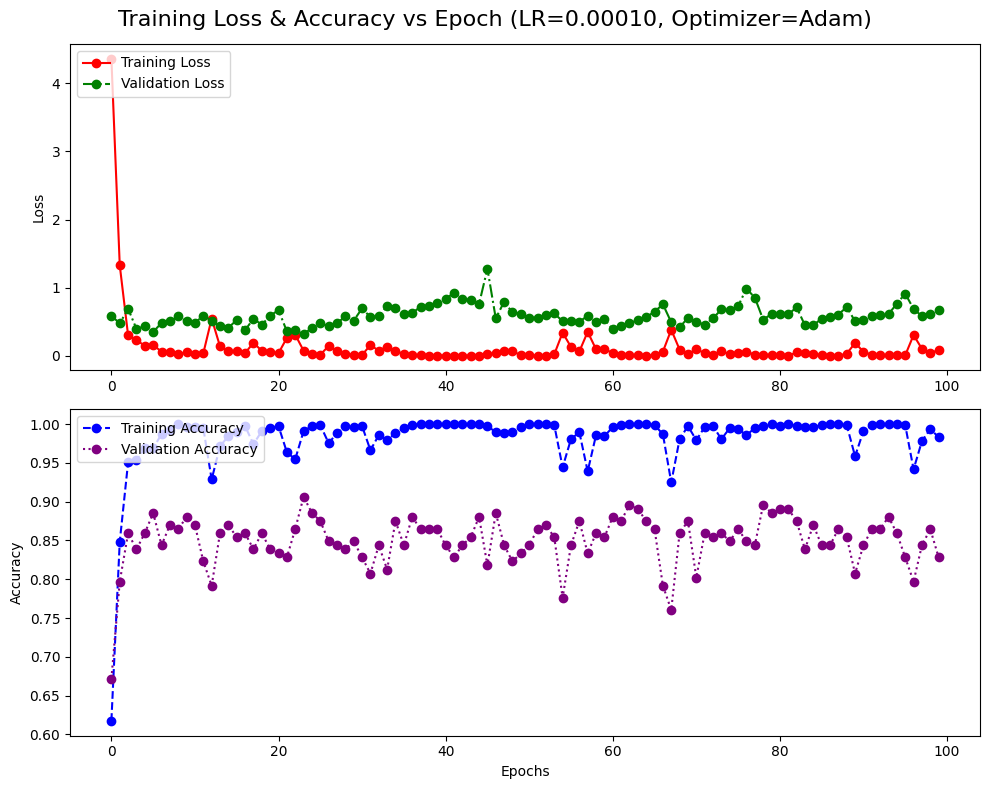

Entrenando con learning_rate=0.00010, epochs=100, optimizer=RMSprop


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/25 [00:00<?, ?batch/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 Training Accuracy = 0.6861219195849546
Epoch 1 Training Loss = 2.6379892308115185
Epoch 1 Validation Accuracy = 0.65625
Epoch 1 Validation Loss = 0.6231788893540701
La mejor precisión de Validation Loss (0.6231788893540701) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 2 Training Accuracy = 0.8534370946822308
Epoch 2 Training Loss = 0.7350468663390045
Epoch 2 Validation Accuracy = 0.6510416666666666
Epoch 2 Validation Loss = 1.1585666437943776
La mejor precisión de Validation Loss (0.6231788893540701) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 3 Training Accuracy = 0.9027237354085603
Epoch 3 Training Loss = 0.46553480826153987
Epoch 3 Validation Accuracy = 0.609375
Epoch 3 Validation Loss = 2.1077443758646646
La mejor precisión de Validation Loss (0.6231788893540701) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 4 Training Accuracy = 0.9546044098573282
Epoch 4 Training Loss = 0.28883508501523664
Epoch 4 Validation Accuracy = 0.8333333333333334
Epoch 4 Validation Loss = 0.5063153803348541
La mejor precisión de Validation Loss (0.5063153803348541) se alcanzó en la época 4


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 5 Training Accuracy = 0.9779507133592736
Epoch 5 Training Loss = 0.09263097142363413
Epoch 5 Validation Accuracy = 0.8802083333333334
Epoch 5 Validation Loss = 0.48035794248183566
La mejor precisión de Validation Loss (0.48035794248183566) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 6 Training Accuracy = 0.9961089494163424
Epoch 6 Training Loss = 0.028028017177515883
Epoch 6 Validation Accuracy = 0.8645833333333334
Epoch 6 Validation Loss = 0.577981053541104
La mejor precisión de Validation Loss (0.48035794248183566) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 7 Training Accuracy = 0.9883268482490273
Epoch 7 Training Loss = 0.07773109362128489
Epoch 7 Validation Accuracy = 0.6666666666666666
Epoch 7 Validation Loss = 1.111621101697286
La mejor precisión de Validation Loss (0.48035794248183566) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 8 Training Accuracy = 0.9623865110246433
Epoch 8 Training Loss = 0.22492715101761576
Epoch 8 Validation Accuracy = 0.6875
Epoch 8 Validation Loss = 1.049134264389674
La mejor precisión de Validation Loss (0.48035794248183566) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 9 Training Accuracy = 0.9753566796368353
Epoch 9 Training Loss = 0.1250015068146969
Epoch 9 Validation Accuracy = 0.5833333333333334
Epoch 9 Validation Loss = 2.6914000709851584
La mejor precisión de Validation Loss (0.48035794248183566) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 10 Training Accuracy = 0.9727626459143969
Epoch 10 Training Loss = 0.264094349994637
Epoch 10 Validation Accuracy = 0.8802083333333334
Epoch 10 Validation Loss = 0.5105119744936625
La mejor precisión de Validation Loss (0.48035794248183566) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 11 Training Accuracy = 0.9792477302204928
Epoch 11 Training Loss = 0.09540546145265978
Epoch 11 Validation Accuracy = 0.6041666666666666
Epoch 11 Validation Loss = 4.243203242619832
La mejor precisión de Validation Loss (0.48035794248183566) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 12 Training Accuracy = 0.9507133592736705
Epoch 12 Training Loss = 0.3029927913046378
Epoch 12 Validation Accuracy = 0.84375
Epoch 12 Validation Loss = 0.4016336103280385
La mejor precisión de Validation Loss (0.4016336103280385) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 13 Training Accuracy = 0.9948119325551232
Epoch 13 Training Loss = 0.040981917201158444
Epoch 13 Validation Accuracy = 0.7291666666666666
Epoch 13 Validation Loss = 1.521375258763631
La mejor precisión de Validation Loss (0.4016336103280385) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 14 Training Accuracy = 0.9520103761348897
Epoch 14 Training Loss = 0.20829729449810838
Epoch 14 Validation Accuracy = 0.8333333333333334
Epoch 14 Validation Loss = 0.6480727642774582
La mejor precisión de Validation Loss (0.4016336103280385) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 15 Training Accuracy = 0.9909208819714657
Epoch 15 Training Loss = 0.04877350265800412
Epoch 15 Validation Accuracy = 0.6041666666666666
Epoch 15 Validation Loss = 2.5570653279622397
La mejor precisión de Validation Loss (0.4016336103280385) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 16 Training Accuracy = 0.9779507133592736
Epoch 16 Training Loss = 0.18811091227908697
Epoch 16 Validation Accuracy = 0.6041666666666666
Epoch 16 Validation Loss = 2.0193769137064614
La mejor precisión de Validation Loss (0.4016336103280385) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 17 Training Accuracy = 0.9792477302204928
Epoch 17 Training Loss = 0.10396697224708498
Epoch 17 Validation Accuracy = 0.8645833333333334
Epoch 17 Validation Loss = 0.38245950639247894
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 18 Training Accuracy = 0.9961089494163424
Epoch 18 Training Loss = 0.024875961195788648
Epoch 18 Validation Accuracy = 0.6614583333333334
Epoch 18 Validation Loss = 1.1328804691632588
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 19 Training Accuracy = 0.9701686121919585
Epoch 19 Training Loss = 0.19253769644503463
Epoch 19 Validation Accuracy = 0.6770833333333334
Epoch 19 Validation Loss = 1.558826078971227
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 20 Training Accuracy = 0.980544747081712
Epoch 20 Training Loss = 0.1430517712272172
Epoch 20 Validation Accuracy = 0.8385416666666666
Epoch 20 Validation Loss = 0.5023911645015081
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 21 Training Accuracy = 0.9961089494163424
Epoch 21 Training Loss = 0.025506151737868736
Epoch 21 Validation Accuracy = 0.828125
Epoch 21 Validation Loss = 0.47005295753479004
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 22 Training Accuracy = 1.0
Epoch 22 Training Loss = 0.006790093761182061
Epoch 22 Validation Accuracy = 0.84375
Epoch 22 Validation Loss = 0.5087088892857233
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 23 Training Accuracy = 0.9961089494163424
Epoch 23 Training Loss = 0.02958927550455785
Epoch 23 Validation Accuracy = 0.84375
Epoch 23 Validation Loss = 0.4386099725961685
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 24 Training Accuracy = 0.993514915693904
Epoch 24 Training Loss = 0.046709974573009516
Epoch 24 Validation Accuracy = 0.859375
Epoch 24 Validation Loss = 0.5412353873252869
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 25 Training Accuracy = 0.993514915693904
Epoch 25 Training Loss = 0.029860544350631197
Epoch 25 Validation Accuracy = 0.8333333333333334
Epoch 25 Validation Loss = 0.5701857258876165
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 26 Training Accuracy = 0.9948119325551232
Epoch 26 Training Loss = 0.030885936081138876
Epoch 26 Validation Accuracy = 0.5416666666666666
Epoch 26 Validation Loss = 4.625860412915547
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 27 Training Accuracy = 0.9546044098573282
Epoch 27 Training Loss = 0.2813312928983519
Epoch 27 Validation Accuracy = 0.8177083333333334
Epoch 27 Validation Loss = 0.6118072867393494
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 28 Training Accuracy = 0.9974059662775616
Epoch 28 Training Loss = 0.01743578017253221
Epoch 28 Validation Accuracy = 0.8541666666666666
Epoch 28 Validation Loss = 0.5082327475150427
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 29 Training Accuracy = 0.9987029831387808
Epoch 29 Training Loss = 0.016426025775059496
Epoch 29 Validation Accuracy = 0.84375
Epoch 29 Validation Loss = 0.6341447532176971
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 30 Training Accuracy = 1.0
Epoch 30 Training Loss = 0.004231033981043904
Epoch 30 Validation Accuracy = 0.8333333333333334
Epoch 30 Validation Loss = 0.7870128254095713
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 31 Training Accuracy = 0.9961089494163424
Epoch 31 Training Loss = 0.03770264769130025
Epoch 31 Validation Accuracy = 0.8125
Epoch 31 Validation Loss = 1.0130647321542103
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 32 Training Accuracy = 0.9896238651102465
Epoch 32 Training Loss = 0.042522701375601976
Epoch 32 Validation Accuracy = 0.5364583333333334
Epoch 32 Validation Loss = 3.593310077985128
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 33 Training Accuracy = 0.9364461738002594
Epoch 33 Training Loss = 0.3168507090802323
Epoch 33 Validation Accuracy = 0.6510416666666666
Epoch 33 Validation Loss = 2.3886683583259583
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 34 Training Accuracy = 0.9623865110246433
Epoch 34 Training Loss = 0.2127418187573726
Epoch 34 Validation Accuracy = 0.828125
Epoch 34 Validation Loss = 0.5521931772430738
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 35 Training Accuracy = 0.9974059662775616
Epoch 35 Training Loss = 0.023546477120210223
Epoch 35 Validation Accuracy = 0.8177083333333334
Epoch 35 Validation Loss = 0.9232670565446218
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 36 Training Accuracy = 0.993514915693904
Epoch 36 Training Loss = 0.06202331647861522
Epoch 36 Validation Accuracy = 0.8697916666666666
Epoch 36 Validation Loss = 0.4439874291419983
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 37 Training Accuracy = 0.9948119325551232
Epoch 37 Training Loss = 0.04051644214937505
Epoch 37 Validation Accuracy = 0.75
Epoch 37 Validation Loss = 1.607587734858195
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 38 Training Accuracy = 0.9740596627756161
Epoch 38 Training Loss = 0.15164247792982405
Epoch 38 Validation Accuracy = 0.7604166666666666
Epoch 38 Validation Loss = 0.9156987766424814
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 39 Training Accuracy = 0.9701686121919585
Epoch 39 Training Loss = 0.14857250967470087
Epoch 39 Validation Accuracy = 0.828125
Epoch 39 Validation Loss = 0.5659371465444565
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 40 Training Accuracy = 0.9974059662775616
Epoch 40 Training Loss = 0.02280370323603487
Epoch 40 Validation Accuracy = 0.828125
Epoch 40 Validation Loss = 0.6093722482522329
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 41 Training Accuracy = 0.9948119325551232
Epoch 41 Training Loss = 0.03320250744253745
Epoch 41 Validation Accuracy = 0.7395833333333334
Epoch 41 Validation Loss = 0.8286231259504954
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 42 Training Accuracy = 0.993514915693904
Epoch 42 Training Loss = 0.07742556744199561
Epoch 42 Validation Accuracy = 0.8333333333333334
Epoch 42 Validation Loss = 0.6175152262051901
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 43 Training Accuracy = 1.0
Epoch 43 Training Loss = 0.006647597313478067
Epoch 43 Validation Accuracy = 0.84375
Epoch 43 Validation Loss = 0.6235689967870712
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 44 Training Accuracy = 1.0
Epoch 44 Training Loss = 0.0038054192136132417
Epoch 44 Validation Accuracy = 0.8385416666666666
Epoch 44 Validation Loss = 0.7856337527434031
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 45 Training Accuracy = 0.9974059662775616
Epoch 45 Training Loss = 0.027910412087476053
Epoch 45 Validation Accuracy = 0.5208333333333334
Epoch 45 Validation Loss = 7.050466537475586
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 46 Training Accuracy = 0.9779507133592736
Epoch 46 Training Loss = 0.1492108558093218
Epoch 46 Validation Accuracy = 0.6927083333333334
Epoch 46 Validation Loss = 1.158975879351298
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 47 Training Accuracy = 0.9740596627756161
Epoch 47 Training Loss = 0.1403463340029797
Epoch 47 Validation Accuracy = 0.8177083333333334
Epoch 47 Validation Loss = 0.6597776959339777
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 48 Training Accuracy = 0.9961089494163424
Epoch 48 Training Loss = 0.021737858111910938
Epoch 48 Validation Accuracy = 0.7708333333333334
Epoch 48 Validation Loss = 0.9118828177452087
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 49 Training Accuracy = 0.9870298313878081
Epoch 49 Training Loss = 0.047254225497506075
Epoch 49 Validation Accuracy = 0.8489583333333334
Epoch 49 Validation Loss = 0.6624810521801313
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 50 Training Accuracy = 1.0
Epoch 50 Training Loss = 0.004752932237787354
Epoch 50 Validation Accuracy = 0.8177083333333334
Epoch 50 Validation Loss = 0.7561842997868856
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 51 Training Accuracy = 1.0
Epoch 51 Training Loss = 0.002690465188308603
Epoch 51 Validation Accuracy = 0.8229166666666666
Epoch 51 Validation Loss = 0.7455030679702759
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 52 Training Accuracy = 1.0
Epoch 52 Training Loss = 0.0019300314923174603
Epoch 52 Validation Accuracy = 0.8385416666666666
Epoch 52 Validation Loss = 0.7854686776796976
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 53 Training Accuracy = 1.0
Epoch 53 Training Loss = 0.0018297452160251483
Epoch 53 Validation Accuracy = 0.8333333333333334
Epoch 53 Validation Loss = 0.9120434323946635
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 54 Training Accuracy = 0.9974059662775616
Epoch 54 Training Loss = 0.01878296871622481
Epoch 54 Validation Accuracy = 0.7604166666666666
Epoch 54 Validation Loss = 1.671154797077179
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 55 Training Accuracy = 0.9883268482490273
Epoch 55 Training Loss = 0.07552412722438535
Epoch 55 Validation Accuracy = 0.8385416666666666
Epoch 55 Validation Loss = 0.9206492304801941
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 56 Training Accuracy = 1.0
Epoch 56 Training Loss = 0.00489937903038824
Epoch 56 Validation Accuracy = 0.8541666666666666
Epoch 56 Validation Loss = 0.6889508167902628
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 57 Training Accuracy = 1.0
Epoch 57 Training Loss = 0.002029814763446417
Epoch 57 Validation Accuracy = 0.8020833333333334
Epoch 57 Validation Loss = 1.2736286719640095
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 58 Training Accuracy = 0.9974059662775616
Epoch 58 Training Loss = 0.02649740744792843
Epoch 58 Validation Accuracy = 0.6666666666666666
Epoch 58 Validation Loss = 3.793730537096659
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 59 Training Accuracy = 0.980544747081712
Epoch 59 Training Loss = 0.16626992406644864
Epoch 59 Validation Accuracy = 0.8385416666666666
Epoch 59 Validation Loss = 0.6059058308601379
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 60 Training Accuracy = 0.9961089494163424
Epoch 60 Training Loss = 0.022354169143998
Epoch 60 Validation Accuracy = 0.8229166666666666
Epoch 60 Validation Loss = 0.8917848070462545
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 61 Training Accuracy = 0.9974059662775616
Epoch 61 Training Loss = 0.0121940413054928
Epoch 61 Validation Accuracy = 0.8229166666666666
Epoch 61 Validation Loss = 0.7428316871325175
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 62 Training Accuracy = 1.0
Epoch 62 Training Loss = 0.0016377933616913015
Epoch 62 Validation Accuracy = 0.828125
Epoch 62 Validation Loss = 0.7448653901616732
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 63 Training Accuracy = 1.0
Epoch 63 Training Loss = 0.00202686139279747
Epoch 63 Validation Accuracy = 0.828125
Epoch 63 Validation Loss = 0.8506313363711039
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 64 Training Accuracy = 1.0
Epoch 64 Training Loss = 0.0016015985828580336
Epoch 64 Validation Accuracy = 0.8385416666666666
Epoch 64 Validation Loss = 0.927111824353536
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 65 Training Accuracy = 1.0
Epoch 65 Training Loss = 0.005856091380674977
Epoch 65 Validation Accuracy = 0.4895833333333333
Epoch 65 Validation Loss = 4.581843654314677
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 66 Training Accuracy = 0.9727626459143969
Epoch 66 Training Loss = 0.13229082716114327
Epoch 66 Validation Accuracy = 0.6145833333333334
Epoch 66 Validation Loss = 4.510840495427449
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 67 Training Accuracy = 0.9792477302204928
Epoch 67 Training Loss = 0.11070463920420401
Epoch 67 Validation Accuracy = 0.828125
Epoch 67 Validation Loss = 0.6310561150312424
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 68 Training Accuracy = 0.9961089494163424
Epoch 68 Training Loss = 0.016258647991525522
Epoch 68 Validation Accuracy = 0.8333333333333334
Epoch 68 Validation Loss = 1.0104144662618637
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 69 Training Accuracy = 0.9831387808041504
Epoch 69 Training Loss = 0.0864684030548917
Epoch 69 Validation Accuracy = 0.8489583333333334
Epoch 69 Validation Loss = 0.794993206858635
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 70 Training Accuracy = 0.9974059662775616
Epoch 70 Training Loss = 0.021457928708640595
Epoch 70 Validation Accuracy = 0.8020833333333334
Epoch 70 Validation Loss = 0.8652752737204233
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 71 Training Accuracy = 0.9922178988326849
Epoch 71 Training Loss = 0.05694276849158234
Epoch 71 Validation Accuracy = 0.734375
Epoch 71 Validation Loss = 0.5969221144914627
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 72 Training Accuracy = 0.9909208819714657
Epoch 72 Training Loss = 0.07717892969565904
Epoch 72 Validation Accuracy = 0.8697916666666666
Epoch 72 Validation Loss = 0.4331193243463834
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 73 Training Accuracy = 0.9987029831387808
Epoch 73 Training Loss = 0.011183091711810695
Epoch 73 Validation Accuracy = 0.875
Epoch 73 Validation Loss = 0.49935917866726715
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 74 Training Accuracy = 1.0
Epoch 74 Training Loss = 0.003930121280939044
Epoch 74 Validation Accuracy = 0.8229166666666666
Epoch 74 Validation Loss = 0.8052956064542135
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 75 Training Accuracy = 0.9883268482490273
Epoch 75 Training Loss = 0.056655155533463265
Epoch 75 Validation Accuracy = 0.7395833333333334
Epoch 75 Validation Loss = 1.3547576119502385
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 76 Training Accuracy = 0.9883268482490273
Epoch 76 Training Loss = 0.09295186817877951
Epoch 76 Validation Accuracy = 0.8802083333333334
Epoch 76 Validation Loss = 0.5281585777799288
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 77 Training Accuracy = 0.9961089494163424
Epoch 77 Training Loss = 0.03507898624227823
Epoch 77 Validation Accuracy = 0.828125
Epoch 77 Validation Loss = 0.8747663199901581
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 78 Training Accuracy = 0.9987029831387808
Epoch 78 Training Loss = 0.011640861272889198
Epoch 78 Validation Accuracy = 0.8958333333333334
Epoch 78 Validation Loss = 0.6107328180223703
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 79 Training Accuracy = 0.9987029831387808
Epoch 79 Training Loss = 0.00572148723776625
Epoch 79 Validation Accuracy = 0.8802083333333334
Epoch 79 Validation Loss = 0.7451403091351191
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 80 Training Accuracy = 1.0
Epoch 80 Training Loss = 0.003895521161147066
Epoch 80 Validation Accuracy = 0.890625
Epoch 80 Validation Loss = 0.7489008555809656
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 81 Training Accuracy = 1.0
Epoch 81 Training Loss = 0.0016454366843872033
Epoch 81 Validation Accuracy = 0.8541666666666666
Epoch 81 Validation Loss = 0.9374897802869478
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 82 Training Accuracy = 0.9922178988326849
Epoch 82 Training Loss = 0.04702209026628837
Epoch 82 Validation Accuracy = 0.7708333333333334
Epoch 82 Validation Loss = 1.3394070068995159
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 83 Training Accuracy = 0.9948119325551232
Epoch 83 Training Loss = 0.026931841238057568
Epoch 83 Validation Accuracy = 0.609375
Epoch 83 Validation Loss = 6.48753301302592
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 84 Training Accuracy = 0.9922178988326849
Epoch 84 Training Loss = 0.07143218320548361
Epoch 84 Validation Accuracy = 0.8385416666666666
Epoch 84 Validation Loss = 0.6290532921751341
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 85 Training Accuracy = 1.0
Epoch 85 Training Loss = 0.005903643753437564
Epoch 85 Validation Accuracy = 0.8541666666666666
Epoch 85 Validation Loss = 0.6167290558417639
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 86 Training Accuracy = 1.0
Epoch 86 Training Loss = 0.001951894783275987
Epoch 86 Validation Accuracy = 0.84375
Epoch 86 Validation Loss = 0.7803073624769846
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 87 Training Accuracy = 0.9987029831387808
Epoch 87 Training Loss = 0.006408868161852721
Epoch 87 Validation Accuracy = 0.7447916666666666
Epoch 87 Validation Loss = 2.498824735482534
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 88 Training Accuracy = 0.9740596627756161
Epoch 88 Training Loss = 0.22264595130934403
Epoch 88 Validation Accuracy = 0.84375
Epoch 88 Validation Loss = 0.6739358132084211
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 89 Training Accuracy = 1.0
Epoch 89 Training Loss = 0.0055272656132922485
Epoch 89 Validation Accuracy = 0.859375
Epoch 89 Validation Loss = 0.645905981461207
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 90 Training Accuracy = 0.9987029831387808
Epoch 90 Training Loss = 0.0038043003560716696
Epoch 90 Validation Accuracy = 0.6979166666666666
Epoch 90 Validation Loss = 2.6358516216278076
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 91 Training Accuracy = 0.9844357976653697
Epoch 91 Training Loss = 0.11792790721594591
Epoch 91 Validation Accuracy = 0.5989583333333334
Epoch 91 Validation Loss = 2.3590246637662253
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 92 Training Accuracy = 0.9922178988326849
Epoch 92 Training Loss = 0.09403897578382306
Epoch 92 Validation Accuracy = 0.71875
Epoch 92 Validation Loss = 1.0658372342586517
La mejor precisión de Validation Loss (0.38245950639247894) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 93 Training Accuracy = 0.9909208819714657
Epoch 93 Training Loss = 0.059819655609166134
Epoch 93 Validation Accuracy = 0.8645833333333334
Epoch 93 Validation Loss = 0.37290040651957196
La mejor precisión de Validation Loss (0.37290040651957196) se alcanzó en la época 93


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 94 Training Accuracy = 0.9987029831387808
Epoch 94 Training Loss = 0.00906533003970739
Epoch 94 Validation Accuracy = 0.8489583333333334
Epoch 94 Validation Loss = 0.5092555756370226
La mejor precisión de Validation Loss (0.37290040651957196) se alcanzó en la época 93


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 95 Training Accuracy = 0.9987029831387808
Epoch 95 Training Loss = 0.012024292427606774
Epoch 95 Validation Accuracy = 0.828125
Epoch 95 Validation Loss = 0.7908162325620651
La mejor precisión de Validation Loss (0.37290040651957196) se alcanzó en la época 93


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 96 Training Accuracy = 0.9922178988326849
Epoch 96 Training Loss = 0.031684442203816256
Epoch 96 Validation Accuracy = 0.8645833333333334
Epoch 96 Validation Loss = 0.4973822782437007
La mejor precisión de Validation Loss (0.37290040651957196) se alcanzó en la época 93


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 97 Training Accuracy = 0.9987029831387808
Epoch 97 Training Loss = 0.03668465270345545
Epoch 97 Validation Accuracy = 0.7916666666666666
Epoch 97 Validation Loss = 0.5494323993722597
La mejor precisión de Validation Loss (0.37290040651957196) se alcanzó en la época 93


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 98 Training Accuracy = 0.993514915693904
Epoch 98 Training Loss = 0.0971885327196616
Epoch 98 Validation Accuracy = 0.78125
Epoch 98 Validation Loss = 0.6544035524129868
La mejor precisión de Validation Loss (0.37290040651957196) se alcanzó en la época 93


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 99 Training Accuracy = 0.9961089494163424
Epoch 99 Training Loss = 0.051232161766205625
Epoch 99 Validation Accuracy = 0.7760416666666666
Epoch 99 Validation Loss = 0.979696199297905
La mejor precisión de Validation Loss (0.37290040651957196) se alcanzó en la época 93


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 100 Training Accuracy = 0.9909208819714657
Epoch 100 Training Loss = 0.08735357659558456
Epoch 100 Validation Accuracy = 0.8697916666666666
Epoch 100 Validation Loss = 0.4011712943514188
La mejor precisión de Validation Loss (0.37290040651957196) se alcanzó en la época 93


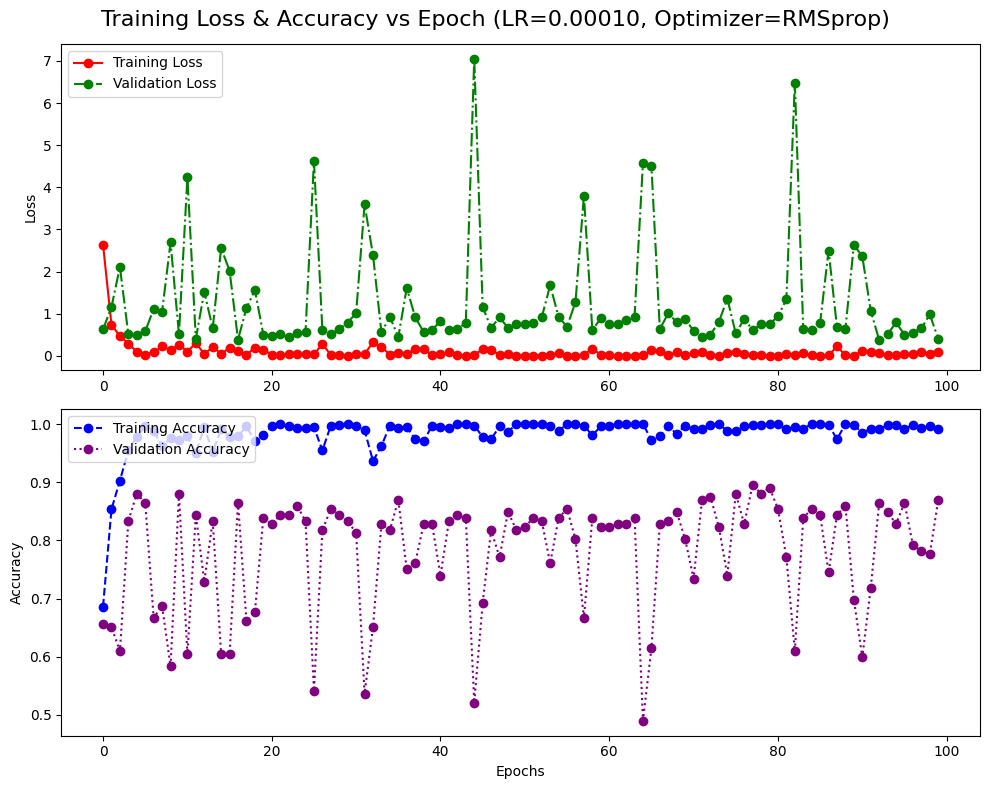

Entrenando con learning_rate=0.00100, epochs=100, optimizer=SGD


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/25 [00:00<?, ?batch/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 Training Accuracy = 0.5486381322957199
Epoch 1 Training Loss = 3.313272991378329
Epoch 1 Validation Accuracy = 0.5208333333333334
Epoch 1 Validation Loss = 0.6916837493578593
La mejor precisión de Validation Loss (0.6916837493578593) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 2 Training Accuracy = 0.5551232166018158
Epoch 2 Training Loss = 0.9549658187941664
Epoch 2 Validation Accuracy = 0.5208333333333334
Epoch 2 Validation Loss = 0.6910876929759979
La mejor precisión de Validation Loss (0.6910876929759979) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 3 Training Accuracy = 0.5551232166018158
Epoch 3 Training Loss = 0.8087269987732211
Epoch 3 Validation Accuracy = 0.5208333333333334
Epoch 3 Validation Loss = 0.6901856362819672
La mejor precisión de Validation Loss (0.6901856362819672) se alcanzó en la época 3


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 4 Training Accuracy = 0.5551232166018158
Epoch 4 Training Loss = 0.7744068207289304
Epoch 4 Validation Accuracy = 0.5208333333333334
Epoch 4 Validation Loss = 0.688915361960729
La mejor precisión de Validation Loss (0.688915361960729) se alcanzó en la época 4


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 5 Training Accuracy = 0.5551232166018158
Epoch 5 Training Loss = 0.7349175570385311
Epoch 5 Validation Accuracy = 0.5208333333333334
Epoch 5 Validation Loss = 0.6876265704631805
La mejor precisión de Validation Loss (0.6876265704631805) se alcanzó en la época 5


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 6 Training Accuracy = 0.5551232166018158
Epoch 6 Training Loss = 0.7057563143790774
Epoch 6 Validation Accuracy = 0.5208333333333334
Epoch 6 Validation Loss = 0.6856391827265421
La mejor precisión de Validation Loss (0.6856391827265421) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 7 Training Accuracy = 0.5551232166018158
Epoch 7 Training Loss = 0.7079678611532724
Epoch 7 Validation Accuracy = 0.5208333333333334
Epoch 7 Validation Loss = 0.6840008000532786
La mejor precisión de Validation Loss (0.6840008000532786) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 8 Training Accuracy = 0.5551232166018158
Epoch 8 Training Loss = 0.7375915355101015
Epoch 8 Validation Accuracy = 0.5208333333333334
Epoch 8 Validation Loss = 0.6826629738012949
La mejor precisión de Validation Loss (0.6826629738012949) se alcanzó en la época 8


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 9 Training Accuracy = 0.5551232166018158
Epoch 9 Training Loss = 0.6992032648524422
Epoch 9 Validation Accuracy = 0.5208333333333334
Epoch 9 Validation Loss = 0.6784180402755737
La mejor precisión de Validation Loss (0.6784180402755737) se alcanzó en la época 9


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 10 Training Accuracy = 0.5551232166018158
Epoch 10 Training Loss = 0.7392356120504139
Epoch 10 Validation Accuracy = 0.5208333333333334
Epoch 10 Validation Loss = 0.6766920785109202
La mejor precisión de Validation Loss (0.6766920785109202) se alcanzó en la época 10


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 11 Training Accuracy = 0.5551232166018158
Epoch 11 Training Loss = 0.7285638756943739
Epoch 11 Validation Accuracy = 0.5208333333333334
Epoch 11 Validation Loss = 0.6693861484527588
La mejor precisión de Validation Loss (0.6693861484527588) se alcanzó en la época 11


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 12 Training Accuracy = 0.5551232166018158
Epoch 12 Training Loss = 0.6780492421408726
Epoch 12 Validation Accuracy = 0.5208333333333334
Epoch 12 Validation Loss = 0.653811107079188
La mejor precisión de Validation Loss (0.653811107079188) se alcanzó en la época 12


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 13 Training Accuracy = 0.5551232166018158
Epoch 13 Training Loss = 0.6494967229326102
Epoch 13 Validation Accuracy = 0.5208333333333334
Epoch 13 Validation Loss = 0.6357458929220835
La mejor precisión de Validation Loss (0.6357458929220835) se alcanzó en la época 13


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 14 Training Accuracy = 0.5901426718547341
Epoch 14 Training Loss = 0.6679885910024285
Epoch 14 Validation Accuracy = 0.6927083333333334
Epoch 14 Validation Loss = 0.6100635429223379
La mejor precisión de Validation Loss (0.6100635429223379) se alcanzó en la época 14


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 15 Training Accuracy = 0.7276264591439688
Epoch 15 Training Loss = 0.5729788813145708
Epoch 15 Validation Accuracy = 0.71875
Epoch 15 Validation Loss = 0.5716150204340616
La mejor precisión de Validation Loss (0.5716150204340616) se alcanzó en la época 15


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 16 Training Accuracy = 0.8223086900129701
Epoch 16 Training Loss = 0.4803280470900035
Epoch 16 Validation Accuracy = 0.796875
Epoch 16 Validation Loss = 0.5140651166439056
La mejor precisión de Validation Loss (0.5140651166439056) se alcanzó en la época 16


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 17 Training Accuracy = 0.9299610894941635
Epoch 17 Training Loss = 0.3806152512668481
Epoch 17 Validation Accuracy = 0.8333333333333334
Epoch 17 Validation Loss = 0.45709041754404706
La mejor precisión de Validation Loss (0.45709041754404706) se alcanzó en la época 17


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 18 Training Accuracy = 0.9662775616083009
Epoch 18 Training Loss = 0.27465382933462024
Epoch 18 Validation Accuracy = 0.8385416666666666
Epoch 18 Validation Loss = 0.41655728220939636
La mejor precisión de Validation Loss (0.41655728220939636) se alcanzó en la época 18


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 19 Training Accuracy = 0.940337224383917
Epoch 19 Training Loss = 0.30109599522579505
Epoch 19 Validation Accuracy = 0.7916666666666666
Epoch 19 Validation Loss = 0.455307071407636
La mejor precisión de Validation Loss (0.41655728220939636) se alcanzó en la época 18


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 20 Training Accuracy = 0.9675745784695201
Epoch 20 Training Loss = 0.22675125268028248
Epoch 20 Validation Accuracy = 0.8489583333333334
Epoch 20 Validation Loss = 0.3487368126710256
La mejor precisión de Validation Loss (0.3487368126710256) se alcanzó en la época 20


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 21 Training Accuracy = 0.9818417639429312
Epoch 21 Training Loss = 0.12632544785158178
Epoch 21 Validation Accuracy = 0.8541666666666666
Epoch 21 Validation Loss = 0.3542456006010373
La mejor precisión de Validation Loss (0.3487368126710256) se alcanzó en la época 20


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 22 Training Accuracy = 0.9961089494163424
Epoch 22 Training Loss = 0.06558685049163383
Epoch 22 Validation Accuracy = 0.8541666666666666
Epoch 22 Validation Loss = 0.38905386130015057
La mejor precisión de Validation Loss (0.3487368126710256) se alcanzó en la época 20


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 23 Training Accuracy = 0.9818417639429312
Epoch 23 Training Loss = 0.09160488395530117
Epoch 23 Validation Accuracy = 0.8697916666666666
Epoch 23 Validation Loss = 0.33765673140684765
La mejor precisión de Validation Loss (0.33765673140684765) se alcanzó en la época 23


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 24 Training Accuracy = 0.9831387808041504
Epoch 24 Training Loss = 0.09174363301576498
Epoch 24 Validation Accuracy = 0.8645833333333334
Epoch 24 Validation Loss = 0.4007875124613444
La mejor precisión de Validation Loss (0.33765673140684765) se alcanzó en la época 23


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 25 Training Accuracy = 0.9948119325551232
Epoch 25 Training Loss = 0.03563707208818963
Epoch 25 Validation Accuracy = 0.8802083333333334
Epoch 25 Validation Loss = 0.4038739576935768
La mejor precisión de Validation Loss (0.33765673140684765) se alcanzó en la época 23


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 26 Training Accuracy = 0.9468223086900129
Epoch 26 Training Loss = 0.2779864508141649
Epoch 26 Validation Accuracy = 0.8385416666666666
Epoch 26 Validation Loss = 0.4272044201691945
La mejor precisión de Validation Loss (0.33765673140684765) se alcanzó en la época 23


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 27 Training Accuracy = 0.9766536964980544
Epoch 27 Training Loss = 0.10310327834733575
Epoch 27 Validation Accuracy = 0.8697916666666666
Epoch 27 Validation Loss = 0.3523450617988904
La mejor precisión de Validation Loss (0.33765673140684765) se alcanzó en la época 23


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 28 Training Accuracy = 0.9961089494163424
Epoch 28 Training Loss = 0.03675567363563988
Epoch 28 Validation Accuracy = 0.8802083333333334
Epoch 28 Validation Loss = 0.3165331209699313
La mejor precisión de Validation Loss (0.3165331209699313) se alcanzó en la época 28


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 29 Training Accuracy = 0.993514915693904
Epoch 29 Training Loss = 0.03415428119410801
Epoch 29 Validation Accuracy = 0.859375
Epoch 29 Validation Loss = 0.4047880657017231
La mejor precisión de Validation Loss (0.3165331209699313) se alcanzó en la época 28


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 30 Training Accuracy = 0.9896238651102465
Epoch 30 Training Loss = 0.050280221956558575
Epoch 30 Validation Accuracy = 0.8802083333333334
Epoch 30 Validation Loss = 0.42933261891206104
La mejor precisión de Validation Loss (0.3165331209699313) se alcanzó en la época 28


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 31 Training Accuracy = 0.9195849546044098
Epoch 31 Training Loss = 0.3329585140471947
Epoch 31 Validation Accuracy = 0.8489583333333334
Epoch 31 Validation Loss = 0.426575834552447
La mejor precisión de Validation Loss (0.3165331209699313) se alcanzó en la época 28


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 32 Training Accuracy = 0.9766536964980544
Epoch 32 Training Loss = 0.11448589482147793
Epoch 32 Validation Accuracy = 0.890625
Epoch 32 Validation Loss = 0.2438251997033755
La mejor precisión de Validation Loss (0.2438251997033755) se alcanzó en la época 32


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 33 Training Accuracy = 0.9909208819714657
Epoch 33 Training Loss = 0.03613071791143984
Epoch 33 Validation Accuracy = 0.90625
Epoch 33 Validation Loss = 0.21170872636139393
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 34 Training Accuracy = 0.9922178988326849
Epoch 34 Training Loss = 0.032912184678781514
Epoch 34 Validation Accuracy = 0.8697916666666666
Epoch 34 Validation Loss = 0.3302738269170125
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 35 Training Accuracy = 0.9948119325551232
Epoch 35 Training Loss = 0.03551835561927345
Epoch 35 Validation Accuracy = 0.84375
Epoch 35 Validation Loss = 0.4175242731968562
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 36 Training Accuracy = 0.9520103761348897
Epoch 36 Training Loss = 0.24242173187463664
Epoch 36 Validation Accuracy = 0.8125
Epoch 36 Validation Loss = 0.5168337970972061
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 37 Training Accuracy = 0.9831387808041504
Epoch 37 Training Loss = 0.08705177516634208
Epoch 37 Validation Accuracy = 0.8489583333333334
Epoch 37 Validation Loss = 0.48783919711907703
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 38 Training Accuracy = 0.9818417639429312
Epoch 38 Training Loss = 0.09714839971792219
Epoch 38 Validation Accuracy = 0.8802083333333334
Epoch 38 Validation Loss = 0.37005801498889923
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 39 Training Accuracy = 0.993514915693904
Epoch 39 Training Loss = 0.03213243246146136
Epoch 39 Validation Accuracy = 0.8802083333333334
Epoch 39 Validation Loss = 0.30868671958645183
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 40 Training Accuracy = 0.9987029831387808
Epoch 40 Training Loss = 0.012874259133901732
Epoch 40 Validation Accuracy = 0.875
Epoch 40 Validation Loss = 0.3353700463970502
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 41 Training Accuracy = 0.9896238651102465
Epoch 41 Training Loss = 0.07033424349996985
Epoch 41 Validation Accuracy = 0.8333333333333334
Epoch 41 Validation Loss = 0.5648332685232162
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 42 Training Accuracy = 0.9818417639429312
Epoch 42 Training Loss = 0.11292393673477083
Epoch 42 Validation Accuracy = 0.875
Epoch 42 Validation Loss = 0.28318939730525017
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 43 Training Accuracy = 0.9922178988326849
Epoch 43 Training Loss = 0.04747765174017188
Epoch 43 Validation Accuracy = 0.90625
Epoch 43 Validation Loss = 0.24983475233117738
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 44 Training Accuracy = 0.9831387808041504
Epoch 44 Training Loss = 0.08497424207231569
Epoch 44 Validation Accuracy = 0.875
Epoch 44 Validation Loss = 0.37824150795737904
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 45 Training Accuracy = 0.9818417639429312
Epoch 45 Training Loss = 0.10674247497405215
Epoch 45 Validation Accuracy = 0.8229166666666666
Epoch 45 Validation Loss = 0.537503053744634
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 46 Training Accuracy = 0.9727626459143969
Epoch 46 Training Loss = 0.10554815799326439
Epoch 46 Validation Accuracy = 0.8645833333333334
Epoch 46 Validation Loss = 0.3547326351205508
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 47 Training Accuracy = 0.9961089494163424
Epoch 47 Training Loss = 0.04016300850341292
Epoch 47 Validation Accuracy = 0.8489583333333334
Epoch 47 Validation Loss = 0.34925619264443714
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 48 Training Accuracy = 0.9909208819714657
Epoch 48 Training Loss = 0.08291328819915555
Epoch 48 Validation Accuracy = 0.8697916666666666
Epoch 48 Validation Loss = 0.2981461013356845
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 49 Training Accuracy = 0.9974059662775616
Epoch 49 Training Loss = 0.027975341073211993
Epoch 49 Validation Accuracy = 0.8645833333333334
Epoch 49 Validation Loss = 0.3192090094089508
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 50 Training Accuracy = 0.9909208819714657
Epoch 50 Training Loss = 0.04505382559410793
Epoch 50 Validation Accuracy = 0.8854166666666666
Epoch 50 Validation Loss = 0.33358517413338024
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 51 Training Accuracy = 0.9662775616083009
Epoch 51 Training Loss = 0.20853402141128918
Epoch 51 Validation Accuracy = 0.8645833333333334
Epoch 51 Validation Loss = 0.3746940741936366
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 52 Training Accuracy = 0.9909208819714657
Epoch 52 Training Loss = 0.04900378149109089
Epoch 52 Validation Accuracy = 0.875
Epoch 52 Validation Loss = 0.35601111501455307
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 53 Training Accuracy = 0.9974059662775616
Epoch 53 Training Loss = 0.03797713395609157
Epoch 53 Validation Accuracy = 0.84375
Epoch 53 Validation Loss = 0.5035108973582586
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 54 Training Accuracy = 0.9961089494163424
Epoch 54 Training Loss = 0.05000404236371956
Epoch 54 Validation Accuracy = 0.859375
Epoch 54 Validation Loss = 0.31815197815497714
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 55 Training Accuracy = 0.9909208819714657
Epoch 55 Training Loss = 0.05301770529239867
Epoch 55 Validation Accuracy = 0.8854166666666666
Epoch 55 Validation Loss = 0.3451496710379918
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 56 Training Accuracy = 0.9701686121919585
Epoch 56 Training Loss = 0.17310575331076883
Epoch 56 Validation Accuracy = 0.9010416666666666
Epoch 56 Validation Loss = 0.33223401258389157
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 57 Training Accuracy = 0.9623865110246433
Epoch 57 Training Loss = 0.275117591373748
Epoch 57 Validation Accuracy = 0.8489583333333334
Epoch 57 Validation Loss = 0.357212632894516
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 58 Training Accuracy = 0.9870298313878081
Epoch 58 Training Loss = 0.0693038580685506
Epoch 58 Validation Accuracy = 0.875
Epoch 58 Validation Loss = 0.3036033237973849
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 59 Training Accuracy = 0.9961089494163424
Epoch 59 Training Loss = 0.03799717195921526
Epoch 59 Validation Accuracy = 0.8697916666666666
Epoch 59 Validation Loss = 0.3060790573557218
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 60 Training Accuracy = 0.9831387808041504
Epoch 60 Training Loss = 0.08163698294698883
Epoch 60 Validation Accuracy = 0.8697916666666666
Epoch 60 Validation Loss = 0.30122754474480945
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 61 Training Accuracy = 0.9987029831387808
Epoch 61 Training Loss = 0.01802009572764199
Epoch 61 Validation Accuracy = 0.890625
Epoch 61 Validation Loss = 0.24544879794120789
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 62 Training Accuracy = 1.0
Epoch 62 Training Loss = 0.01153368742873194
Epoch 62 Validation Accuracy = 0.890625
Epoch 62 Validation Loss = 0.24502645432949066
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 63 Training Accuracy = 1.0
Epoch 63 Training Loss = 0.009288538619392732
Epoch 63 Validation Accuracy = 0.875
Epoch 63 Validation Loss = 0.2862849396963914
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 64 Training Accuracy = 0.9987029831387808
Epoch 64 Training Loss = 0.011403866015596922
Epoch 64 Validation Accuracy = 0.9010416666666666
Epoch 64 Validation Loss = 0.25693431372443837
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 65 Training Accuracy = 1.0
Epoch 65 Training Loss = 0.010649260505550722
Epoch 65 Validation Accuracy = 0.890625
Epoch 65 Validation Loss = 0.24839073419570923
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 66 Training Accuracy = 0.9987029831387808
Epoch 66 Training Loss = 0.012564868749579567
Epoch 66 Validation Accuracy = 0.9010416666666666
Epoch 66 Validation Loss = 0.2868407877782981
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 67 Training Accuracy = 0.9987029831387808
Epoch 67 Training Loss = 0.01055960424833879
Epoch 67 Validation Accuracy = 0.890625
Epoch 67 Validation Loss = 0.27475330606102943
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 68 Training Accuracy = 0.9987029831387808
Epoch 68 Training Loss = 0.02176428669834106
Epoch 68 Validation Accuracy = 0.9010416666666666
Epoch 68 Validation Loss = 0.24976761639118195
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 69 Training Accuracy = 0.9961089494163424
Epoch 69 Training Loss = 0.03557895280507752
Epoch 69 Validation Accuracy = 0.8802083333333334
Epoch 69 Validation Loss = 0.37392116089661914
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 70 Training Accuracy = 0.9987029831387808
Epoch 70 Training Loss = 0.01745517093847698
Epoch 70 Validation Accuracy = 0.8697916666666666
Epoch 70 Validation Loss = 0.3334264357884725
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 71 Training Accuracy = 0.9883268482490273
Epoch 71 Training Loss = 0.06796772540311405
Epoch 71 Validation Accuracy = 0.890625
Epoch 71 Validation Loss = 0.3716580420732498
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 72 Training Accuracy = 0.9909208819714657
Epoch 72 Training Loss = 0.050351212827921224
Epoch 72 Validation Accuracy = 0.8854166666666666
Epoch 72 Validation Loss = 0.33699868122736615
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 73 Training Accuracy = 0.993514915693904
Epoch 73 Training Loss = 0.037626581800432365
Epoch 73 Validation Accuracy = 0.8854166666666666
Epoch 73 Validation Loss = 0.31629708781838417
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 74 Training Accuracy = 0.9818417639429312
Epoch 74 Training Loss = 0.11221430814992903
Epoch 74 Validation Accuracy = 0.8072916666666666
Epoch 74 Validation Loss = 0.5906148850917816
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 75 Training Accuracy = 0.9584954604409858
Epoch 75 Training Loss = 0.2506732258815246
Epoch 75 Validation Accuracy = 0.8333333333333334
Epoch 75 Validation Loss = 0.46202535430590314
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 76 Training Accuracy = 0.9714656290531777
Epoch 76 Training Loss = 0.10071042326946976
Epoch 76 Validation Accuracy = 0.8697916666666666
Epoch 76 Validation Loss = 0.28941336025794345
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 77 Training Accuracy = 0.9727626459143969
Epoch 77 Training Loss = 0.12536028603480792
Epoch 77 Validation Accuracy = 0.8541666666666666
Epoch 77 Validation Loss = 0.41346711417039234
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 78 Training Accuracy = 0.9896238651102465
Epoch 78 Training Loss = 0.05744876901422242
Epoch 78 Validation Accuracy = 0.921875
Epoch 78 Validation Loss = 0.22791734213630357
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 79 Training Accuracy = 0.9948119325551232
Epoch 79 Training Loss = 0.03816589697634973
Epoch 79 Validation Accuracy = 0.8854166666666666
Epoch 79 Validation Loss = 0.2833658792078495
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 80 Training Accuracy = 0.9909208819714657
Epoch 80 Training Loss = 0.06303495375123044
Epoch 80 Validation Accuracy = 0.8802083333333334
Epoch 80 Validation Loss = 0.32318671606481075
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 81 Training Accuracy = 0.9974059662775616
Epoch 81 Training Loss = 0.020076649874719354
Epoch 81 Validation Accuracy = 0.8854166666666666
Epoch 81 Validation Loss = 0.32053449253241223
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 82 Training Accuracy = 0.9974059662775616
Epoch 82 Training Loss = 0.016954033374641422
Epoch 82 Validation Accuracy = 0.8854166666666666
Epoch 82 Validation Loss = 0.35082511852184933
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 83 Training Accuracy = 0.9961089494163424
Epoch 83 Training Loss = 0.023330833980313534
Epoch 83 Validation Accuracy = 0.890625
Epoch 83 Validation Loss = 0.3443133117010196
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 84 Training Accuracy = 0.9831387808041504
Epoch 84 Training Loss = 0.10851091037271242
Epoch 84 Validation Accuracy = 0.8697916666666666
Epoch 84 Validation Loss = 0.3556483642508586
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 85 Training Accuracy = 0.9961089494163424
Epoch 85 Training Loss = 0.038923961701096264
Epoch 85 Validation Accuracy = 0.8802083333333334
Epoch 85 Validation Loss = 0.3133750557899475
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 86 Training Accuracy = 0.980544747081712
Epoch 86 Training Loss = 0.11787661997028825
Epoch 86 Validation Accuracy = 0.8697916666666666
Epoch 86 Validation Loss = 0.2997325112422307
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 87 Training Accuracy = 0.9883268482490273
Epoch 87 Training Loss = 0.06978418130123198
Epoch 87 Validation Accuracy = 0.8802083333333334
Epoch 87 Validation Loss = 0.26173124586542446
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 88 Training Accuracy = 1.0
Epoch 88 Training Loss = 0.01842400988856217
Epoch 88 Validation Accuracy = 0.8697916666666666
Epoch 88 Validation Loss = 0.38648491104443866
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 89 Training Accuracy = 1.0
Epoch 89 Training Loss = 0.011232514009266203
Epoch 89 Validation Accuracy = 0.8802083333333334
Epoch 89 Validation Loss = 0.3518520730237166
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 90 Training Accuracy = 0.9987029831387808
Epoch 90 Training Loss = 0.0085200618701261
Epoch 90 Validation Accuracy = 0.8802083333333334
Epoch 90 Validation Loss = 0.2816315181553364
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 91 Training Accuracy = 1.0
Epoch 91 Training Loss = 0.008163280766360683
Epoch 91 Validation Accuracy = 0.8802083333333334
Epoch 91 Validation Loss = 0.28082241117954254
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 92 Training Accuracy = 0.9974059662775616
Epoch 92 Training Loss = 0.010545809652980045
Epoch 92 Validation Accuracy = 0.8645833333333334
Epoch 92 Validation Loss = 0.3306937466065089
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 93 Training Accuracy = 0.9948119325551232
Epoch 93 Training Loss = 0.036262841941124425
Epoch 93 Validation Accuracy = 0.8645833333333334
Epoch 93 Validation Loss = 0.3575776517391205
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 94 Training Accuracy = 0.9870298313878081
Epoch 94 Training Loss = 0.07629909809925213
Epoch 94 Validation Accuracy = 0.8333333333333334
Epoch 94 Validation Loss = 0.44424591461817425
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 95 Training Accuracy = 0.9844357976653697
Epoch 95 Training Loss = 0.07772866173631642
Epoch 95 Validation Accuracy = 0.8854166666666666
Epoch 95 Validation Loss = 0.3402884950240453
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 96 Training Accuracy = 0.9883268482490273
Epoch 96 Training Loss = 0.060096182344643215
Epoch 96 Validation Accuracy = 0.859375
Epoch 96 Validation Loss = 0.4733401797711849
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 97 Training Accuracy = 0.9974059662775616
Epoch 97 Training Loss = 0.027814076433076623
Epoch 97 Validation Accuracy = 0.8854166666666666
Epoch 97 Validation Loss = 0.34967560321092606
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 98 Training Accuracy = 0.9909208819714657
Epoch 98 Training Loss = 0.07197559253830854
Epoch 98 Validation Accuracy = 0.890625
Epoch 98 Validation Loss = 0.3868120362361272
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 99 Training Accuracy = 0.9883268482490273
Epoch 99 Training Loss = 0.055006707362569726
Epoch 99 Validation Accuracy = 0.8385416666666666
Epoch 99 Validation Loss = 0.43190491075317067
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 100 Training Accuracy = 1.0
Epoch 100 Training Loss = 0.007500543313441573
Epoch 100 Validation Accuracy = 0.84375
Epoch 100 Validation Loss = 0.41072805722554523
La mejor precisión de Validation Loss (0.21170872636139393) se alcanzó en la época 33


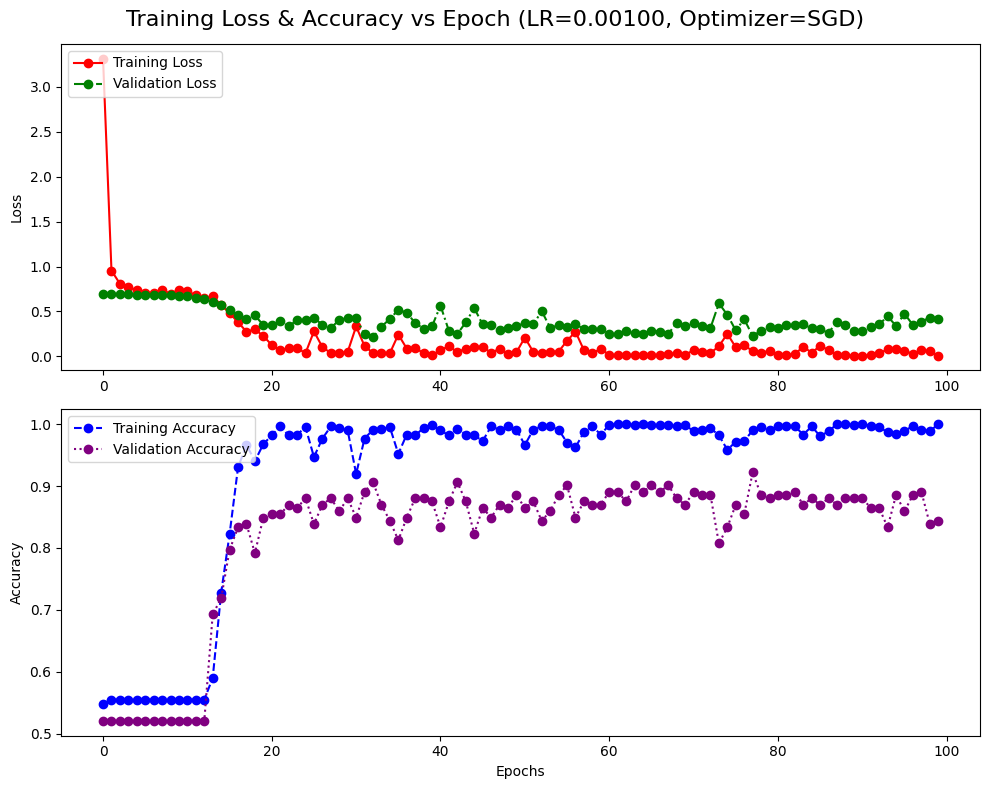

Entrenando con learning_rate=0.00100, epochs=100, optimizer=Adam


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/25 [00:00<?, ?batch/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 Training Accuracy = 0.6498054474708171
Epoch 1 Training Loss = 2.045328539169252
Epoch 1 Validation Accuracy = 0.6666666666666666
Epoch 1 Validation Loss = 2.071332484483719
La mejor precisión de Validation Loss (2.071332484483719) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 2 Training Accuracy = 0.7457846952010376
Epoch 2 Training Loss = 0.9150046442578584
Epoch 2 Validation Accuracy = 0.703125
Epoch 2 Validation Loss = 0.5863438645998637
La mejor precisión de Validation Loss (0.5863438645998637) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 3 Training Accuracy = 0.7769130998702983
Epoch 3 Training Loss = 0.7760309090719458
Epoch 3 Validation Accuracy = 0.625
Epoch 3 Validation Loss = 0.6393904189268748
La mejor precisión de Validation Loss (0.5863438645998637) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 4 Training Accuracy = 0.8067444876783398
Epoch 4 Training Loss = 0.7084957437756461
Epoch 4 Validation Accuracy = 0.75
Epoch 4 Validation Loss = 0.7236086428165436
La mejor precisión de Validation Loss (0.5863438645998637) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 5 Training Accuracy = 0.7626459143968871
Epoch 5 Training Loss = 0.8310115228367223
Epoch 5 Validation Accuracy = 0.7760416666666666
Epoch 5 Validation Loss = 3.668240482608477
La mejor precisión de Validation Loss (0.5863438645998637) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 6 Training Accuracy = 0.8300907911802854
Epoch 6 Training Loss = 0.593354604355556
Epoch 6 Validation Accuracy = 0.71875
Epoch 6 Validation Loss = 0.7678002615769705
La mejor precisión de Validation Loss (0.5863438645998637) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 7 Training Accuracy = 0.8884565499351491
Epoch 7 Training Loss = 0.39591314604000977
Epoch 7 Validation Accuracy = 0.734375
Epoch 7 Validation Loss = 0.5411608318487803
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 8 Training Accuracy = 0.7846952010376135
Epoch 8 Training Loss = 0.7933133022639848
Epoch 8 Validation Accuracy = 0.7239583333333334
Epoch 8 Validation Loss = 1.3108731259902318
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 9 Training Accuracy = 0.8352788586251622
Epoch 9 Training Loss = 0.5981676699895648
Epoch 9 Validation Accuracy = 0.609375
Epoch 9 Validation Loss = 0.7480699171622595
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 10 Training Accuracy = 0.8962386511024644
Epoch 10 Training Loss = 0.3785649706572101
Epoch 10 Validation Accuracy = 0.59375
Epoch 10 Validation Loss = 1.9512273073196411
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 11 Training Accuracy = 0.8365758754863813
Epoch 11 Training Loss = 0.6655838084823891
Epoch 11 Validation Accuracy = 0.7135416666666666
Epoch 11 Validation Loss = 0.5921163558959961
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 12 Training Accuracy = 0.9234760051880675
Epoch 12 Training Loss = 0.31263242605904507
Epoch 12 Validation Accuracy = 0.640625
Epoch 12 Validation Loss = 1.1490642428398132
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 13 Training Accuracy = 0.9299610894941635
Epoch 13 Training Loss = 0.2892689898165593
Epoch 13 Validation Accuracy = 0.5572916666666666
Epoch 13 Validation Loss = 4.745433410008748
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 14 Training Accuracy = 0.808041504539559
Epoch 14 Training Loss = 0.7369267836155131
Epoch 14 Validation Accuracy = 0.7291666666666666
Epoch 14 Validation Loss = 0.6346888492504755
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 15 Training Accuracy = 0.9377431906614786
Epoch 15 Training Loss = 0.30010290322136784
Epoch 15 Validation Accuracy = 0.7239583333333334
Epoch 15 Validation Loss = 1.0546068002780278
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 16 Training Accuracy = 0.9429312581063554
Epoch 16 Training Loss = 0.2840817379735014
Epoch 16 Validation Accuracy = 0.734375
Epoch 16 Validation Loss = 1.0243381162484486
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 17 Training Accuracy = 0.8391699092088197
Epoch 17 Training Loss = 0.6614710174491278
Epoch 17 Validation Accuracy = 0.5729166666666666
Epoch 17 Validation Loss = 1.3264540533224742
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 18 Training Accuracy = 0.8767833981841764
Epoch 18 Training Loss = 0.5833031203496317
Epoch 18 Validation Accuracy = 0.5520833333333334
Epoch 18 Validation Loss = 0.8214297691980997
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 19 Training Accuracy = 0.8767833981841764
Epoch 19 Training Loss = 0.45185069289498137
Epoch 19 Validation Accuracy = 0.7447916666666666
Epoch 19 Validation Loss = 0.6604674806197485
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 20 Training Accuracy = 0.9312581063553826
Epoch 20 Training Loss = 0.3055702202051066
Epoch 20 Validation Accuracy = 0.5885416666666666
Epoch 20 Validation Loss = 1.8404453595479329
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 21 Training Accuracy = 0.8638132295719845
Epoch 21 Training Loss = 0.5847258949712711
Epoch 21 Validation Accuracy = 0.65625
Epoch 21 Validation Loss = 0.727276086807251
La mejor precisión de Validation Loss (0.5411608318487803) se alcanzó en la época 7


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 22 Training Accuracy = 0.9234760051880675
Epoch 22 Training Loss = 0.3102956815065886
Epoch 22 Validation Accuracy = 0.7760416666666666
Epoch 22 Validation Loss = 0.5099285244941711
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 23 Training Accuracy = 0.9520103761348897
Epoch 23 Training Loss = 0.18431139460507534
Epoch 23 Validation Accuracy = 0.6979166666666666
Epoch 23 Validation Loss = 1.2205382287502289
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 24 Training Accuracy = 0.9571984435797666
Epoch 24 Training Loss = 0.19824119045576696
Epoch 24 Validation Accuracy = 0.6302083333333334
Epoch 24 Validation Loss = 3.3488123416900635
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 25 Training Accuracy = 0.8586251621271076
Epoch 25 Training Loss = 0.6014854592571927
Epoch 25 Validation Accuracy = 0.7083333333333334
Epoch 25 Validation Loss = 0.6795971542596817
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 26 Training Accuracy = 0.9273670557717251
Epoch 26 Training Loss = 0.3410848049802075
Epoch 26 Validation Accuracy = 0.7708333333333334
Epoch 26 Validation Loss = 0.7985787192980448
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 27 Training Accuracy = 0.9701686121919585
Epoch 27 Training Loss = 0.16454349800306536
Epoch 27 Validation Accuracy = 0.7760416666666666
Epoch 27 Validation Loss = 1.1145223379135132
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 28 Training Accuracy = 0.9662775616083009
Epoch 28 Training Loss = 0.16131787920121862
Epoch 28 Validation Accuracy = 0.7708333333333334
Epoch 28 Validation Loss = 0.7042083789904913
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 29 Training Accuracy = 0.9468223086900129
Epoch 29 Training Loss = 0.2687330160932627
Epoch 29 Validation Accuracy = 0.7604166666666666
Epoch 29 Validation Loss = 0.7104540665944418
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 30 Training Accuracy = 0.9156939040207522
Epoch 30 Training Loss = 0.3945843807570201
Epoch 30 Validation Accuracy = 0.671875
Epoch 30 Validation Loss = 0.9989679455757141
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 31 Training Accuracy = 0.9740596627756161
Epoch 31 Training Loss = 0.1205586496300889
Epoch 31 Validation Accuracy = 0.734375
Epoch 31 Validation Loss = 0.9630551934242249
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 32 Training Accuracy = 0.9883268482490273
Epoch 32 Training Loss = 0.07788651294513435
Epoch 32 Validation Accuracy = 0.7864583333333334
Epoch 32 Validation Loss = 0.8599590957164764
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 33 Training Accuracy = 0.8702983138780804
Epoch 33 Training Loss = 0.5624846204554833
Epoch 33 Validation Accuracy = 0.7604166666666666
Epoch 33 Validation Loss = 0.515314963956674
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 34 Training Accuracy = 0.9468223086900129
Epoch 34 Training Loss = 0.27634124533211674
Epoch 34 Validation Accuracy = 0.734375
Epoch 34 Validation Loss = 1.1998412410418193
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 35 Training Accuracy = 0.8923476005188068
Epoch 35 Training Loss = 0.5087101951183512
Epoch 35 Validation Accuracy = 0.7083333333333334
Epoch 35 Validation Loss = 1.2635782758394878
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 36 Training Accuracy = 0.9416342412451362
Epoch 36 Training Loss = 0.2924315874523999
Epoch 36 Validation Accuracy = 0.7552083333333334
Epoch 36 Validation Loss = 0.8256801863511404
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 37 Training Accuracy = 0.9753566796368353
Epoch 37 Training Loss = 0.09908294657018185
Epoch 37 Validation Accuracy = 0.7760416666666666
Epoch 37 Validation Loss = 0.9104911883672079
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 38 Training Accuracy = 0.9792477302204928
Epoch 38 Training Loss = 0.09288383943020292
Epoch 38 Validation Accuracy = 0.7760416666666666
Epoch 38 Validation Loss = 1.063823754588763
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 39 Training Accuracy = 0.85473411154345
Epoch 39 Training Loss = 0.5985229038542811
Epoch 39 Validation Accuracy = 0.796875
Epoch 39 Validation Loss = 0.5932994186878204
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 40 Training Accuracy = 0.9053177691309987
Epoch 40 Training Loss = 0.4335973890916228
Epoch 40 Validation Accuracy = 0.7395833333333334
Epoch 40 Validation Loss = 0.965933233499527
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 41 Training Accuracy = 0.959792477302205
Epoch 41 Training Loss = 0.20965547830678147
Epoch 41 Validation Accuracy = 0.7447916666666666
Epoch 41 Validation Loss = 1.5835900902748108
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 42 Training Accuracy = 0.9247730220492867
Epoch 42 Training Loss = 0.35809476410755076
Epoch 42 Validation Accuracy = 0.7552083333333334
Epoch 42 Validation Loss = 0.6695840706427892
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 43 Training Accuracy = 0.9455252918287937
Epoch 43 Training Loss = 0.2610903248558094
Epoch 43 Validation Accuracy = 0.65625
Epoch 43 Validation Loss = 1.3946143786112468
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 44 Training Accuracy = 0.9364461738002594
Epoch 44 Training Loss = 0.318310509241354
Epoch 44 Validation Accuracy = 0.6875
Epoch 44 Validation Loss = 1.6068939367930095
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 45 Training Accuracy = 0.914396887159533
Epoch 45 Training Loss = 0.3851884617415848
Epoch 45 Validation Accuracy = 0.703125
Epoch 45 Validation Loss = 1.627699851989746
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 46 Training Accuracy = 0.9688715953307393
Epoch 46 Training Loss = 0.17553608040246826
Epoch 46 Validation Accuracy = 0.7760416666666666
Epoch 46 Validation Loss = 0.8224451939264933
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 47 Training Accuracy = 0.9909208819714657
Epoch 47 Training Loss = 0.09099599017233777
Epoch 47 Validation Accuracy = 0.765625
Epoch 47 Validation Loss = 1.1379357278347015
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 48 Training Accuracy = 0.9974059662775616
Epoch 48 Training Loss = 0.023658681076247096
Epoch 48 Validation Accuracy = 0.7552083333333334
Epoch 48 Validation Loss = 1.4889880617459614
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 49 Training Accuracy = 1.0
Epoch 49 Training Loss = 0.005544871606727538
Epoch 49 Validation Accuracy = 0.7604166666666666
Epoch 49 Validation Loss = 1.8486987551053364
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 50 Training Accuracy = 0.9909208819714657
Epoch 50 Training Loss = 0.10047317522755508
Epoch 50 Validation Accuracy = 0.5677083333333334
Epoch 50 Validation Loss = 12.98971160252889
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 51 Training Accuracy = 0.8443579766536965
Epoch 51 Training Loss = 0.767578318889039
Epoch 51 Validation Accuracy = 0.65625
Epoch 51 Validation Loss = 1.1809586187203724
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 52 Training Accuracy = 0.9299610894941635
Epoch 52 Training Loss = 0.43742531584394584
Epoch 52 Validation Accuracy = 0.734375
Epoch 52 Validation Loss = 0.8143277664979299
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 53 Training Accuracy = 0.9610894941634242
Epoch 53 Training Loss = 0.19989506396840673
Epoch 53 Validation Accuracy = 0.7447916666666666
Epoch 53 Validation Loss = 1.1922759612401326
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 54 Training Accuracy = 0.9831387808041504
Epoch 54 Training Loss = 0.0859643503306035
Epoch 54 Validation Accuracy = 0.7395833333333334
Epoch 54 Validation Loss = 1.1863301992416382
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 55 Training Accuracy = 0.993514915693904
Epoch 55 Training Loss = 0.03643169218309504
Epoch 55 Validation Accuracy = 0.7447916666666666
Epoch 55 Validation Loss = 1.4875016411145527
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 56 Training Accuracy = 0.993514915693904
Epoch 56 Training Loss = 0.024086140434411096
Epoch 56 Validation Accuracy = 0.7395833333333334
Epoch 56 Validation Loss = 1.6465112964312236
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 57 Training Accuracy = 0.9948119325551232
Epoch 57 Training Loss = 0.02693438660909075
Epoch 57 Validation Accuracy = 0.7135416666666666
Epoch 57 Validation Loss = 2.303007741769155
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 58 Training Accuracy = 0.9481193255512321
Epoch 58 Training Loss = 0.29809885402481845
Epoch 58 Validation Accuracy = 0.734375
Epoch 58 Validation Loss = 0.7795817603667577
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 59 Training Accuracy = 0.9662775616083009
Epoch 59 Training Loss = 0.14449499494815304
Epoch 59 Validation Accuracy = 0.7447916666666666
Epoch 59 Validation Loss = 1.007881869872411
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 60 Training Accuracy = 0.9779507133592736
Epoch 60 Training Loss = 0.10928255997612667
Epoch 60 Validation Accuracy = 0.6927083333333334
Epoch 60 Validation Loss = 1.325686275959015
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 61 Training Accuracy = 0.9961089494163424
Epoch 61 Training Loss = 0.04057752094612047
Epoch 61 Validation Accuracy = 0.6979166666666666
Epoch 61 Validation Loss = 1.7099195619424183
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 62 Training Accuracy = 0.9922178988326849
Epoch 62 Training Loss = 0.03569275667424641
Epoch 62 Validation Accuracy = 0.7395833333333334
Epoch 62 Validation Loss = 1.3875590066115062
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 63 Training Accuracy = 0.9987029831387808
Epoch 63 Training Loss = 0.01924637966486112
Epoch 63 Validation Accuracy = 0.734375
Epoch 63 Validation Loss = 1.7730106910069783
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 64 Training Accuracy = 0.9987029831387808
Epoch 64 Training Loss = 0.009425269627349329
Epoch 64 Validation Accuracy = 0.7447916666666666
Epoch 64 Validation Loss = 1.9674553275108337
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 65 Training Accuracy = 1.0
Epoch 65 Training Loss = 0.004793687350625213
Epoch 65 Validation Accuracy = 0.7291666666666666
Epoch 65 Validation Loss = 2.532566567262014
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 66 Training Accuracy = 0.9987029831387808
Epoch 66 Training Loss = 0.035134828474309814
Epoch 66 Validation Accuracy = 0.734375
Epoch 66 Validation Loss = 2.355837047100067
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 67 Training Accuracy = 0.9507133592736705
Epoch 67 Training Loss = 0.30056500711977174
Epoch 67 Validation Accuracy = 0.7291666666666666
Epoch 67 Validation Loss = 0.6377400408188502
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 68 Training Accuracy = 0.9701686121919585
Epoch 68 Training Loss = 0.2502843489056277
Epoch 68 Validation Accuracy = 0.734375
Epoch 68 Validation Loss = 0.8469067464272181
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 69 Training Accuracy = 0.980544747081712
Epoch 69 Training Loss = 0.10382733334595128
Epoch 69 Validation Accuracy = 0.6979166666666666
Epoch 69 Validation Loss = 7.457759380340576
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 70 Training Accuracy = 0.9779507133592736
Epoch 70 Training Loss = 0.1842018229507596
Epoch 70 Validation Accuracy = 0.7552083333333334
Epoch 70 Validation Loss = 2.3518541057904563
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 71 Training Accuracy = 0.9792477302204928
Epoch 71 Training Loss = 0.11055179860988866
Epoch 71 Validation Accuracy = 0.7760416666666666
Epoch 71 Validation Loss = 1.2222503672043483
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 72 Training Accuracy = 0.9948119325551232
Epoch 72 Training Loss = 0.022631416312296877
Epoch 72 Validation Accuracy = 0.7552083333333334
Epoch 72 Validation Loss = 1.6401897072792053
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 73 Training Accuracy = 0.993514915693904
Epoch 73 Training Loss = 0.0404549899393869
Epoch 73 Validation Accuracy = 0.7552083333333334
Epoch 73 Validation Loss = 1.8185906608899434
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 74 Training Accuracy = 0.953307392996109
Epoch 74 Training Loss = 0.2847894508145199
Epoch 74 Validation Accuracy = 0.7604166666666666
Epoch 74 Validation Loss = 0.5764545326431593
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 75 Training Accuracy = 0.980544747081712
Epoch 75 Training Loss = 0.12207586525053984
Epoch 75 Validation Accuracy = 0.7135416666666666
Epoch 75 Validation Loss = 1.4076564808686574
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 76 Training Accuracy = 0.9831387808041504
Epoch 76 Training Loss = 0.10001687217991795
Epoch 76 Validation Accuracy = 0.7083333333333334
Epoch 76 Validation Loss = 0.9540238181749979
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 77 Training Accuracy = 0.9870298313878081
Epoch 77 Training Loss = 0.06110090423186929
Epoch 77 Validation Accuracy = 0.7864583333333334
Epoch 77 Validation Loss = 1.0363974968592327
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 78 Training Accuracy = 0.9922178988326849
Epoch 78 Training Loss = 0.09548537454407194
Epoch 78 Validation Accuracy = 0.7604166666666666
Epoch 78 Validation Loss = 0.8867994348208109
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 79 Training Accuracy = 0.9040207522697795
Epoch 79 Training Loss = 0.4562727931872416
Epoch 79 Validation Accuracy = 0.75
Epoch 79 Validation Loss = 0.6415132681528727
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 80 Training Accuracy = 0.9649805447470817
Epoch 80 Training Loss = 0.214142617161945
Epoch 80 Validation Accuracy = 0.7760416666666666
Epoch 80 Validation Loss = 0.7076481382052103
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 81 Training Accuracy = 0.9559014267185474
Epoch 81 Training Loss = 0.20186787542202128
Epoch 81 Validation Accuracy = 0.7291666666666666
Epoch 81 Validation Loss = 1.0424801607926686
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 82 Training Accuracy = 0.9325551232166018
Epoch 82 Training Loss = 0.39228204901580216
Epoch 82 Validation Accuracy = 0.71875
Epoch 82 Validation Loss = 1.1249288618564606
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 83 Training Accuracy = 0.9688715953307393
Epoch 83 Training Loss = 0.20706257059561373
Epoch 83 Validation Accuracy = 0.71875
Epoch 83 Validation Loss = 1.011068344116211
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 84 Training Accuracy = 0.9948119325551232
Epoch 84 Training Loss = 0.05701423433504216
Epoch 84 Validation Accuracy = 0.75
Epoch 84 Validation Loss = 1.2239588399728139
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 85 Training Accuracy = 0.9831387808041504
Epoch 85 Training Loss = 0.10581221809337729
Epoch 85 Validation Accuracy = 0.7083333333333334
Epoch 85 Validation Loss = 1.3977454602718353
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 86 Training Accuracy = 0.9883268482490273
Epoch 86 Training Loss = 0.06612505863061907
Epoch 86 Validation Accuracy = 0.765625
Epoch 86 Validation Loss = 1.529756983121236
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 87 Training Accuracy = 0.9896238651102465
Epoch 87 Training Loss = 0.09533570378284355
Epoch 87 Validation Accuracy = 0.75
Epoch 87 Validation Loss = 1.1468385756015778
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 88 Training Accuracy = 0.9559014267185474
Epoch 88 Training Loss = 0.21979894766393185
Epoch 88 Validation Accuracy = 0.7708333333333334
Epoch 88 Validation Loss = 0.609328972796599
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 89 Training Accuracy = 0.9818417639429312
Epoch 89 Training Loss = 0.12366635341743241
Epoch 89 Validation Accuracy = 0.8072916666666666
Epoch 89 Validation Loss = 0.6607881089051565
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 90 Training Accuracy = 0.767833981841764
Epoch 90 Training Loss = 0.8998064405723305
Epoch 90 Validation Accuracy = 0.5520833333333334
Epoch 90 Validation Loss = 6.038742144902547
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 91 Training Accuracy = 0.8715953307392996
Epoch 91 Training Loss = 0.5481380272159008
Epoch 91 Validation Accuracy = 0.7760416666666666
Epoch 91 Validation Loss = 0.6762851675351461
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 92 Training Accuracy = 0.9260700389105059
Epoch 92 Training Loss = 0.32323264318062944
Epoch 92 Validation Accuracy = 0.7708333333333334
Epoch 92 Validation Loss = 0.9450607001781464
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 93 Training Accuracy = 0.914396887159533
Epoch 93 Training Loss = 0.4194198430898743
Epoch 93 Validation Accuracy = 0.71875
Epoch 93 Validation Loss = 0.9849980374177297
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 94 Training Accuracy = 0.953307392996109
Epoch 94 Training Loss = 0.24637180729135003
Epoch 94 Validation Accuracy = 0.7447916666666666
Epoch 94 Validation Loss = 0.9301671286424001
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 95 Training Accuracy = 0.9766536964980544
Epoch 95 Training Loss = 0.10958377816672069
Epoch 95 Validation Accuracy = 0.734375
Epoch 95 Validation Loss = 1.042684907714526
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 96 Training Accuracy = 0.9987029831387808
Epoch 96 Training Loss = 0.021906718488507233
Epoch 96 Validation Accuracy = 0.75
Epoch 96 Validation Loss = 1.5059148371219635
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 97 Training Accuracy = 0.9987029831387808
Epoch 97 Training Loss = 0.011036987044400355
Epoch 97 Validation Accuracy = 0.75
Epoch 97 Validation Loss = 1.9782998363176982
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 98 Training Accuracy = 0.9883268482490273
Epoch 98 Training Loss = 0.04759125304245299
Epoch 98 Validation Accuracy = 0.7083333333333334
Epoch 98 Validation Loss = 2.7708993752797446
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 99 Training Accuracy = 0.933852140077821
Epoch 99 Training Loss = 0.3696635303832832
Epoch 99 Validation Accuracy = 0.75
Epoch 99 Validation Loss = 0.7329826454321543
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 100 Training Accuracy = 0.9779507133592736
Epoch 100 Training Loss = 0.14240591321140528
Epoch 100 Validation Accuracy = 0.7864583333333334
Epoch 100 Validation Loss = 1.1042989989121754
La mejor precisión de Validation Loss (0.5099285244941711) se alcanzó en la época 22


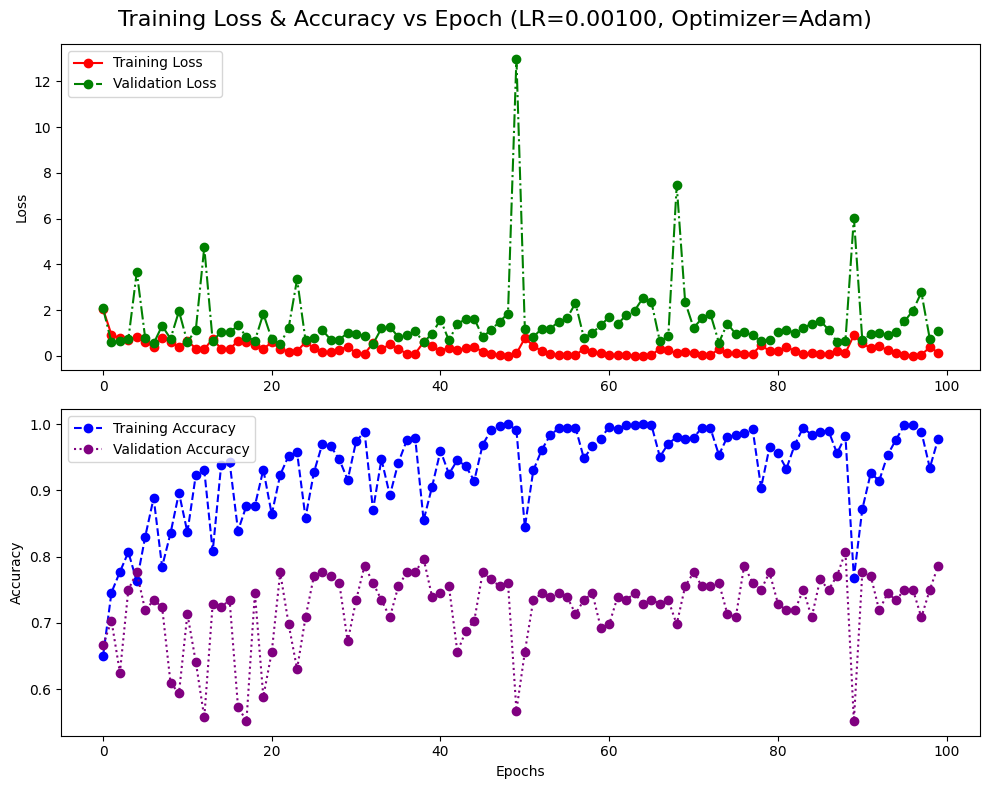

Entrenando con learning_rate=0.00100, epochs=100, optimizer=RMSprop


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/25 [00:00<?, ?batch/s]

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch 1 Training Accuracy = 0.543450064850843
Epoch 1 Training Loss = 2.0702529394209153
Epoch 1 Validation Accuracy = 0.6145833333333334
Epoch 1 Validation Loss = 0.7578130563100179
La mejor precisión de Validation Loss (0.7578130563100179) se alcanzó en la época 1


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 2 Training Accuracy = 0.5525291828793775
Epoch 2 Training Loss = 1.2380785598056017
Epoch 2 Validation Accuracy = 0.5208333333333334
Epoch 2 Validation Loss = 0.6994011998176575
La mejor precisión de Validation Loss (0.6994011998176575) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 3 Training Accuracy = 0.5551232166018158
Epoch 3 Training Loss = 1.23847974490872
Epoch 3 Validation Accuracy = 0.5208333333333334
Epoch 3 Validation Loss = 0.7086282869180044
La mejor precisión de Validation Loss (0.6994011998176575) se alcanzó en la época 2


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 4 Training Accuracy = 0.5551232166018158
Epoch 4 Training Loss = 1.190540985065366
Epoch 4 Validation Accuracy = 0.5208333333333334
Epoch 4 Validation Loss = 0.6918093462785085
La mejor precisión de Validation Loss (0.6918093462785085) se alcanzó en la época 4


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 5 Training Accuracy = 0.5551232166018158
Epoch 5 Training Loss = 1.256087232656516
Epoch 5 Validation Accuracy = 0.4895833333333333
Epoch 5 Validation Loss = 0.6964531640211741
La mejor precisión de Validation Loss (0.6918093462785085) se alcanzó en la época 4


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 6 Training Accuracy = 0.5538261997405967
Epoch 6 Training Loss = 1.2115666900318112
Epoch 6 Validation Accuracy = 0.5104166666666666
Epoch 6 Validation Loss = 0.690660148859024
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 7 Training Accuracy = 0.5551232166018158
Epoch 7 Training Loss = 1.2049025796576078
Epoch 7 Validation Accuracy = 0.5208333333333334
Epoch 7 Validation Loss = 0.694291353225708
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 8 Training Accuracy = 0.5551232166018158
Epoch 8 Training Loss = 1.1993429555657926
Epoch 8 Validation Accuracy = 0.5208333333333334
Epoch 8 Validation Loss = 0.6942212482293447
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 9 Training Accuracy = 0.5551232166018158
Epoch 9 Training Loss = 1.1885700663394656
Epoch 9 Validation Accuracy = 0.5208333333333334
Epoch 9 Validation Loss = 0.6968856056531271
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 10 Training Accuracy = 0.5551232166018158
Epoch 10 Training Loss = 1.2014856765242403
Epoch 10 Validation Accuracy = 0.5208333333333334
Epoch 10 Validation Loss = 0.6955873966217041
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 11 Training Accuracy = 0.5551232166018158
Epoch 11 Training Loss = 1.2385707520016127
Epoch 11 Validation Accuracy = 0.5208333333333334
Epoch 11 Validation Loss = 0.6947714388370514
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 12 Training Accuracy = 0.5551232166018158
Epoch 12 Training Loss = 1.1938781150738706
Epoch 12 Validation Accuracy = 0.5208333333333334
Epoch 12 Validation Loss = 0.6964109838008881
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 13 Training Accuracy = 0.5551232166018158
Epoch 13 Training Loss = 1.1829025071264085
Epoch 13 Validation Accuracy = 0.5208333333333334
Epoch 13 Validation Loss = 0.6955791513125101
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 14 Training Accuracy = 0.5551232166018158
Epoch 14 Training Loss = 1.234198489387057
Epoch 14 Validation Accuracy = 0.5208333333333334
Epoch 14 Validation Loss = 0.7467831571896871
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 15 Training Accuracy = 0.5538261997405967
Epoch 15 Training Loss = 1.170883139438357
Epoch 15 Validation Accuracy = 0.5208333333333334
Epoch 15 Validation Loss = 0.6939088602860769
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 16 Training Accuracy = 0.5603112840466926
Epoch 16 Training Loss = 1.1690210032865076
Epoch 16 Validation Accuracy = 0.5208333333333334
Epoch 16 Validation Loss = 0.6929349501927694
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 17 Training Accuracy = 0.5525291828793775
Epoch 17 Training Loss = 1.1564192229207853
Epoch 17 Validation Accuracy = 0.65625
Epoch 17 Validation Loss = 0.883842259645462
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 18 Training Accuracy = 0.5642023346303502
Epoch 18 Training Loss = 1.128071954432783
Epoch 18 Validation Accuracy = 0.5208333333333334
Epoch 18 Validation Loss = 13.030056476593018
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 19 Training Accuracy = 0.6095979247730221
Epoch 19 Training Loss = 1.1026171404100114
Epoch 19 Validation Accuracy = 0.5208333333333334
Epoch 19 Validation Loss = 0.693204919497172
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 20 Training Accuracy = 0.6134889753566797
Epoch 20 Training Loss = 1.0850049818536187
Epoch 20 Validation Accuracy = 0.5208333333333334
Epoch 20 Validation Loss = 0.8053211669127146
La mejor precisión de Validation Loss (0.690660148859024) se alcanzó en la época 6


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 21 Training Accuracy = 0.6264591439688716
Epoch 21 Training Loss = 1.0666086947407705
Epoch 21 Validation Accuracy = 0.6875
Epoch 21 Validation Loss = 0.6500753959019979
La mejor precisión de Validation Loss (0.6500753959019979) se alcanzó en la época 21


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 22 Training Accuracy = 0.6588845654993515
Epoch 22 Training Loss = 1.0810064606165608
Epoch 22 Validation Accuracy = 0.578125
Epoch 22 Validation Loss = 0.6721018453439077
La mejor precisión de Validation Loss (0.6500753959019979) se alcanzó en la época 21


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 23 Training Accuracy = 0.6549935149156939
Epoch 23 Training Loss = 1.009987965400117
Epoch 23 Validation Accuracy = 0.7135416666666666
Epoch 23 Validation Loss = 0.6391869485378265
La mejor precisión de Validation Loss (0.6391869485378265) se alcanzó en la época 23


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 24 Training Accuracy = 0.6705577172503242
Epoch 24 Training Loss = 1.0255722367964522
Epoch 24 Validation Accuracy = 0.65625
Epoch 24 Validation Loss = 1.1831520398457844
La mejor precisión de Validation Loss (0.6391869485378265) se alcanzó en la época 23


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 25 Training Accuracy = 0.669260700389105
Epoch 25 Training Loss = 1.0216087777017775
Epoch 25 Validation Accuracy = 0.640625
Epoch 25 Validation Loss = 0.6336996952692667
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 26 Training Accuracy = 0.6977950713359273
Epoch 26 Training Loss = 0.9434921282274714
Epoch 26 Validation Accuracy = 0.53125
Epoch 26 Validation Loss = 0.8196542064348856
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 27 Training Accuracy = 0.688715953307393
Epoch 27 Training Loss = 0.9510062374029642
Epoch 27 Validation Accuracy = 0.546875
Epoch 27 Validation Loss = 0.784522275129954
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 28 Training Accuracy = 0.7055771725032426
Epoch 28 Training Loss = 0.9261865442674293
Epoch 28 Validation Accuracy = 0.6302083333333334
Epoch 28 Validation Loss = 1.4619367023309071
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 29 Training Accuracy = 0.6977950713359273
Epoch 29 Training Loss = 0.9026416175251032
Epoch 29 Validation Accuracy = 0.6302083333333334
Epoch 29 Validation Loss = 0.656254917383194
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 30 Training Accuracy = 0.6964980544747081
Epoch 30 Training Loss = 1.0402177564519544
Epoch 30 Validation Accuracy = 0.4583333333333333
Epoch 30 Validation Loss = 0.7615028520425161
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 31 Training Accuracy = 0.5927367055771725
Epoch 31 Training Loss = 1.1035493527250377
Epoch 31 Validation Accuracy = 0.5208333333333334
Epoch 31 Validation Loss = 0.6945472160975138
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 32 Training Accuracy = 0.6238651102464332
Epoch 32 Training Loss = 1.0361539438540834
Epoch 32 Validation Accuracy = 0.5208333333333334
Epoch 32 Validation Loss = 0.7941348254680634
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 33 Training Accuracy = 0.6523994811932555
Epoch 33 Training Loss = 1.0222352506585621
Epoch 33 Validation Accuracy = 0.4947916666666667
Epoch 33 Validation Loss = 21.241905132929485
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 34 Training Accuracy = 0.6433203631647212
Epoch 34 Training Loss = 1.000992638437046
Epoch 34 Validation Accuracy = 0.5729166666666666
Epoch 34 Validation Loss = 0.8569643199443817
La mejor precisión de Validation Loss (0.6336996952692667) se alcanzó en la época 25


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 35 Training Accuracy = 0.7016861219195849
Epoch 35 Training Loss = 0.9243628106692422
Epoch 35 Validation Accuracy = 0.7083333333333334
Epoch 35 Validation Loss = 0.5947678883870443
La mejor precisión de Validation Loss (0.5947678883870443) se alcanzó en la época 35


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 36 Training Accuracy = 0.748378728923476
Epoch 36 Training Loss = 0.8912081189656536
Epoch 36 Validation Accuracy = 0.6822916666666666
Epoch 36 Validation Loss = 0.5808924486239752
La mejor precisión de Validation Loss (0.5808924486239752) se alcanzó en la época 36


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 37 Training Accuracy = 0.754863813229572
Epoch 37 Training Loss = 0.8044177105145386
Epoch 37 Validation Accuracy = 0.5572916666666666
Epoch 37 Validation Loss = 2.8330986499786377
La mejor precisión de Validation Loss (0.5808924486239752) se alcanzó en la época 36


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 38 Training Accuracy = 0.7496757457846952
Epoch 38 Training Loss = 0.8317106425684868
Epoch 38 Validation Accuracy = 0.5989583333333334
Epoch 38 Validation Loss = 0.6725895802179972
La mejor precisión de Validation Loss (0.5808924486239752) se alcanzó en la época 36


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 39 Training Accuracy = 0.7808041504539559
Epoch 39 Training Loss = 0.7144807788957727
Epoch 39 Validation Accuracy = 0.6145833333333334
Epoch 39 Validation Loss = 1.008804976940155
La mejor precisión de Validation Loss (0.5808924486239752) se alcanzó en la época 36


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 40 Training Accuracy = 0.7937743190661478
Epoch 40 Training Loss = 0.6763813944023717
Epoch 40 Validation Accuracy = 0.6614583333333334
Epoch 40 Validation Loss = 0.5880987544854482
La mejor precisión de Validation Loss (0.5808924486239752) se alcanzó en la época 36


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 41 Training Accuracy = 0.8028534370946823
Epoch 41 Training Loss = 0.7019269390638082
Epoch 41 Validation Accuracy = 0.7135416666666666
Epoch 41 Validation Loss = 0.5709569255510966
La mejor precisión de Validation Loss (0.5709569255510966) se alcanzó en la época 41


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 42 Training Accuracy = 0.8132295719844358
Epoch 42 Training Loss = 0.7094222951955832
Epoch 42 Validation Accuracy = 0.5104166666666666
Epoch 42 Validation Loss = 1.7635908126831055
La mejor precisión de Validation Loss (0.5709569255510966) se alcanzó en la época 41


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 43 Training Accuracy = 0.8482490272373541
Epoch 43 Training Loss = 0.5373224909048909
Epoch 43 Validation Accuracy = 0.5520833333333334
Epoch 43 Validation Loss = 532.8716227213541
La mejor precisión de Validation Loss (0.5709569255510966) se alcanzó en la época 41


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 44 Training Accuracy = 0.8210116731517509
Epoch 44 Training Loss = 0.6132788381378629
Epoch 44 Validation Accuracy = 0.53125
Epoch 44 Validation Loss = 0.9736203948656718
La mejor precisión de Validation Loss (0.5709569255510966) se alcanzó en la época 41


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 45 Training Accuracy = 0.8249027237354085
Epoch 45 Training Loss = 0.5894317788140783
Epoch 45 Validation Accuracy = 0.7604166666666666
Epoch 45 Validation Loss = 0.5276402086019516
La mejor precisión de Validation Loss (0.5276402086019516) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 46 Training Accuracy = 0.8910505836575876
Epoch 46 Training Loss = 0.3659539233443802
Epoch 46 Validation Accuracy = 0.671875
Epoch 46 Validation Loss = 1.0494643052419026
La mejor precisión de Validation Loss (0.5276402086019516) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 47 Training Accuracy = 0.9014267185473411
Epoch 47 Training Loss = 0.35079891919780487
Epoch 47 Validation Accuracy = 0.5729166666666666
Epoch 47 Validation Loss = 1.713890512784322
La mejor precisión de Validation Loss (0.5276402086019516) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 48 Training Accuracy = 0.8897535667963683
Epoch 48 Training Loss = 0.4332815994703043
Epoch 48 Validation Accuracy = 0.6614583333333334
Epoch 48 Validation Loss = 0.6418494780858358
La mejor precisión de Validation Loss (0.5276402086019516) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 49 Training Accuracy = 0.8910505836575876
Epoch 49 Training Loss = 0.40414954375973317
Epoch 49 Validation Accuracy = 0.4947916666666667
Epoch 49 Validation Loss = 5.241353114446004
La mejor precisión de Validation Loss (0.5276402086019516) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 50 Training Accuracy = 0.9001297016861219
Epoch 50 Training Loss = 0.3868618303699716
Epoch 50 Validation Accuracy = 0.7552083333333334
Epoch 50 Validation Loss = 0.657414510846138
La mejor precisión de Validation Loss (0.5276402086019516) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 51 Training Accuracy = 0.9247730220492867
Epoch 51 Training Loss = 0.24219582068471748
Epoch 51 Validation Accuracy = 0.484375
Epoch 51 Validation Loss = 11.215865929921469
La mejor precisión de Validation Loss (0.5276402086019516) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 52 Training Accuracy = 0.85473411154345
Epoch 52 Training Loss = 0.4534677502091602
Epoch 52 Validation Accuracy = 0.4791666666666667
Epoch 52 Validation Loss = 2.537670850753784
La mejor precisión de Validation Loss (0.5276402086019516) se alcanzó en la época 45


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 53 Training Accuracy = 0.8780804150453956
Epoch 53 Training Loss = 0.4716670435844847
Epoch 53 Validation Accuracy = 0.7916666666666666
Epoch 53 Validation Loss = 0.41711805512507755
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 54 Training Accuracy = 0.9559014267185474
Epoch 54 Training Loss = 0.16433047830826578
Epoch 54 Validation Accuracy = 0.5572916666666666
Epoch 54 Validation Loss = 7.713047583897908
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 55 Training Accuracy = 0.9079118028534371
Epoch 55 Training Loss = 0.35865491400587574
Epoch 55 Validation Accuracy = 0.7447916666666666
Epoch 55 Validation Loss = 0.8121200601259867
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 56 Training Accuracy = 0.9390402075226978
Epoch 56 Training Loss = 0.19179395044128256
Epoch 56 Validation Accuracy = 0.7135416666666666
Epoch 56 Validation Loss = 2.0471156934897103
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 57 Training Accuracy = 0.9520103761348897
Epoch 57 Training Loss = 0.19059945273801357
Epoch 57 Validation Accuracy = 0.5208333333333334
Epoch 57 Validation Loss = 1.231831431388855
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 58 Training Accuracy = 0.8456549935149157
Epoch 58 Training Loss = 0.6026086578418618
Epoch 58 Validation Accuracy = 0.484375
Epoch 58 Validation Loss = 3.472938140233358
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 59 Training Accuracy = 0.9156939040207522
Epoch 59 Training Loss = 0.31446754480150424
Epoch 59 Validation Accuracy = 0.8385416666666666
Epoch 59 Validation Loss = 0.5565870652596155
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 60 Training Accuracy = 0.9688715953307393
Epoch 60 Training Loss = 0.09492976973183578
Epoch 60 Validation Accuracy = 0.7760416666666666
Epoch 60 Validation Loss = 0.9519813259442648
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 61 Training Accuracy = 0.9442282749675746
Epoch 61 Training Loss = 0.19650673864339266
Epoch 61 Validation Accuracy = 0.8125
Epoch 61 Validation Loss = 1.0014738738536835
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 62 Training Accuracy = 0.9494163424124513
Epoch 62 Training Loss = 0.18221861682560456
Epoch 62 Validation Accuracy = 0.8020833333333334
Epoch 62 Validation Loss = 0.9931469957033793
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 63 Training Accuracy = 0.9079118028534371
Epoch 63 Training Loss = 0.37504316025670864
Epoch 63 Validation Accuracy = 0.46875
Epoch 63 Validation Loss = 2.068755646546682
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 64 Training Accuracy = 0.8897535667963683
Epoch 64 Training Loss = 0.43846751929257166
Epoch 64 Validation Accuracy = 0.65625
Epoch 64 Validation Loss = 1.619774580001831
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 65 Training Accuracy = 0.9260700389105059
Epoch 65 Training Loss = 0.3026701755212903
Epoch 65 Validation Accuracy = 0.7916666666666666
Epoch 65 Validation Loss = 0.8003466178973516
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 66 Training Accuracy = 0.9429312581063554
Epoch 66 Training Loss = 0.20089667471157127
Epoch 66 Validation Accuracy = 0.609375
Epoch 66 Validation Loss = 0.9056330621242523
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 67 Training Accuracy = 0.9118028534370947
Epoch 67 Training Loss = 0.3558653789426257
Epoch 67 Validation Accuracy = 0.5625
Epoch 67 Validation Loss = 2.232020358244578
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 68 Training Accuracy = 0.9364461738002594
Epoch 68 Training Loss = 0.2625636205599002
Epoch 68 Validation Accuracy = 0.4791666666666667
Epoch 68 Validation Loss = 1.251942257086436
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 69 Training Accuracy = 0.9234760051880675
Epoch 69 Training Loss = 0.27555575531976234
Epoch 69 Validation Accuracy = 0.78125
Epoch 69 Validation Loss = 0.9188109934329987
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 70 Training Accuracy = 0.9584954604409858
Epoch 70 Training Loss = 0.1562355315522925
Epoch 70 Validation Accuracy = 0.8020833333333334
Epoch 70 Validation Loss = 0.8841831336418787
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 71 Training Accuracy = 0.9688715953307393
Epoch 71 Training Loss = 0.0869213173482398
Epoch 71 Validation Accuracy = 0.8177083333333334
Epoch 71 Validation Loss = 1.0678516427675884
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 72 Training Accuracy = 0.9675745784695201
Epoch 72 Training Loss = 0.11285015121198969
Epoch 72 Validation Accuracy = 0.4583333333333333
Epoch 72 Validation Loss = 0.7275387446085612
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 73 Training Accuracy = 0.8417639429312581
Epoch 73 Training Loss = 0.5171140179173337
Epoch 73 Validation Accuracy = 0.53125
Epoch 73 Validation Loss = 4.595981081326802
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 74 Training Accuracy = 0.9053177691309987
Epoch 74 Training Loss = 0.4388296740025707
Epoch 74 Validation Accuracy = 0.7395833333333334
Epoch 74 Validation Loss = 1.1819842755794525
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 75 Training Accuracy = 0.959792477302205
Epoch 75 Training Loss = 0.10256770488971557
Epoch 75 Validation Accuracy = 0.640625
Epoch 75 Validation Loss = 2.243663787841797
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 76 Training Accuracy = 0.940337224383917
Epoch 76 Training Loss = 0.22812626512308065
Epoch 76 Validation Accuracy = 0.6927083333333334
Epoch 76 Validation Loss = 1.687671184539795
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 77 Training Accuracy = 0.9662775616083009
Epoch 77 Training Loss = 0.08155439874270856
Epoch 77 Validation Accuracy = 0.8177083333333334
Epoch 77 Validation Loss = 0.9237958664695421
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 78 Training Accuracy = 0.9688715953307393
Epoch 78 Training Loss = 0.08594025651226424
Epoch 78 Validation Accuracy = 0.7447916666666666
Epoch 78 Validation Loss = 1.1400467654069264
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 79 Training Accuracy = 0.9792477302204928
Epoch 79 Training Loss = 0.05619108106762209
Epoch 79 Validation Accuracy = 0.4791666666666667
Epoch 79 Validation Loss = 5.340821186701457
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 80 Training Accuracy = 0.7911802853437094
Epoch 80 Training Loss = 0.98662610879668
Epoch 80 Validation Accuracy = 0.515625
Epoch 80 Validation Loss = 5.760881940523784
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 81 Training Accuracy = 0.8845654993514915
Epoch 81 Training Loss = 0.4900617800488701
Epoch 81 Validation Accuracy = 0.6145833333333334
Epoch 81 Validation Loss = 1.7980888684590657
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 82 Training Accuracy = 0.953307392996109
Epoch 82 Training Loss = 0.2352390391643409
Epoch 82 Validation Accuracy = 0.7395833333333334
Epoch 82 Validation Loss = 0.8442025482654572
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 83 Training Accuracy = 0.9584954604409858
Epoch 83 Training Loss = 0.19566986602567976
Epoch 83 Validation Accuracy = 0.7135416666666666
Epoch 83 Validation Loss = 1.4154943426450093
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 84 Training Accuracy = 0.9571984435797666
Epoch 84 Training Loss = 0.19758266113920744
Epoch 84 Validation Accuracy = 0.484375
Epoch 84 Validation Loss = 1.663893183072408
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 85 Training Accuracy = 0.9429312581063554
Epoch 85 Training Loss = 0.1969097457879287
Epoch 85 Validation Accuracy = 0.7083333333333334
Epoch 85 Validation Loss = 1.0053158203760784
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 86 Training Accuracy = 0.9688715953307393
Epoch 86 Training Loss = 0.08086464949188954
Epoch 86 Validation Accuracy = 0.8125
Epoch 86 Validation Loss = 0.9565663735071818
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 87 Training Accuracy = 0.9455252918287937
Epoch 87 Training Loss = 0.19857942099391873
Epoch 87 Validation Accuracy = 0.4739583333333333
Epoch 87 Validation Loss = 0.7786899109681448
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 88 Training Accuracy = 0.9286640726329443
Epoch 88 Training Loss = 0.33390540309762523
Epoch 88 Validation Accuracy = 0.671875
Epoch 88 Validation Loss = 0.8528217375278473
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 89 Training Accuracy = 0.9481193255512321
Epoch 89 Training Loss = 0.19886844175180418
Epoch 89 Validation Accuracy = 0.7447916666666666
Epoch 89 Validation Loss = 0.9727778732776642
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 90 Training Accuracy = 0.9714656290531777
Epoch 90 Training Loss = 0.07950966967325343
Epoch 90 Validation Accuracy = 0.6979166666666666
Epoch 90 Validation Loss = 1.4572126766045888
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 91 Training Accuracy = 0.9753566796368353
Epoch 91 Training Loss = 0.09777773889663463
Epoch 91 Validation Accuracy = 0.8125
Epoch 91 Validation Loss = 0.6022391666968664
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 92 Training Accuracy = 0.9870298313878081
Epoch 92 Training Loss = 0.03935486367986998
Epoch 92 Validation Accuracy = 0.8177083333333334
Epoch 92 Validation Loss = 0.613574837644895
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 93 Training Accuracy = 0.9870298313878081
Epoch 93 Training Loss = 0.031732631864173556
Epoch 93 Validation Accuracy = 0.7916666666666666
Epoch 93 Validation Loss = 0.8820004413525263
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 94 Training Accuracy = 0.9961089494163424
Epoch 94 Training Loss = 0.017279953788845146
Epoch 94 Validation Accuracy = 0.7916666666666666
Epoch 94 Validation Loss = 1.0281275808811188
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 95 Training Accuracy = 0.9662775616083009
Epoch 95 Training Loss = 0.2629521413399426
Epoch 95 Validation Accuracy = 0.6614583333333334
Epoch 95 Validation Loss = 5.64362649122874
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 96 Training Accuracy = 0.9675745784695201
Epoch 96 Training Loss = 0.17033646496353447
Epoch 96 Validation Accuracy = 0.484375
Epoch 96 Validation Loss = 1.6102783878644307
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 97 Training Accuracy = 0.8988326848249028
Epoch 97 Training Loss = 0.5352631643433824
Epoch 97 Validation Accuracy = 0.4791666666666667
Epoch 97 Validation Loss = 7.037612676620483
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 98 Training Accuracy = 0.8300907911802854
Epoch 98 Training Loss = 0.5760357301058936
Epoch 98 Validation Accuracy = 0.7760416666666666
Epoch 98 Validation Loss = 0.6997277637322744
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 99 Training Accuracy = 0.9636835278858625
Epoch 99 Training Loss = 0.18573215176700464
Epoch 99 Validation Accuracy = 0.6822916666666666
Epoch 99 Validation Loss = 1.748427947362264
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


  0%|          | 0/25 [00:00<?, ?batch/s]

Epoch 100 Training Accuracy = 0.9818417639429312
Epoch 100 Training Loss = 0.08854063077988018
Epoch 100 Validation Accuracy = 0.78125
Epoch 100 Validation Loss = 0.8739500443140665
La mejor precisión de Validation Loss (0.41711805512507755) se alcanzó en la época 53


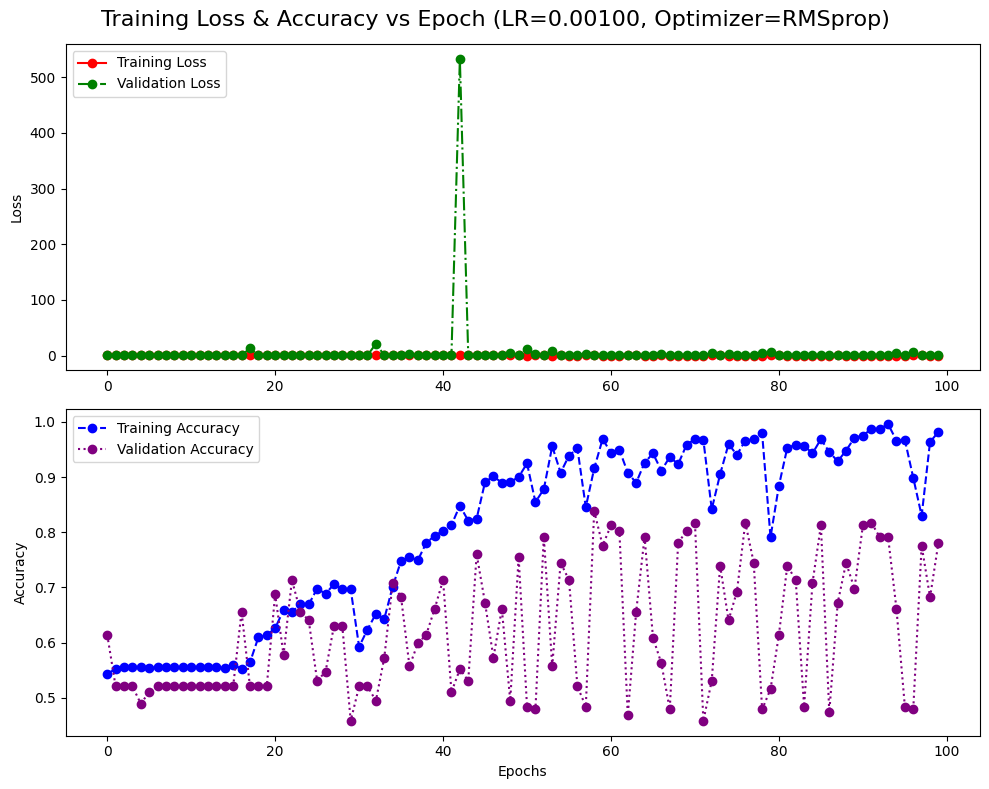

Los mejores hiperparámetros son: lr = 0.00100, optimizer = SGD


In [ ]:
from itertools import product
from sklearn.model_selection import ParameterGrid

torch.cuda.empty_cache()

epochs = 100

best_val_loss = float('inf')  # Inicializa la mejor pérdida de validación como infinito
best_hyperparameters = {}  # Almacenar los mejores hiperparámetros
best_model = None # Almacenar el mejor modelo

val_loss_dict = {}# Diccionario para almacenar los valores de val_loss por combinación de hiperparámetros
criterion_main = nn.CrossEntropyLoss()  # Pérdida para la tarea principal
criterion_aux1 = nn.CrossEntropyLoss()  # Pérdida auxiliar 1

for params in ParameterGrid(param_grid):
    learning_rate = params['learning_rate']
    optimizer_name = params['optimizer']

    print(f'Entrenando con learning_rate={learning_rate:.5f}, epochs={epochs}, optimizer={optimizer_name}')
     # Cambiar la capa de salida para 2 clases
    model = models.inception_v3(pretrained=True, aux_logits=True)
    num_features = model.fc.in_features  # Obtener el número de características de entrada
    # Definir tus propias capas FC
    fc0 = nn.Linear(num_features, 1024)
    fc1 = nn.Linear(1024, 512)  # Agrega la primera capa FC con 512 neuronas
    fc2 = nn.Linear(512, 256)  # Agrega la segunda capa FC con 256 neuronas
    fc3 = nn.Linear(256, num_classes)  # Agrega la tercera capa FC con 2 neuronas (suponiendo 2 clases)

    # Reemplazar la capa FC existente en InceptionV3 con tus nuevas capas FC
    model.fc = nn.Sequential(
        fc0,
        nn.ReLU(),
        fc1,
        nn.ReLU(),  # Agrega una función de activación, por ejemplo, ReLU
        fc2,
        nn.ReLU(),  # Otra función de activación, por ejemplo, ReLU
        fc3
    )

    model.to(device)

    # Define el optimizador fuera del bucle
    if optimizer_name == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=1e-5)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=1e-5)

    # Restablece todas las variables a 0 para la próxima combinación
    train_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []
    best_epoch = 0
    best_val_loss = float('inf')
    torch.cuda.empty_cache()

    for epoch in range(epochs):
        model.train()
        total = 0
        correct = 0
        counter = 0
        train_running_loss = 0

        # Utiliza tqdm para mostrar una barra de progreso durante el entrenamiento
        with tqdm(train_loader, unit="batch") as tepoch:  # Utiliza train_loader en lugar de train_dataset
            # Etiqueta de la barra de progreso
            tepoch.set_description(f'Epoch {epoch+1}/{epochs}')

            for images, labels in tepoch:  # Utiliza tepoch como iterable
                images = images.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()
                outputs_main, outputs_aux = model(images)
                loss_main = criterion_main(outputs_main, labels)
                loss_aux = criterion_aux1(outputs_aux, labels)
                loss_total = loss_main + 0.7 * loss_aux
                loss_total.backward()
                optimizer.step()

                train_running_loss += loss_total.item() * images.size(0)

                _, pred = torch.max(outputs_main.data, 1)

                # Lleva un registro de cuántas imágenes se han propagado hacia adelante
                total += labels.size(0)
                # Lleva un registro de cuántas se predijeron correctamente
                correct += (pred == labels).sum().item()

                # Actualiza la barra de progreso con la pérdida actual
                tepoch.set_postfix(loss=train_running_loss/total)  # Puedes mostrar la pérdida en la barra de progreso

                # Registra las pérdidas y precisión de entrenamiento en cada época
            train_accuracy.append(correct/total)
            train_loss.append(train_running_loss/len(train_dataset))


            print(f'Epoch {epoch+1} Training Accuracy = {correct/total}')
            print(f'Epoch {epoch+1} Training Loss = {train_running_loss/len(train_dataset)}')

            # Obtén nuestra precisión y pérdida de validación
            if epoch % 1 == 0:
                model.eval()
                total = 0
                correct = 0
                val_running_loss = 0

                # No necesitamos gradientes para la validación, así que envuélvelo en no_grad para ahorrar memoria
                with torch.no_grad():
                    for images, labels in val_loader:
                        images, labels = images.to(device), labels.to(device)
                        val_output = model(images)
                        loss_val = criterion_main(val_output, labels)

                        # Calcula la pérdida acumulada multiplicando el valor de pérdida por el tamaño del lote
                        val_running_loss += loss_val.item() * images.size(0)
                        _, pred = torch.max(val_output.data, 1)
                        total += labels.size(0)
                        correct += (pred == labels).sum().item()

                    val_accuracy.append(correct/total)
                    # Calcula la pérdida por época dividiendo la pérdida acumulada por el número de elementos en el conjunto de validación
                    val_loss.append(val_running_loss/len(validation_dataset))

                    # Actualiza la variable best_val_loss y guarda los pesos del modelo si la pérdida de validación actual es mejor.
                    if val_loss[-1] < best_val_loss:
                        best_val_loss = val_loss[-1]
                        # Guarda los pesos del modelo en variables para almacenarlo al finalizar el entrenamiento.
                        best_epoch = epoch
                        best_model_name = f"model_lr{learning_rate}_optimizer{optimizer_name}_epoch{best_epoch}.pth"
                        best_model_dict = model.state_dict()
                        best_model = model

                    print(f'Epoch {epoch+1} Validation Accuracy = {correct/total}')
                    print(f'Epoch {epoch+1} Validation Loss = {val_running_loss/len(validation_dataset)}')
                    print(f"La mejor precisión de Validation Loss ({best_val_loss}) se alcanzó en la época {best_epoch + 1}")

    # Guarda los pesos del modelo en un archivo.
    torch.save(best_model_dict, best_model_name)

    # Almacena el valor de val_loss para esta combinación de hiperparámetros en el diccionario
    val_loss_dict[(learning_rate, optimizer_name)] = best_val_loss

    epoch_log = [*range(epochs)]

    # Crear la figura y los ejes
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  # 2 filas, 1 columna

    # Obtener los hiperparámetros de la combinación actual
    learning_rate = params['learning_rate']
    optimizer_name = params['optimizer']

    # Título y rotación del eje x con información de hiperparámetros
    fig.suptitle(f"Training Loss & Accuracy vs Epoch (LR={learning_rate:.5f}, Optimizer={optimizer_name})", fontsize=16)
    ax2.set_xlabel('Epochs')

    # Crear las líneas para los datos de entrenamiento (colores y estilos personalizados)
    ax1.plot(epoch_log, train_loss, color='red', linestyle='-', marker='o', label='Training Loss')
    ax2.plot(epoch_log, train_accuracy, color='blue', linestyle='--', marker='o', label='Training Accuracy')

    # Crear las líneas para los datos de validación (colores y estilos personalizados)
    ax1.plot(epoch_log, val_loss, color='green', linestyle='-.', marker='o', label='Validation Loss')
    ax2.plot(epoch_log, val_accuracy, color='purple', linestyle=':', marker='o', label='Validation Accuracy')

    # Configurar ejes y leyendas para el primer subgráfico (pérdida)
    ax1.set_ylabel('Loss', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(loc='upper left')

    # Configurar ejes y leyendas para el segundo subgráfico (precisión)
    ax2.set_ylabel('Accuracy', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.legend(loc='upper left')

    # Ajustar el espaciado entre los subgráficos
    plt.tight_layout()

    # Nombre del archivo PDF
    pdf_filename = f"Training_Loss_Accuracy_LR_{learning_rate:.5f}_Optimizer_{optimizer_name}.pdf"

    # Guardar la gráfica en un archivo PDF
    plt.savefig(pdf_filename, format='pdf')

    # Mostrar la gráfica en pantalla
    plt.show()

    del model

# Después de completar todos los bucles, puedes determinar los mejores hiperparámetros
best_hyperparameters = min(val_loss_dict, key=lambda k: val_loss_dict[k])

print(f"Los mejores hiperparámetros son: lr = {best_hyperparameters[0]:.5f}, optimizer = {best_hyperparameters[1]}")

# **Impresión de los Mejores Hiperparámetros Hiperparámetros obtenidos**


Este bloque de código utiliza la biblioteca `termcolor` para resaltar y dar formato en color a los mejores hiperparámetros.

1. **Importación de la Biblioteca:**
   - Se importa la función `colored` de la biblioteca `termcolor`.

2. **Resaltado y Formateo:**
   - Se utiliza la función `colored` para resaltar el texto de los mejores hiperparámetros.
   - El texto resaltado se almacena en la variable `highlighted_text`.

3. **Impresión del Texto Resaltado:**
   - Se imprime en la consola el texto de los mejores hiperparámetros con el formato y color resaltados.

Este bloque de código proporciona una presentación visual destacada de los mejores hiperparámetros encontrados durante la búsqueda.

In [ ]:
from termcolor import colored

# Aplicar el formato y color
highlighted_text = colored(best_hyperparameters, 'red', attrs=['bold'])

# Imprimir el texto resaltado
print(best_hyperparameters)

(0.001, 'SGD')
